In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cmcrameri
import cmcrameri.cm as cmc
from scipy.stats import pearsonr
from PIL import Image
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [2]:
data_1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/entropy_log_combined_Chao_Shen.csv")
data_2 = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/entropy_log_combined_Chao_Shen.csv")

# Split 'Filename' into 'SubjectID' and 'SessionNr'
# Split 'Filename' into 'ParticipantID' and 'SessionNr'
data_1[['ParticipantID', 'SessionNr']] = data_1['Filename'].str.replace('.csv', '', regex=False).str.split('_', expand=True)
data_2[['ParticipantID', 'SessionNr']] = data_2['Filename'].str.replace('.csv', '', regex=False).str.split('_', expand=True)
# Drop the original 'Filename' column
data_1.drop(columns=['Filename'], inplace=True)
data_2.drop(columns=['Filename'], inplace=True)
data_1.drop_duplicates(inplace=True)
data_2.drop_duplicates(inplace=True)
# Convert SessionNr to integer if possible
data_1['SessionNr'] = pd.to_numeric(data_1['SessionNr'], errors='coerce')
data_2['SessionNr'] = pd.to_numeric(data_2['SessionNr'], errors='coerce')

# Stack the two datasets on top of each other (concatenate rows)
stacked_df = pd.concat([data_1, data_2], ignore_index=True)
stacked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Overall_Transition_Entropy                             290 non-null    float64
 1   Chao_Shen_Overall_Transition_Entropy                   290 non-null    float64
 2   Transition_Entropy_Background                          290 non-null    float64
 3   Transition_Entropy_Building                            290 non-null    float64
 4   Transition_Entropy_TaskBuilding_Public                 290 non-null    float64
 5   Transition_Entropy_TaskBuilding_Residential            290 non-null    float64
 6   Transition_Entropy_Global_Landmark                     290 non-null    float64
 7   Transition_Entropy_Passive_Agent                       290 non-null    float64
 8   Transition_Entropy_Active_Agent                   

In [3]:
stacked_df.head()

Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.457551                              0.458699   
1                    0.470105                              0.471462   
2                    0.457947                              0.458960   
3                    0.418186                              0.418806   
4                    0.437667                              0.438649   

   Transition_Entropy_Background  Transition_Entropy_Building  \
0                       0.411175                     0.529599   
1                       0.404550                     0.536949   
2                       0.389115                     0.528524   
3                       0.409746                     0.421414   
4                       0.444608                     0.450309   

   Transition_Entropy_TaskBuilding_Public  \
0                                0.573622   
1                                0.621863   
2                                0.639823   
3                                0.408450   
4                                0.407788   

   Transition_Entropy_TaskBuilding_Residential  \
0                                     0.598749   
1                                     0.624224   
2                                     0.603179   
3                                     0.450897   
4                                     0.429398   

   Transition_Entropy_Global_Landmark  Transition_Entropy_Passive_Agent  \
0                            0.551024                          0.419706   
1                            0.612049                          0.475617   
2                            0.658797                          0.516636   
3                            0.375698                          0.394601   
4                            0.325598                          0.459708   

   Transition_Entropy_Active_Agent  Chao_Shen_Transition_Entropy_Background  \
0                         0.394916                                 0.411175   
1                         0.589565                                 0.404550   
2                         0.712049                                 0.389115   
3                         0.638567                                 0.409753   
4                         0.643438                                 0.444626   

   ...  Chao_Shen_Transition_Entropy_Active_Agent  \
0  ...                                   0.394916   
1  ...                                   0.601919   
2  ...                                   0.738672   
3  ...                                   0.638640   
4  ...                                   0.650746   

   Stationary_Entropy_Background  Stationary_Entropy_Building  \
0                       0.171067                     0.149436   
1                       0.159033                     0.169368   
2                       0.153467                     0.171652   
3                       0.183415                     0.185106   
4                       0.184506                     0.184744   

   Stationary_Entropy_TaskBuilding_Public  \
0                                0.110397   
1                                0.081048   
2                                0.081617   
3                                0.119414   
4                                0.119590   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.094413   
1                                     0.100356   
2                                     0.102032   
3                                     0.109826   
4                                     0.124917   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.024088                          0.078940   
1                            0.036071                          0.050596   
2                            0.015192                          0.022854   
3                            0.062524                          0.012740   
4                            0

In [4]:
10,

(10,)

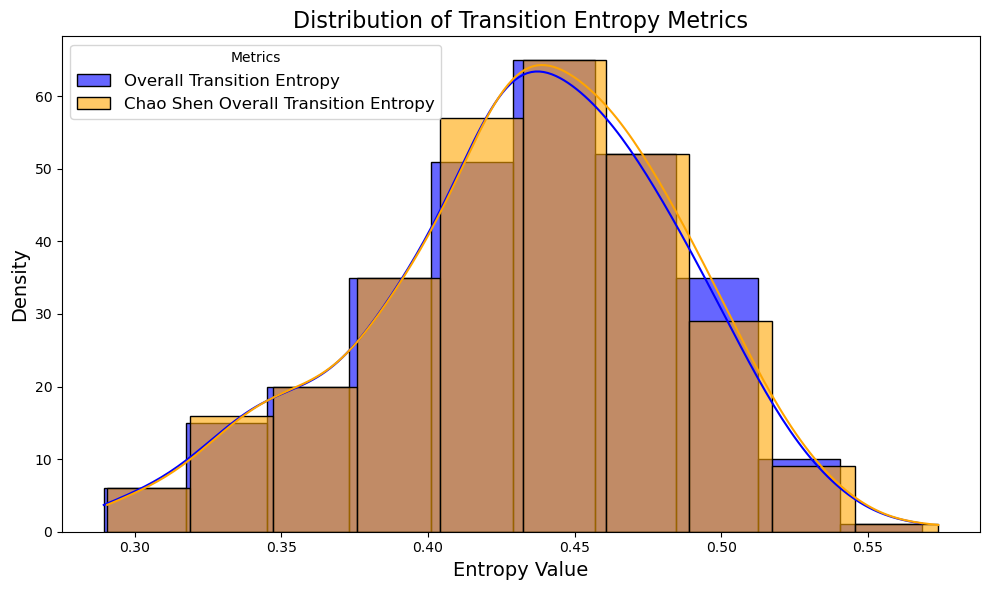

In [5]:
# Plotting the distribution of the first two columns
plt.figure(figsize=(10, 6))
sns.histplot(stacked_df["Overall_Transition_Entropy"], kde=True, label="Overall Transition Entropy", color="blue", bins=10, alpha=0.6)
sns.histplot(stacked_df["Chao_Shen_Overall_Transition_Entropy"], kde=True, label="Chao Shen Overall Transition Entropy", color="orange", bins=10, alpha=0.6)

# Customize the plot
plt.title("Distribution of Transition Entropy Metrics", fontsize=16)
plt.xlabel("Entropy Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="Metrics", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

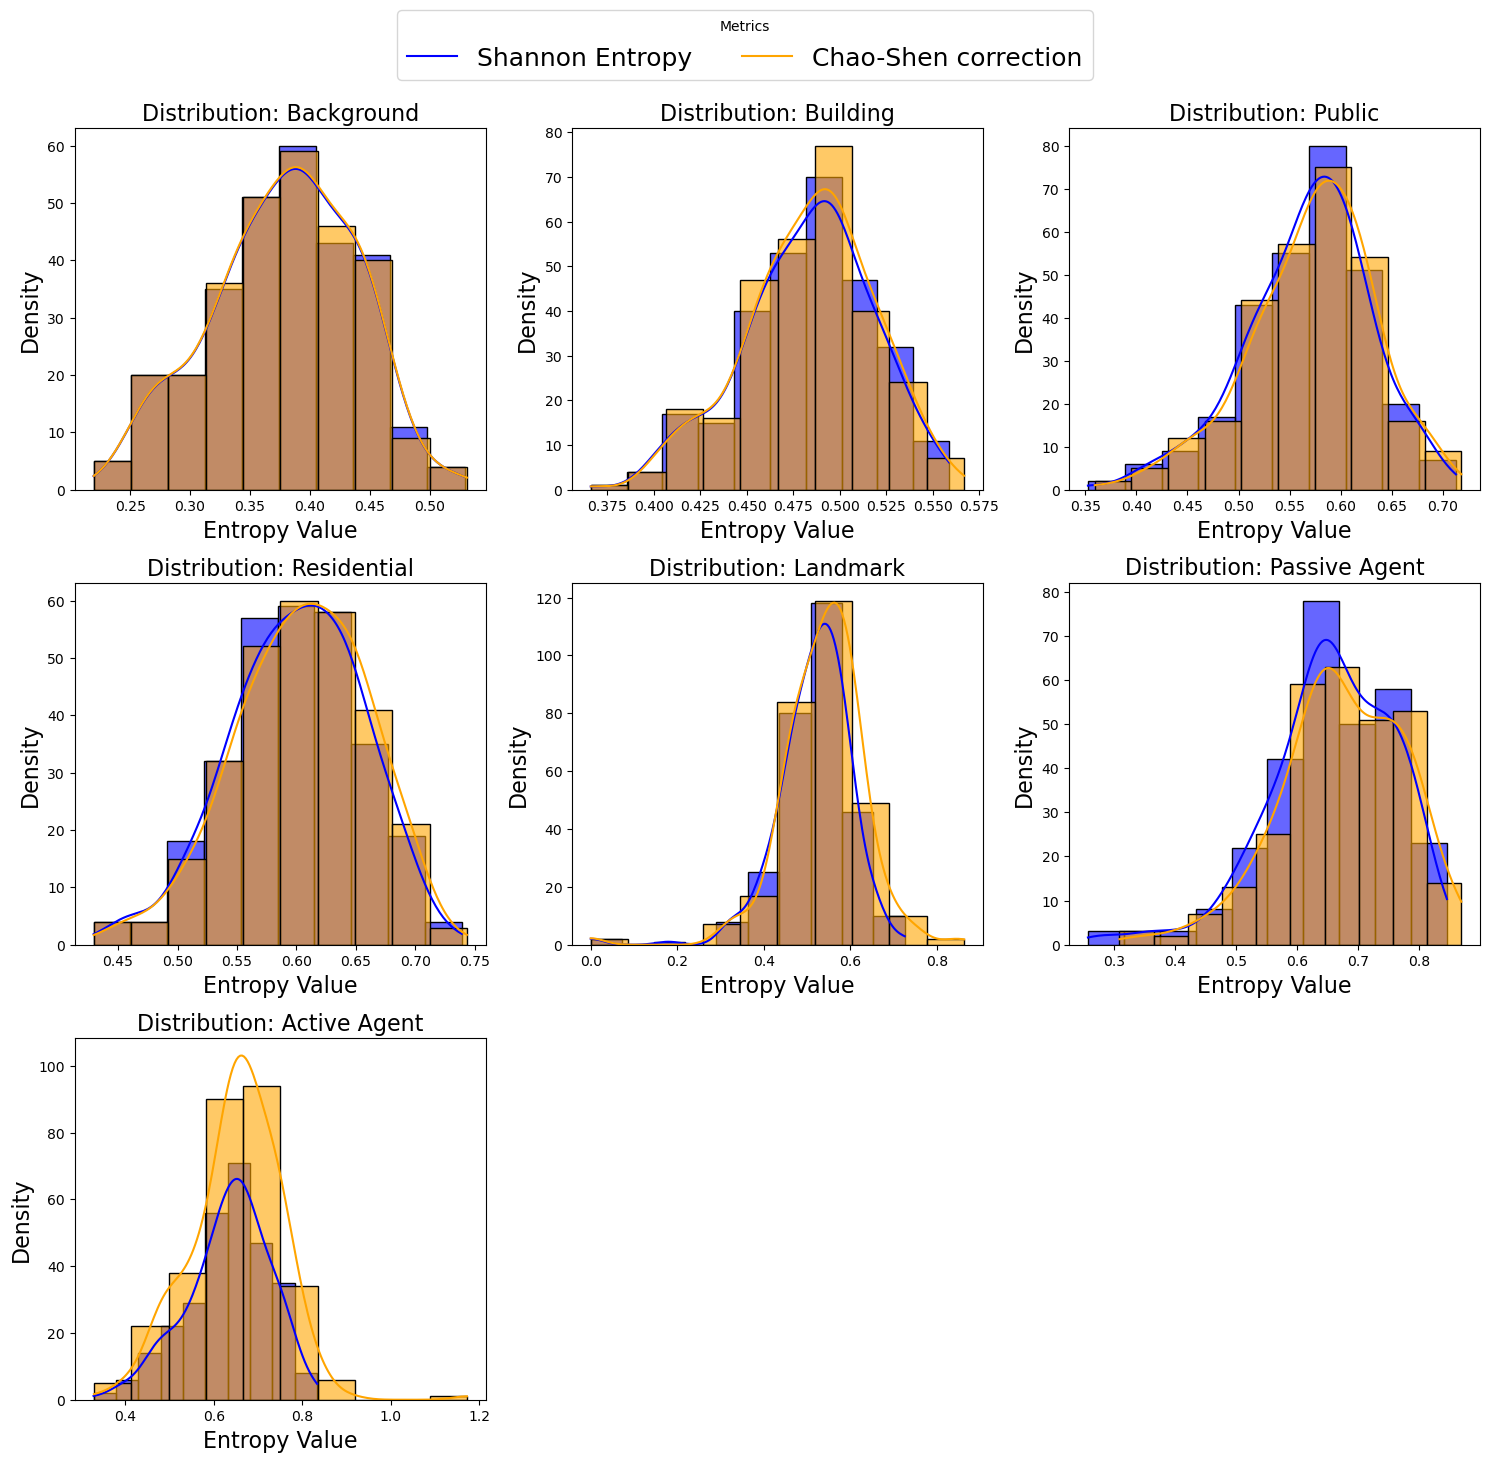

In [6]:
# Define pairs of columns: one with and one without the "Chao_Shen_" prefix
column_pairs = [
    ("Transition_Entropy_Background", "Chao_Shen_Transition_Entropy_Background"),
    ("Transition_Entropy_Building", "Chao_Shen_Transition_Entropy_Building"),
    ("Transition_Entropy_TaskBuilding_Public", "Chao_Shen_Transition_Entropy_TaskBuilding_Public"),
    ("Transition_Entropy_TaskBuilding_Residential", "Chao_Shen_Transition_Entropy_TaskBuilding_Residential"),
    ("Transition_Entropy_Global_Landmark", "Chao_Shen_Transition_Entropy_Global_Landmark"),
    ("Transition_Entropy_Passive_Agent", "Chao_Shen_Transition_Entropy_Passive_Agent"),
    #("Transition_Entropy_Passive_Agent_Face", "Chao_Shen_Transition_Entropy_Passive_Agent_Face"),
    ("Transition_Entropy_Active_Agent", "Chao_Shen_Transition_Entropy_Active_Agent"),
    #("Transition_Entropy_Active_Agent_Face", "Chao_Shen_Transition_Entropy_Active_Agent_Face"),
]

# Create a grid layout with multiple plots per row
cols_per_row = 3  # Number of plots per row
num_rows = -(-len(column_pairs) // cols_per_row)  # Calculate number of rows needed

plt.figure(figsize=(cols_per_row * 5, num_rows * 5))  # Adjust figure size based on grid layout
for idx, (col, chao_col) in enumerate(column_pairs, 1):
    plt.subplot(num_rows, cols_per_row, idx)
    sns.histplot(stacked_df[col], kde=True, label="Shannon Entropy", color="blue", bins=10, alpha=0.6)
    sns.histplot(stacked_df[chao_col], kde=True, label="Chao-Shen correction", color="orange", bins=10, alpha=0.6)

    # Extract the word for the title, handle special cases for "agent" and "face"
    col_split = col.split("_")
    if col_split[-1].lower() == "agent" and col_split[-2].lower() == "face":
        title_word = "_".join(col_split[-4:])
    elif col_split[-1].lower() == "agent":
        title_word = "_".join(col_split[-2:])
    else:
        title_word = col_split[-1]
    plt.title(f"Distribution: {title_word.replace('_', ' ')}", fontsize=16)
    plt.xlabel("Entropy Value", fontsize=16)
    plt.ylabel("Density", fontsize=16)

# Add a legend outside of the figure, centered above all subplots
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.figlegend(title="Metrics", labels=["Shannon Entropy", "Chao-Shen correction"], loc="upper center", bbox_to_anchor=(0.5, 0.98), ncol=2, fontsize=18)
plt.show()


<Figure size 1200x500 with 0 Axes>

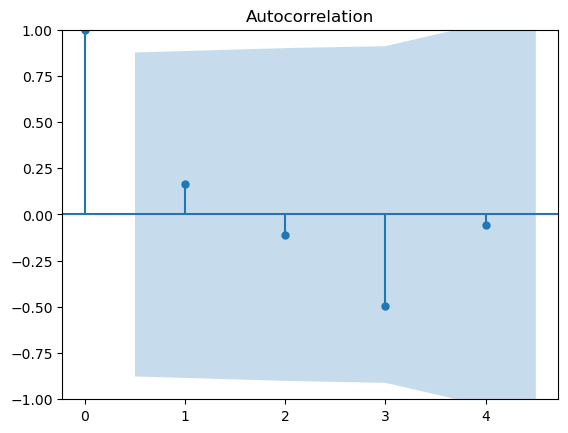

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
stacked_df_ordered = stacked_df.sort_values(by=["ParticipantID", "SessionNr"]).reset_index(drop=True)

# Selecting one participant for analysis
example_pid = stacked_df_ordered["ParticipantID"].unique()[0]
subset = stacked_df_ordered[stacked_df_ordered["ParticipantID"] == example_pid]

# Plot ACF
plt.figure(figsize=(12, 5))
plot_acf(subset["Chao_Shen_Overall_Transition_Entropy"], lags=4)
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller

# Apply the test for one participant
result = adfuller(subset["Chao_Shen_Overall_Transition_Entropy"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.7988530535710001
p-value: 0.381031269175862


In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA for one participant
model = ARIMA(subset["Chao_Shen_Overall_Transition_Entropy"], order=(1, 1, 1))
model_fit = model.fit()

# Show results
print(model_fit.summary())


                                        SARIMAX Results                                         
Dep. Variable:     Chao_Shen_Overall_Transition_Entropy   No. Observations:                    5
Model:                                   ARIMA(1, 1, 1)   Log Likelihood                   8.167
Date:                                  Sat, 13 Sep 2025   AIC                            -10.334
Time:                                          10:42:24   BIC                            -12.175
Sample:                                               0   HQIC                           -14.374
                                                    - 5                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9969      2.159     -0.462      0.644      -5.229

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/mlemodel.py:3158: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


In [10]:
stacked_df.head()

Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.457551                              0.458699   
1                    0.470105                              0.471462   
2                    0.457947                              0.458960   
3                    0.418186                              0.418806   
4                    0.437667                              0.438649   

   Transition_Entropy_Background  Transition_Entropy_Building  \
0                       0.411175                     0.529599   
1                       0.404550                     0.536949   
2                       0.389115                     0.528524   
3                       0.409746                     0.421414   
4                       0.444608                     0.450309   

   Transition_Entropy_TaskBuilding_Public  \
0                                0.573622   
1                                0.621863   
2                                0.639823   
3                                0.408450   
4                                0.407788   

   Transition_Entropy_TaskBuilding_Residential  \
0                                     0.598749   
1                                     0.624224   
2                                     0.603179   
3                                     0.450897   
4                                     0.429398   

   Transition_Entropy_Global_Landmark  Transition_Entropy_Passive_Agent  \
0                            0.551024                          0.419706   
1                            0.612049                          0.475617   
2                            0.658797                          0.516636   
3                            0.375698                          0.394601   
4                            0.325598                          0.459708   

   Transition_Entropy_Active_Agent  Chao_Shen_Transition_Entropy_Background  \
0                         0.394916                                 0.411175   
1                         0.589565                                 0.404550   
2                         0.712049                                 0.389115   
3                         0.638567                                 0.409753   
4                         0.643438                                 0.444626   

   ...  Chao_Shen_Transition_Entropy_Active_Agent  \
0  ...                                   0.394916   
1  ...                                   0.601919   
2  ...                                   0.738672   
3  ...                                   0.638640   
4  ...                                   0.650746   

   Stationary_Entropy_Background  Stationary_Entropy_Building  \
0                       0.171067                     0.149436   
1                       0.159033                     0.169368   
2                       0.153467                     0.171652   
3                       0.183415                     0.185106   
4                       0.184506                     0.184744   

   Stationary_Entropy_TaskBuilding_Public  \
0                                0.110397   
1                                0.081048   
2                                0.081617   
3                                0.119414   
4                                0.119590   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.094413   
1                                     0.100356   
2                                     0.102032   
3                                     0.109826   
4                                     0.124917   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.024088                          0.078940   
1                            0.036071                          0.050596   
2                            0.015192                          0.022854   
3                            0.062524                          0.012740   
4                            0

In [11]:
data_1.head()


Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.457551                              0.458699   
1                    0.470105                              0.471462   
2                    0.457947                              0.458960   
3                    0.418186                              0.418806   
4                    0.437667                              0.438649   

   Transition_Entropy_Background  Transition_Entropy_Building  \
0                       0.411175                     0.529599   
1                       0.404550                     0.536949   
2                       0.389115                     0.528524   
3                       0.409746                     0.421414   
4                       0.444608                     0.450309   

   Transition_Entropy_TaskBuilding_Public  \
0                                0.573622   
1                                0.621863   
2                                0.639823   
3                                0.408450   
4                                0.407788   

   Transition_Entropy_TaskBuilding_Residential  \
0                                     0.598749   
1                                     0.624224   
2                                     0.603179   
3                                     0.450897   
4                                     0.429398   

   Transition_Entropy_Global_Landmark  Transition_Entropy_Passive_Agent  \
0                            0.551024                          0.419706   
1                            0.612049                          0.475617   
2                            0.658797                          0.516636   
3                            0.375698                          0.394601   
4                            0.325598                          0.459708   

   Transition_Entropy_Active_Agent  Chao_Shen_Transition_Entropy_Background  \
0                         0.394916                                 0.411175   
1                         0.589565                                 0.404550   
2                         0.712049                                 0.389115   
3                         0.638567                                 0.409753   
4                         0.643438                                 0.444626   

   ...  Chao_Shen_Transition_Entropy_Active_Agent  \
0  ...                                   0.394916   
1  ...                                   0.601919   
2  ...                                   0.738672   
3  ...                                   0.638640   
4  ...                                   0.650746   

   Stationary_Entropy_Background  Stationary_Entropy_Building  \
0                       0.171067                     0.149436   
1                       0.159033                     0.169368   
2                       0.153467                     0.171652   
3                       0.183415                     0.185106   
4                       0.184506                     0.184744   

   Stationary_Entropy_TaskBuilding_Public  \
0                                0.110397   
1                                0.081048   
2                                0.081617   
3                                0.119414   
4                                0.119590   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.094413   
1                                     0.100356   
2                                     0.102032   
3                                     0.109826   
4                                     0.124917   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.024088                          0.078940   
1                            0.036071                          0.050596   
2                            0.015192                          0.022854   
3                            0.062524                          0.012740   
4                            0

In [12]:
Coverage =  pd.read_csv('/Volumes/TwoTeras/Graph_Stuff/CSVs/Unique_NodeVisit_Ratios.csv')
# Force 'ParticipantID' to have 4 digits as a string
Coverage['ParticipantID'] = Coverage['ParticipantID'].apply(lambda x: f"{int(x):04d}")
display(Coverage.info())

Navigation = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv", sep =",")
Navigation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParticipantID         345 non-null    object 
 1   SessionNr             345 non-null    int64  
 2   IndividualNodeCount   345 non-null    int64  
 3   Experiment            345 non-null    object 
 4   CummulativeNodeCount  345 non-null    int64  
 5   IndividualRatio       345 non-null    float64
 6   CummulativeRatio      345 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 19.0+ KB


None

ParticipantId  Session  StrategyCount  StrategyPerc      Strategy  \
0           1754        1            7.0          0.22  Conservative   
1           1754        1           25.0          0.78   Explorative   
2           1754        1            6.0          0.24  Conservative   
3           1754        1           19.0          0.76   Explorative   
4           1754        1            2.0          0.12  Conservative   

           Decision  Total Experiment  
0     AgentAtChosen   32.0       Exp1  
1     AgentAtChosen   32.0       Exp1  
2  AgentAtNotChosen   25.0       Exp1  
3  AgentAtNotChosen   25.0       Exp1  
4       AgentAtBoth   17.0       Exp1

In [13]:
data_2.head()

Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.435381                              0.436534   
1                    0.423716                              0.424952   
2                    0.473820                              0.474437   
3                    0.493701                              0.494628   
4                    0.425804                              0.426984   

   Transition_Entropy_Background  Transition_Entropy_Building  \
0                       0.376847                     0.494797   
1                       0.357604                     0.524897   
2                       0.419146                     0.492363   
3                       0.420797                     0.522262   
4                       0.350460                     0.531039   

   Transition_Entropy_TaskBuilding_Public  \
0                                0.525338   
1                                0.572909   
2                                0.594037   
3                                0.712557   
4                                0.681180   

   Transition_Entropy_TaskBuilding_Residential  \
0                                     0.571648   
1                                     0.622569   
2                                     0.675835   
3                                     0.738941   
4                                     0.694003   

   Transition_Entropy_Global_Landmark  Transition_Entropy_Passive_Agent  \
0                            0.514460                          0.775604   
1                            0.463988                          0.694067   
2                            0.540132                          0.559687   
3                            0.632502                          0.582637   
4                            0.519413                          0.657741   

   Transition_Entropy_Active_Agent  Chao_Shen_Transition_Entropy_Background  \
0                         0.613399                                 0.376847   
1                         0.597323                                 0.357610   
2                         0.454144                                 0.419146   
3                         0.488316                                 0.420797   
4                         0.470364                                 0.350460   

   ...  Chao_Shen_Transition_Entropy_Active_Agent  \
0  ...                                   0.631360   
1  ...                                   0.614289   
2  ...                                   0.454146   
3  ...                                   0.490335   
4  ...                                   0.480003   

   Stationary_Entropy_Background  Stationary_Entropy_Building  \
0                       0.157609                     0.171964   
1                       0.140636                     0.165106   
2                       0.174113                     0.173092   
3                       0.168952                     0.158010   
4                       0.137788                     0.148921   

   Stationary_Entropy_TaskBuilding_Public  \
0                                0.102136   
1                                0.079361   
2                                0.090841   
3                                0.090322   
4                                0.064772   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.078791   
1                                     0.081223   
2                                     0.099078   
3                                     0.085912   
4                                     0.080334   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.042008                          0.020865   
1                            0.028060                          0.020877   
2                            0.020765                          0.053666   
3                            0.023548                          0.089081   
4                            0

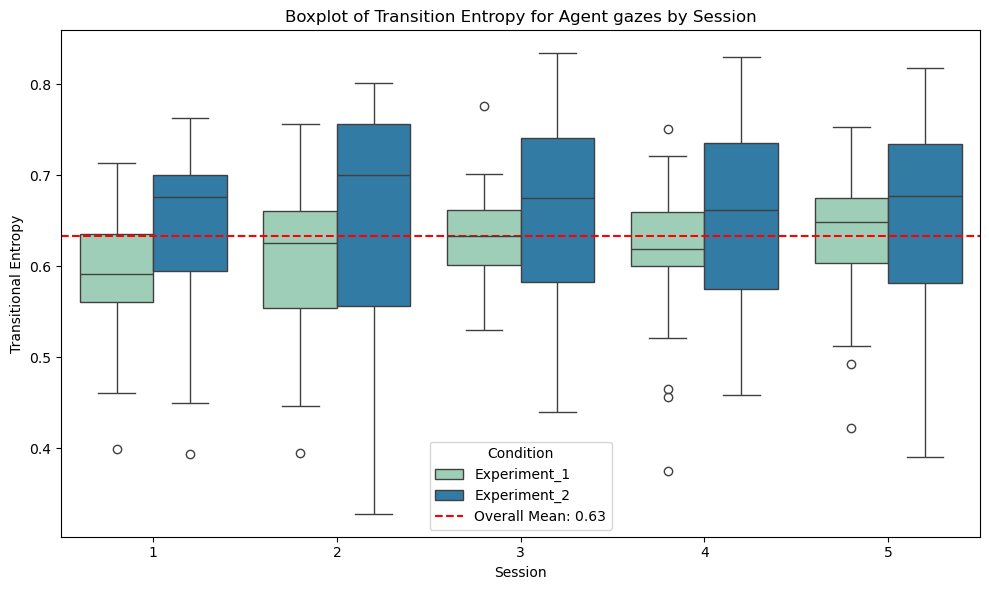

In [14]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Experiment'] = 'Experiment_1'
data_2['Experiment'] = 'Experiment_2'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_Active_Agent'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_Active_Agent', hue='Experiment', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Agent gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

In [15]:
combined_data.head()

Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.457551                              0.458699   
1                    0.470105                              0.471462   
2                    0.457947                              0.458960   
3                    0.418186                              0.418806   
4                    0.437667                              0.438649   

   Transition_Entropy_Background  Transition_Entropy_Building  \
0                       0.411175                     0.529599   
1                       0.404550                     0.536949   
2                       0.389115                     0.528524   
3                       0.409746                     0.421414   
4                       0.444608                     0.450309   

   Transition_Entropy_TaskBuilding_Public  \
0                                0.573622   
1                                0.621863   
2                                0.639823   
3                                0.408450   
4                                0.407788   

   Transition_Entropy_TaskBuilding_Residential  \
0                                     0.598749   
1                                     0.624224   
2                                     0.603179   
3                                     0.450897   
4                                     0.429398   

   Transition_Entropy_Global_Landmark  Transition_Entropy_Passive_Agent  \
0                            0.551024                          0.419706   
1                            0.612049                          0.475617   
2                            0.658797                          0.516636   
3                            0.375698                          0.394601   
4                            0.325598                          0.459708   

   Transition_Entropy_Active_Agent  Chao_Shen_Transition_Entropy_Background  \
0                         0.394916                                 0.411175   
1                         0.589565                                 0.404550   
2                         0.712049                                 0.389115   
3                         0.638567                                 0.409753   
4                         0.643438                                 0.444626   

   ...  Stationary_Entropy_Background  Stationary_Entropy_Building  \
0  ...                       0.171067                     0.149436   
1  ...                       0.159033                     0.169368   
2  ...                       0.153467                     0.171652   
3  ...                       0.183415                     0.185106   
4  ...                       0.184506                     0.184744   

   Stationary_Entropy_TaskBuilding_Public  \
0                                0.110397   
1                                0.081048   
2                                0.081617   
3                                0.119414   
4                                0.119590   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.094413   
1                                     0.100356   
2                                     0.102032   
3                                     0.109826   
4                                     0.124917   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.024088                          0.078940   
1                            0.036071                          0.050596   
2                            0.015192                          0.022854   
3                            0.062524                          0.012740   
4                            0.060542                          0.011966   

   Stationary_Entropy_Active_Agent  ParticipantID  SessionNr    Experiment  
0                         0.106829           0479          2  Experiment_1  
1                         0.037870           0479          3  Experiment_1  
2           

In [16]:
# ----------------------------
# Consistent style
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18
})

# ----------------------------
# Prepare nicer labels for axis
def format_labels(label):
    label = label.replace('Chao_Shen', ' ')
    label = label.replace('_', ' ')
    label = label.replace('Transition Entropy', '')
    label = label.replace('TaskBuilding', '')
    label = label.replace('Active', '')
    return label.strip()

# ----------------------------
# Assign Condition labels BEFORE melting
data_1['Condition'] = 'Congruent'
data_2['Condition'] = 'Incongruent'

# ----------------------------
# Combine dataframes
combined_data = pd.concat([data_1, data_2])

# ----------------------------
# Select entropy columns
selected_columns = [
    'Chao_Shen_Overall_Transition_Entropy',
    'Chao_Shen_Transition_Entropy_Background',
    'Chao_Shen_Transition_Entropy_Building',
    'Chao_Shen_Transition_Entropy_TaskBuilding_Residential',
    'Chao_Shen_Transition_Entropy_TaskBuilding_Public',
    'Chao_Shen_Transition_Entropy_Global_Landmark',
    'Chao_Shen_Transition_Entropy_Active_Agent',
]

# ----------------------------
# Prepare filtered data for boxplot
melted_data = combined_data.melt(
    id_vars=['ParticipantID', 'SessionNr', 'Condition'],
    value_vars=selected_columns,
    var_name='Entropy_Type',
    value_name='Entropy_Value'
)

filtered_data = melted_data[(melted_data['Entropy_Value'] > 0.01) & (melted_data['Entropy_Value'] < 1)]

# ----------------------------
# Prepare heatmap data
heatmap_data = combined_data.groupby(['Condition'])[selected_columns].median()
heatmap_data.columns = [format_labels(col) for col in heatmap_data.columns]
data_for_heatmap = heatmap_data.T
vmin = data_for_heatmap.min().min()
vmax = data_for_heatmap.max().max()


In [17]:
combined_data.columns

Index(['Overall_Transition_Entropy', 'Chao_Shen_Overall_Transition_Entropy',
       'Transition_Entropy_Background', 'Transition_Entropy_Building',
       'Transition_Entropy_TaskBuilding_Public',
       'Transition_Entropy_TaskBuilding_Residential',
       'Transition_Entropy_Global_Landmark',
       'Transition_Entropy_Passive_Agent', 'Transition_Entropy_Active_Agent',
       'Chao_Shen_Transition_Entropy_Background',
       'Chao_Shen_Transition_Entropy_Building',
       'Chao_Shen_Transition_Entropy_TaskBuilding_Public',
       'Chao_Shen_Transition_Entropy_TaskBuilding_Residential',
       'Chao_Shen_Transition_Entropy_Global_Landmark',
       'Chao_Shen_Transition_Entropy_Passive_Agent',
       'Chao_Shen_Transition_Entropy_Active_Agent',
       'Stationary_Entropy_Background', 'Stationary_Entropy_Building',
       'Stationary_Entropy_TaskBuilding_Public',
       'Stationary_Entropy_TaskBuilding_Residential',
       'Stationary_Entropy_Global_Landmark',
       'Stationary_Entropy

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/1486751528.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([format_labels(tick.get_text()) for tick in ax1.get_xticklabels()])


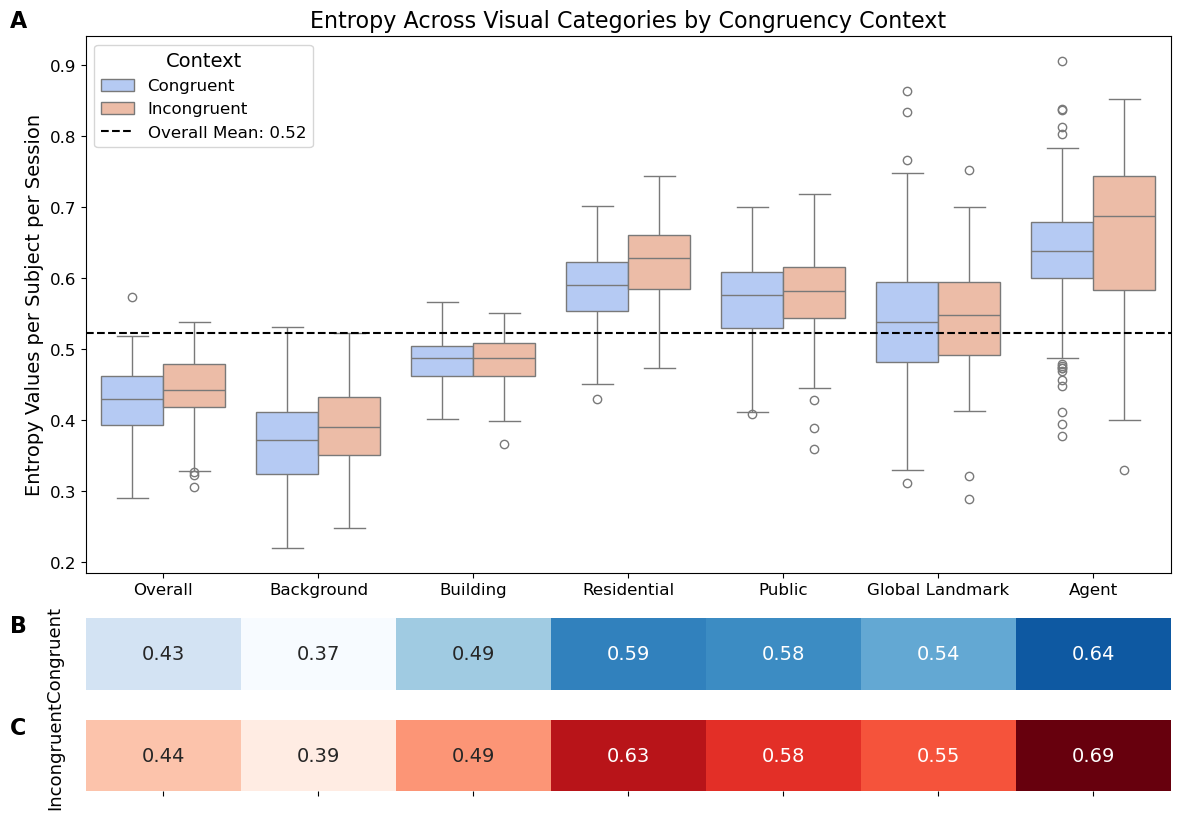

In [18]:
# ----------------------------
# Prepare heatmap data
heatmap_data = combined_data.groupby(['Condition'])[selected_columns].median()
heatmap_data.columns = [format_labels(col) for col in heatmap_data.columns]
data_for_heatmap = heatmap_data.T
vmin = data_for_heatmap.min().min()
vmax = data_for_heatmap.max().max()

# ----------------------------
# Plotting starts here
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(3, 1, height_ratios=[3, 0.4, 0.4])

# ----------------------------
# Panel A - Boxplot
ax1 = fig.add_subplot(gs[0])
sns.boxplot(
    data=filtered_data,
    x='Entropy_Type',
    y='Entropy_Value',
    hue='Condition',
    palette="coolwarm",
    ax=ax1
)
ax1.axhline(filtered_data['Entropy_Value'].mean(), color='black', linestyle='--', linewidth=1.5,
            label=f'Overall Mean: {filtered_data["Entropy_Value"].mean():.2f}')
ax1.set_title("Entropy Across Visual Categories by Congruency Context")
ax1.set_ylabel("Entropy Values per Subject per Session")
ax1.set_xlabel("")
ax1.set_xticklabels([format_labels(tick.get_text()) for tick in ax1.get_xticklabels()])
ax1.tick_params(axis='x', which='both', bottom=True)
ax1.legend(title="Context")

# ----------------------------
# Panel B - Congruent
ax2a = fig.add_subplot(gs[1])
sns.heatmap(
    data_for_heatmap[['Congruent']].T,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    cbar=False,
    vmin=vmin,
    vmax=vmax,
    ax=ax2a
)
ax2a.set_ylabel("")
ax2a.set_xlabel("")
ax2a.set_xticklabels([])
ax2a.set_yticklabels([])
ax2a.set_yticks([])
ax2a.tick_params(axis='x', which='both', bottom=False, top=False)
ax2a.tick_params(axis='y', left=False)

# ----------------------------
# Panel C - Incongruent
ax2b = fig.add_subplot(gs[2])
sns.heatmap(
    data_for_heatmap[['Incongruent']].T,
    annot=True,
    cmap="Reds",
    fmt=".2f",
    cbar=False,
    vmin=vmin,
    vmax=vmax,
    ax=ax2b
)
ax2b.set_ylabel("")
ax2b.set_xticklabels([])
ax2b.set_yticklabels([])
ax2b.set_yticks([])
ax2b.tick_params(axis='y', left=False)

# ----------------------------
# Manual fine-tuning to reduce the space between ax2a and ax2b
pos2a = ax2a.get_position()
pos2b = ax2b.get_position()

ax2b.set_position([pos2b.x0, pos2b.y0 + 0.015, pos2b.width, pos2b.height])

# ----------------------------
# Text labels for the heatmaps (small, manual)
ax2a.text(-0.02, 0.5, 'Congruent', transform=ax2a.transAxes,
          fontsize=13, va='center', ha='right', rotation=90)

ax2b.text(-0.02, 0.5, 'Incongruent', transform=ax2b.transAxes,
          fontsize=13, va='center', ha='right', rotation=90)

# ----------------------------
# Panel Labels
ax1.text(-0.07, 1.05, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top')
ax2a.text(-0.07, 1.05, 'B', transform=ax2a.transAxes, fontsize=16, fontweight='bold', va='top')
ax2b.text(-0.07, 1.05, 'C', transform=ax2b.transAxes, fontsize=16, fontweight='bold', va='top')

# ----------------------------
# Save with safe path
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Categorical_entropy.png", dpi=600, bbox_inches="tight")
plt.show()

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/2426062772.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([format_labels(tick.get_text()) for tick in ax1.get_xticklabels()])


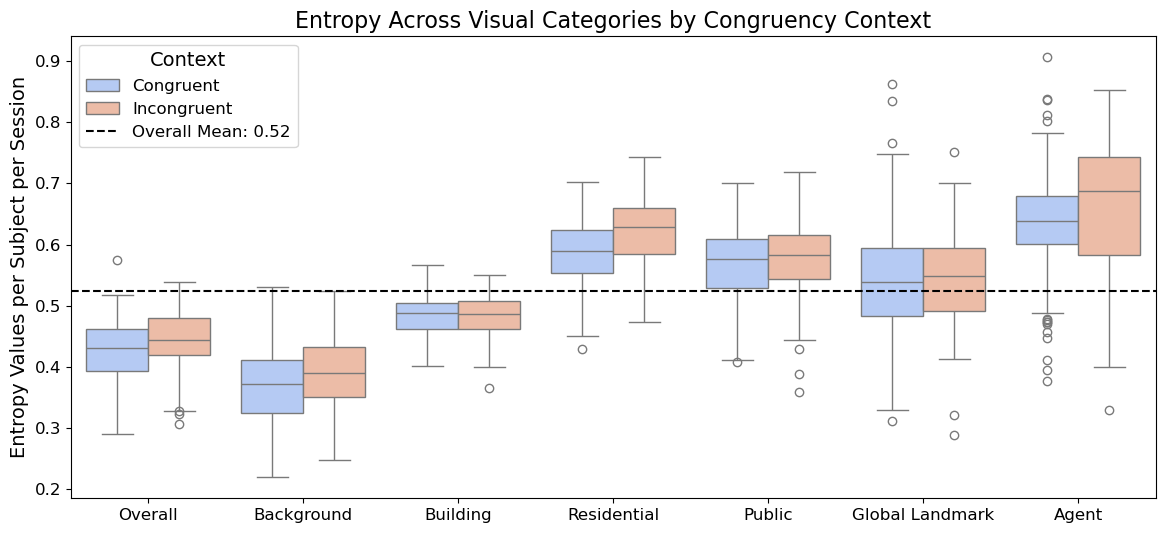

In [19]:
# ----------------------------
# Prepare boxplot data (assumes `filtered_data` and `format_labels` are already defined)

# ----------------------------
# Plotting starts here
fig = plt.figure(figsize=(14, 6))  # Adjusted height since we only show one plot
ax1 = fig.add_subplot(111)  # Single plot

# ----------------------------
# Panel A - Boxplot
sns.boxplot(
    data=filtered_data,
    x='Entropy_Type',
    y='Entropy_Value',
    hue='Condition',
    palette="coolwarm",
    ax=ax1
)
ax1.axhline(filtered_data['Entropy_Value'].mean(), color='black', linestyle='--', linewidth=1.5,
            label=f'Overall Mean: {filtered_data["Entropy_Value"].mean():.2f}')
ax1.set_title("Entropy Across Visual Categories by Congruency Context")
ax1.set_ylabel("Entropy Values per Subject per Session")
ax1.set_xlabel("")
ax1.set_xticklabels([format_labels(tick.get_text()) for tick in ax1.get_xticklabels()])
ax1.tick_params(axis='x', which='both', bottom=True)
ax1.legend(title="Context")

# ----------------------------
# Panel Label
#ax1.text(-0.07, 1.05, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top')

# ----------------------------
# Save with safe path
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Categorical_entropy_boxplot_only.png", dpi=600, bbox_inches="tight")
plt.show()


In [20]:
 data_for_heatmap[['Congruent']].T

Overall  Background  Building  Residential    Public  \
Condition                                                          
Congruent  0.430417    0.372019  0.488188     0.589893  0.575934   

           Global Landmark    Agent  
Condition                            
Congruent         0.537857  0.63864

In [21]:
 data_for_heatmap[['Incongruent']].T

Overall  Background  Building  Residential   Public  \
Condition                                                           
Incongruent  0.443127     0.38981  0.487134     0.628017  0.58249   

             Global Landmark     Agent  
Condition                               
Incongruent         0.548675  0.688187

In [22]:
data_for_heatmap.head()

Condition    Congruent  Incongruent
Overall       0.430417     0.443127
Background    0.372019     0.389810
Building      0.488188     0.487134
Residential   0.589893     0.628017
Public        0.575934     0.582490

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/365304864.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([format_labels(tick.get_text()) for tick in ax1.get_xticklabels()], rotation=90)


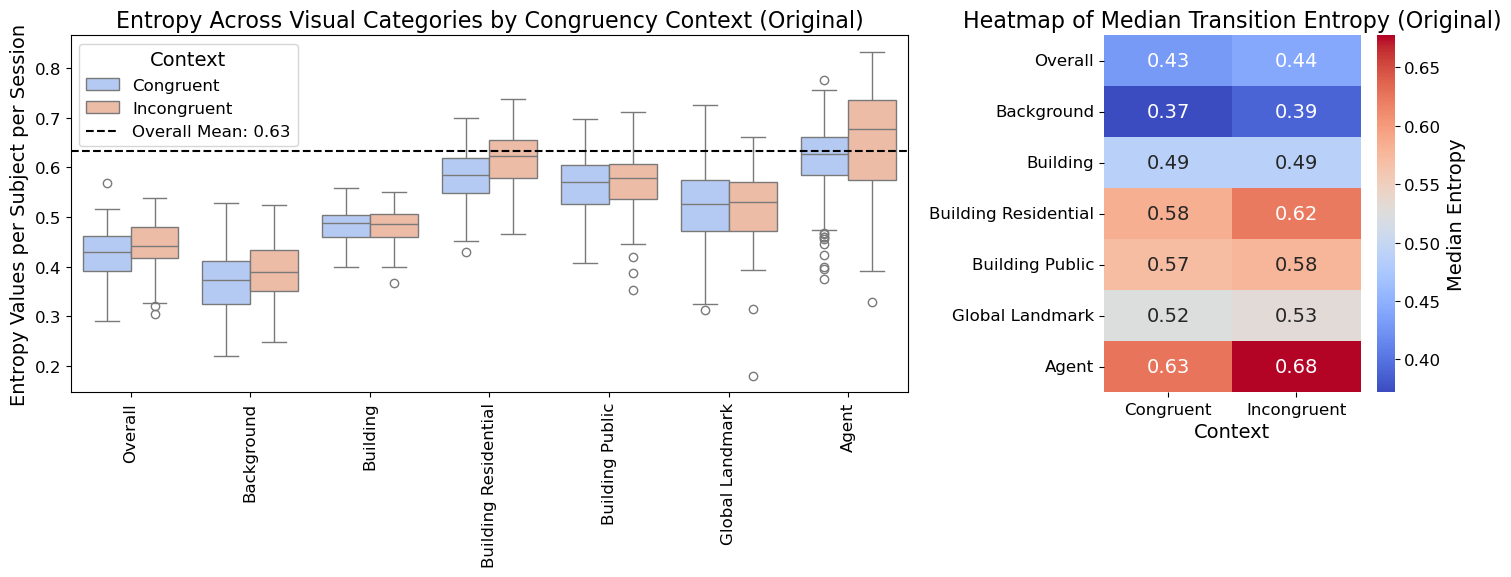

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/365304864.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([format_labels(tick.get_text()) for tick in ax3.get_xticklabels()], rotation=90)


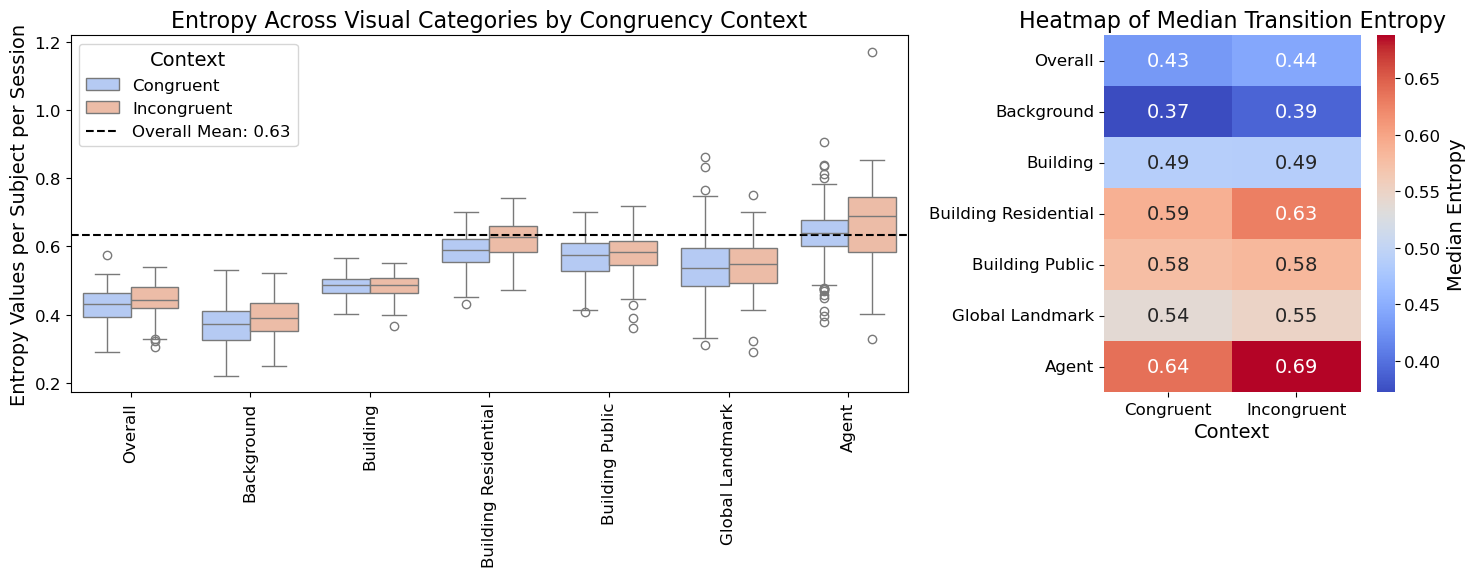

In [23]:
# Original selected columns for comparison
original_selected_columns = [
    'Overall_Transition_Entropy',
    'Transition_Entropy_Background',
    'Transition_Entropy_Building',
    'Transition_Entropy_TaskBuilding_Residential',
    'Transition_Entropy_TaskBuilding_Public',
    'Transition_Entropy_Global_Landmark',
    'Transition_Entropy_Active_Agent',
]

# Update the selected columns to include the 'Chao_Shen_' prefix
chao_shen_selected_columns = [
    'Chao_Shen_Overall_Transition_Entropy',
    'Chao_Shen_Transition_Entropy_Background',
    'Chao_Shen_Transition_Entropy_Building',
    'Chao_Shen_Transition_Entropy_TaskBuilding_Residential',
    'Chao_Shen_Transition_Entropy_TaskBuilding_Public',
    'Chao_Shen_Transition_Entropy_Global_Landmark',
    'Chao_Shen_Transition_Entropy_Active_Agent',

]

# Update format_labels function to handle both sets of labels
def format_labels(label):
    label = label.replace('Chao_Shen_', '')  # Remove prefix for display
    label = label.replace('_', ' ')
    label = label.replace('Transition Entropy', '')
    label = label.replace('TaskBuilding', ' Building')
    label = label.replace('Active', '')
    return label.strip()

# Prepare heatmap data for original columns
original_heatmap_data = combined_data.groupby(['Condition'])[original_selected_columns].median()
original_heatmap_data.columns = [format_labels(col) for col in original_heatmap_data.columns]

# Prepare heatmap data for Chao_Shen columns
chao_shen_heatmap_data = combined_data.groupby(['Condition'])[chao_shen_selected_columns].median()
chao_shen_heatmap_data.columns = [format_labels(col) for col in chao_shen_heatmap_data.columns]

# Melt the DataFrame and filter values greater than 0.01 for both sets of columns
original_melted_data = combined_data.melt(
    id_vars=['ParticipantID', 'SessionNr', 'Condition'],
    value_vars=original_selected_columns,
    var_name='Entropy_Type',
    value_name='Entropy_Value'
)
original_filtered_data = original_melted_data[original_melted_data['Entropy_Value'] > 0.01]

chao_shen_melted_data = combined_data.melt(
    id_vars=['ParticipantID', 'SessionNr', 'Condition'],
    value_vars=chao_shen_selected_columns,
    var_name='Entropy_Type',
    value_name='Entropy_Value'
)
chao_shen_filtered_data = chao_shen_melted_data[chao_shen_melted_data['Entropy_Value'] > 0.01]

# Create the first figure for original columns
plt.figure(figsize=(15, 6))
ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
sns.boxplot(
    data=original_filtered_data,
    x='Entropy_Type',
    y='Entropy_Value',
    hue='Condition',
    palette="coolwarm",
    ax=ax1
)
ax1.axhline(overall_mean, color='black', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')
ax1.set_title("Entropy Across Visual Categories by Congruency Context (Original)")
ax1.set_ylabel("Entropy Values per Subject per Session")
ax1.set_xlabel("")
ax1.set_xticklabels([format_labels(tick.get_text()) for tick in ax1.get_xticklabels()], rotation=90)
ax1.legend(title="Context")

ax2 = plt.subplot2grid((1, 3), (0, 2))
sns.heatmap(
    original_heatmap_data.T,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={'label': 'Median Entropy'},
    ax=ax2
)
ax2.set_title("Heatmap of Median Transition Entropy (Original)")
ax2.set_xlabel("Context")
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Categorical_entropy_original.png", dpi=600, bbox_inches="tight")
plt.show()

# Create the second figure for Chao_Shen columns
plt.figure(figsize=(15, 6))
ax3 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
sns.boxplot(
    data=chao_shen_filtered_data,
    x='Entropy_Type',
    y='Entropy_Value',
    hue='Condition',
    palette="coolwarm",
    ax=ax3
)
ax3.axhline(overall_mean, color='black', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')
ax3.set_title("Entropy Across Visual Categories by Congruency Context")
ax3.set_ylabel("Entropy Values per Subject per Session")
ax3.set_xlabel("")
ax3.set_xticklabels([format_labels(tick.get_text()) for tick in ax3.get_xticklabels()], rotation=90)
ax3.legend(title="Context")

ax4 = plt.subplot2grid((1, 3), (0, 2))
sns.heatmap(
    chao_shen_heatmap_data.T,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={'label': 'Median Entropy'},
    ax=ax4
)
ax4.set_title("Heatmap of Median Transition Entropy")
ax4.set_xlabel("Context")
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Categorical_entropy_chao_shen.png", dpi=600, bbox_inches="tight")
plt.show()


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/2660284077.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([format_labels(tick.get_text()) for tick in ax3.get_xticklabels()], rotation=90)


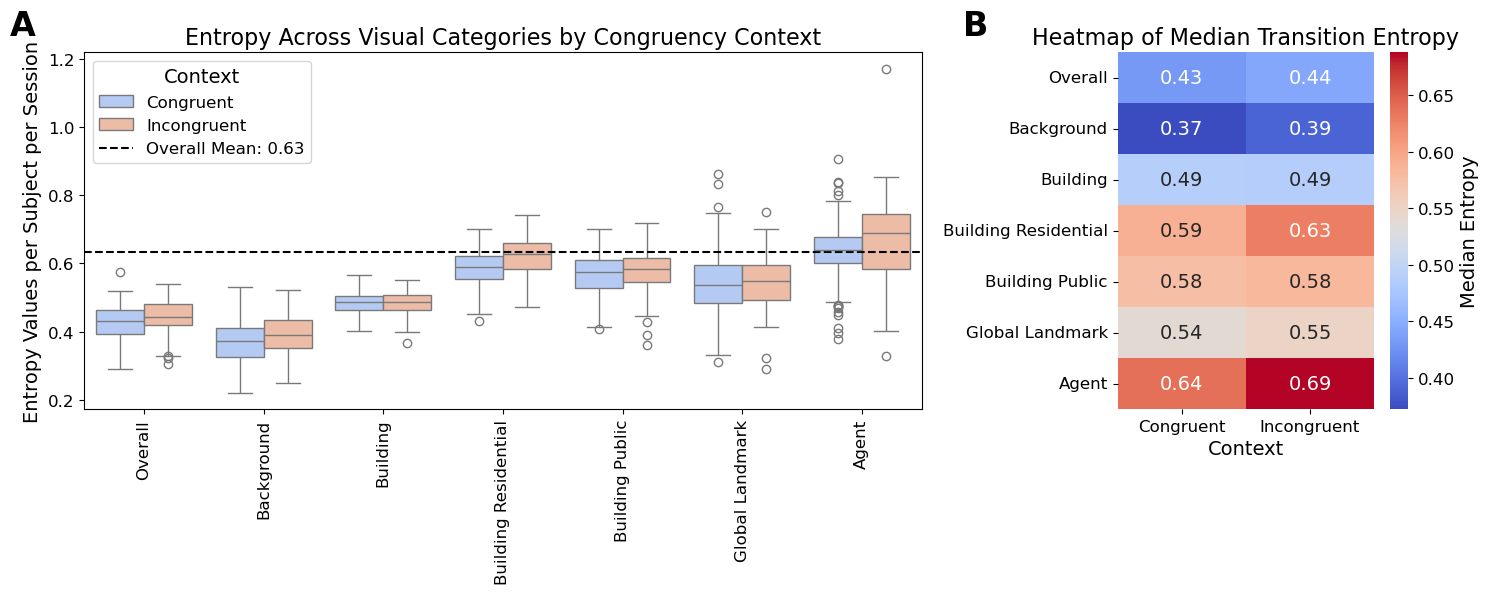

In [24]:
import matplotlib.pyplot as plt

# Create the second figure for Chao_Shen columns
plt.figure(figsize=(15, 6))

# Boxplot (A)
ax3 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
sns.boxplot(
    data=chao_shen_filtered_data,
    x='Entropy_Type',
    y='Entropy_Value',
    hue='Condition',
    palette="coolwarm",
    ax=ax3
)
ax3.axhline(overall_mean, color='black', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')
ax3.set_title("Entropy Across Visual Categories by Congruency Context")
ax3.set_ylabel("Entropy Values per Subject per Session")
ax3.set_xlabel("")
ax3.set_xticklabels([format_labels(tick.get_text()) for tick in ax3.get_xticklabels()], rotation=90)
ax3.legend(title="Context")

# Heatmap (B)
ax4 = plt.subplot2grid((1, 3), (0, 2))
sns.heatmap(
    chao_shen_heatmap_data.T,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={'label': 'Median Entropy'},
    ax=ax4
)
ax4.set_title("Heatmap of Median Transition Entropy")
ax4.set_xlabel("Context")

# Add annotations ABOVE each plot
plt.figtext(0.005, 0.95, "A", fontsize=24, fontweight="bold", color="black")  # Above the boxplot
plt.figtext(0.64, 0.95, "B", fontsize=24, fontweight="bold", color="black")  # Above the heatmap

# Adjust layout and save
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Categorical_entropy_chao_shen.png", dpi=600, bbox_inches="tight")
plt.show()


In [25]:

grouped_stats = chao_shen_filtered_data.groupby(["Condition", "Entropy_Type"]).agg(
    Mean_Entropy_Value=("Entropy_Value", "mean"),
    Std_Entropy_Value=("Entropy_Value", "std"),
    Count=("Entropy_Value", "count")).reset_index()
grouped_stats

Condition                                       Entropy_Type  \
0     Congruent               Chao_Shen_Overall_Transition_Entropy   
1     Congruent          Chao_Shen_Transition_Entropy_Active_Agent   
2     Congruent            Chao_Shen_Transition_Entropy_Background   
3     Congruent              Chao_Shen_Transition_Entropy_Building   
4     Congruent       Chao_Shen_Transition_Entropy_Global_Landmark   
5     Congruent   Chao_Shen_Transition_Entropy_TaskBuilding_Public   
6     Congruent  Chao_Shen_Transition_Entropy_TaskBuilding_Resi...   
7   Incongruent               Chao_Shen_Overall_Transition_Entropy   
8   Incongruent          Chao_Shen_Transition_Entropy_Active_Agent   
9   Incongruent            Chao_Shen_Transition_Entropy_Background   
10  Incongruent              Chao_Shen_Transition_Entropy_Building   
11  Incongruent       Chao_Shen_Transition_Entropy_Global_Landmark   
12  Incongruent   Chao_Shen_Transition_Entropy_TaskBuilding_Public   
13  Incongruent  Chao_Shen_Transition_Entropy_TaskBuilding_Resi...   

    Mean_Entropy_Value  Std_Entropy_Value  Count  
0             0.423699           0.053283    145  
1             0.634006           0.086463    145  
2             0.368040           0.060690    145  
3             0.484219           0.034352    145  
4             0.541048           0.095860    143  
5             0.567164           0.062179    145  
6             0.588452           0.053331    145  
7             0.442589           0.049185    145  
8             0.667886           0.114810    145  
9             0.388821           0.057939    145  
10            0.483303           0.035622    145  
11            0.542927           0.073376    145  
12            0.577572           0.060739    145  
13            0.621003           0.054189    145

## Introduction of dwelling times

In [26]:
Fixation_data_Exp1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Dwelling_Session_Exp1.cvs")
Fixation_data_Exp1["Experiment"] = 1
Fixation_data_Exp2 = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/Dwelling_Sessions_Exp2.cvs")
Fixation_data_Exp2["Experiment"] = 2

# Stack the two datasets on top of each other (concatenate rows)
Fixation_data_stacked = pd.concat([Fixation_data_Exp1, Fixation_data_Exp2], ignore_index=True)
Fixation_data_stacked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21590 entries, 0 to 21589
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             21590 non-null  int64  
 1   SubjectID              21590 non-null  int64  
 2   Session                21590 non-null  int64  
 3   recoded                21590 non-null  object 
 4   Collider_CategoricalN  21590 non-null  object 
 5   Dwelling_Time          21590 non-null  float64
 6   Fixation_Count         21590 non-null  int64  
 7   Experiment             21590 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1.3+ MB


In [27]:
Fixation_data_stacked.tail()

Unnamed: 0  SubjectID  Session                     recoded  \
21585       11828       9627        5              TaskBuilding_6   
21586       11829       9627        5              TaskBuilding_7   
21587       11830       9627        5              TaskBuilding_8   
21588       11831       9627        5              TaskBuilding_9   
21589       11832       9627        5  Windmill-TaskBuilding_10_1   

          Collider_CategoricalN  Dwelling_Time  Fixation_Count  Experiment  
21585  TaskBuilding_Residential       9.363494               2           2  
21586  TaskBuilding_Residential       6.325496               4           2  
21587       TaskBuilding_Public      10.597064               2           2  
21588       TaskBuilding_Public       9.779672              18           2  
21589           Global_Landmark      31.115158              27           2

In [28]:
Fixation_data_stacked.groupby(["Experiment", "SubjectID", "Session", 'recoded', "Collider_CategoricalN"]
                                                         )[["Dwelling_Time", "Fixation_Count"]].max()

Dwelling_Time  \
Experiment SubjectID Session recoded                    Collider_CategoricalN                     
1          365       1       01_Cma                     Active_Agent                   0.376960   
                             02_Cma                     Active_Agent                   0.394320   
                             05_Cma                     Active_Agent                   0.203856   
                             06_Cma                     Active_Agent                   0.355629   
                             07_Cma                     Active_Agent                   0.365552   
...                                                                                         ...   
2          9627      5       TaskBuilding_6             TaskBuilding_Residential       9.363494   
                             TaskBuilding_7             TaskBuilding_Residential       6.325496   
                             TaskBuilding_8             TaskBuilding_Public           10.597064   
                             TaskBuilding_9             TaskBuilding_Public            9.779672   
                             Windmill-TaskBuilding_10_1 Global_Landmark               31.115158   

                                                                                  Fixation_Count  
Experiment SubjectID Session recoded                    Collider_CategoricalN                     
1          365       1       01_Cma                     Active_Agent                           1  
                             02_Cma                     Active_Agent                           2  
                             05_Cma                     Active_Agent                           1  
                             06_Cma                     Active_Agent                           3  
                             07_Cma                     Active_Agent                           1  
...                                                                                          ...  
2          9627      5       TaskBuilding_6             TaskBuilding_Residential               2  
                             TaskBuilding_7             TaskBuilding_Residential               4  
                             TaskBuilding_8             TaskBuilding_Public                    2  
                             TaskBuilding_9             TaskBuilding_Public                   18  
                             Windmill-TaskBuilding_10_1 Global_Landmark                       27  

[21590 rows x 2 columns]

In [29]:
Fixations_Grouped = pd.DataFrame(Fixation_data_stacked.groupby(["Experiment", "SubjectID", "Session", 'recoded', "Collider_CategoricalN"]
                                                         )[["Dwelling_Time", "Fixation_Count"]].max())
Fixations_Grouped.reset_index(inplace=True)
# Filter rows where 'Collider_CategoricalN' contains 'Agent'
Fixations_Agent = Fixations_Grouped[Fixations_Grouped['Collider_CategoricalN'].str.contains('Agent')]
# Filter rows where 'Collider_CategoricalN' contains 'Agent' OR 'task'
Fixations_BuildingTask = Fixations_Grouped[Fixations_Grouped['Collider_CategoricalN'].str.contains('Task', case=False, na=False)]


# Display the filtered DataFrame
Fixations_Agent.head()

# Ensure the column names match for merging
Fixations_Agent.rename(columns={'SubjectID': 'ParticipantID', "Session": "SessionNr"}, inplace=True)
# Step 1: Ensure columns are of the same data type
Fixations_Agent['ParticipantID'] = Fixations_Agent['ParticipantID'].astype(str)
Fixations_Agent['SessionNr'] = Fixations_Agent['SessionNr'].astype(str)


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/1374973110.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fixations_Agent.rename(columns={'SubjectID': 'ParticipantID', "Session": "SessionNr"}, inplace=True)
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/1374973110.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fixations_Agent['ParticipantID'] = Fixations_Agent['ParticipantID'].astype(str)
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/1374973110.py:17: SettingWithCopyWarning: 
A value is trying to b

In [30]:
Fixations_Agent.to_csv("/Volumes/TwoTeras/3_Merged_Experiments/Fixations_Dwelling_Sessions.csv")

In [31]:
Fixations_Agent.head()

Experiment ParticipantID SessionNr recoded Collider_CategoricalN  \
0           1           365         1  01_Cma          Active_Agent   
1           1           365         1  02_Cma          Active_Agent   
2           1           365         1  05_Cma          Active_Agent   
3           1           365         1  06_Cma          Active_Agent   
4           1           365         1  07_Cma          Active_Agent   

   Dwelling_Time  Fixation_Count  
0       0.376960               1  
1       0.394320               2  
2       0.203856               1  
3       0.355629               3  
4       0.365552               1

In [32]:
# Step 1: Create a pivot table
Fixations_Wide = (
    Fixations_Agent
    .pivot_table(
        index=['ParticipantID', 'SessionNr', 'Experiment'],  # Grouping keys
        columns='Collider_CategoricalN',  # Values to pivot
        values=['Dwelling_Time', 'Fixation_Count'],  # Metrics to pivot
        fill_value=0,  # Replace NaN with 0
        aggfunc='sum'  # Aggregate function
    )
)

# Step 2: Flatten the MultiIndex columns for cleaner names
Fixations_Wide.columns = ['_'.join(col).strip() for col in Fixations_Wide.columns.values]

# Step 3: Reset the index to return a clean DataFrame
Fixations_Wide = Fixations_Wide.reset_index()

# Step 4: Display the resulting DataFrame
Fixations_Wide.head()

ParticipantID SessionNr  Experiment  Dwelling_Time_Active_Agent  \
0          1031         1           2                   17.497893   
1          1031         2           2                   29.773129   
2          1031         3           2                  100.392456   
3          1031         4           2                  135.231728   
4          1031         5           2                  183.140683   

   Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
0                     8.828815                          100   
1                    12.559337                           67   
2                    44.616875                          427   
3                    97.903888                          409   
4                    90.319340                          241   

   Fixation_Count_Passive_Agent  
0                            49  
1                            45  
2                           174  
3                           323  
4                           177

In [33]:

# Step 1: Ensure columns are of the same data type
Fixations_Wide['ParticipantID'] = Fixations_Wide['ParticipantID'].astype(str)
combined_data['ParticipantID'] = combined_data['ParticipantID'].astype(str)

Fixations_Wide['SessionNr'] = Fixations_Wide['SessionNr'].astype(str)
combined_data['SessionNr'] = combined_data['SessionNr'].astype(str)

# Merge the two datasets on 'SubjectID', 'Session', and 'Experiment' (adjusting the common key names)
# Perform the merge
combined_data_fixations = pd.merge(Fixations_Wide, combined_data, on=['ParticipantID', 'SessionNr'], how='inner')

# Display the merged dataset
combined_data_fixations.head()

ParticipantID SessionNr  Experiment_x  Dwelling_Time_Active_Agent  \
0          1031         1             2                   17.497893   
1          1031         2             2                   29.773129   
2          1031         3             2                  100.392456   
3          1031         4             2                  135.231728   
4          1031         5             2                  183.140683   

   Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
0                     8.828815                          100   
1                    12.559337                           67   
2                    44.616875                          427   
3                    97.903888                          409   
4                    90.319340                          241   

   Fixation_Count_Passive_Agent  Overall_Transition_Entropy  \
0                            49                    0.435381   
1                            45                    0.423716   
2                           174                    0.473820   
3                           323                    0.493701   
4                           177                    0.425804   

   Chao_Shen_Overall_Transition_Entropy  Transition_Entropy_Background  ...  \
0                              0.436534                       0.376847  ...   
1                              0.424952                       0.357604  ...   
2                              0.474437                       0.419146  ...   
3                              0.494628                       0.420797  ...   
4                              0.426984                       0.350460  ...   

   Chao_Shen_Transition_Entropy_Active_Agent  Stationary_Entropy_Background  \
0                                   0.631360                       0.157609   
1                                   0.614289                       0.140636   
2                                   0.454146                       0.174113   
3                                   0.490335                       0.168952   
4                                   0.480003                       0.137788   

   Stationary_Entropy_Building  Stationary_Entropy_TaskBuilding_Public  \
0                     0.171964                                0.102136   
1                     0.165106                                0.079361   
2                     0.173092                                0.090841   
3                     0.158010                                0.090322   
4                     0.148921                                0.064772   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.078791   
1                                     0.081223   
2                                     0.099078   
3                                     0.085912   
4                                     0.080334   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.042008                          0.020865   
1                            0.028060                          0.020877   
2                            0.020765                          0.053666   
3                            0.023548                          0.089081   
4                            0.021573                          0.055375   

   Stationary_Entropy_Active_Agent  Experiment_y    Condition  
0                         0.037226  Experiment_2  Incongruent  
1                         0.028060  Experiment_2  Incongruent  
2                         0.097593  Experiment_2  Incongruent  
3                         0.100703  Experiment_2  Incongruent  
4                         0.068080  Experiment_2  Incongruent  

[5 rows x 32 columns]

In [34]:
combined_data_fixations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 32 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ParticipantID                                          273 non-null    object 
 1   SessionNr                                              273 non-null    object 
 2   Experiment_x                                           273 non-null    int64  
 3   Dwelling_Time_Active_Agent                             273 non-null    float64
 4   Dwelling_Time_Passive_Agent                            273 non-null    float64
 5   Fixation_Count_Active_Agent                            273 non-null    int64  
 6   Fixation_Count_Passive_Agent                           273 non-null    int64  
 7   Overall_Transition_Entropy                             273 non-null    float64
 8   Chao_Shen_Overall_Transition_Entropy              

In [35]:
# Specify the columns for correlation analysis
# Dynamically filter columns while excluding specific ones
active_columns = [
    col for col in combined_data_fixations.columns 
    if ('Active' in col and 'Stationary' not in col and col != 'Transition_Entropy_Active_Agent')
]
passive_columns = [
    col for col in combined_data_fixations.columns 
    if ('Passive' in col and 'Stationary' not in col and col != 'Transition_Entropy_Passive_Agent')
]
extra_columns = []

# Further filter for relevant columns in Active and Passive Agents
active_columns.extend(extra_columns)
passive_columns.extend(extra_columns)

# Filter data based on conditions
filtered_congruent = combined_data_fixations[combined_data_fixations['Condition'] == 'Congruent']
filtered_incongruent = combined_data_fixations[combined_data_fixations['Condition'] == 'Incongruent']

# Filter only the required columns for correlation matrices
filtered_active_congruent_data = filtered_congruent[active_columns]
filtered_active_incongruent_data = filtered_incongruent[active_columns]
filtered_passive_data = combined_data_fixations[passive_columns]

# Calculate correlation matrices
corr_matrix_congruent = filtered_active_congruent_data.corr()
corr_matrix_incongruent = filtered_active_incongruent_data.corr()
corr_matrix_passive = filtered_passive_data.corr()


In [36]:
active_columns

['Dwelling_Time_Active_Agent',
 'Fixation_Count_Active_Agent',
 'Chao_Shen_Transition_Entropy_Active_Agent']

In [37]:
filtered_congruent.head()

ParticipantID SessionNr  Experiment_x  Dwelling_Time_Active_Agent  \
25          1754         1             1                   12.427298   
26          1754         2             1                   11.868830   
27          1754         3             1                   15.421603   
28          1754         4             1                   11.019502   
29          1754         5             1                   18.410781   

    Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
25                     6.001610                           62   
26                     9.268781                           26   
27                    11.754455                           22   
28                    15.045973                           22   
29                    22.826243                           24   

    Fixation_Count_Passive_Agent  Overall_Transition_Entropy  \
25                            27                    0.418186   
26                            23                    0.437667   
27                            27                    0.476741   
28                            23                    0.457486   
29                            27                    0.418219   

    Chao_Shen_Overall_Transition_Entropy  Transition_Entropy_Background  ...  \
25                              0.418806                       0.409746  ...   
26                              0.438649                       0.444608  ...   
27                              0.477635                       0.456125  ...   
28                              0.458469                       0.409551  ...   
29                              0.418662                       0.354675  ...   

    Chao_Shen_Transition_Entropy_Active_Agent  Stationary_Entropy_Background  \
25                                   0.638640                       0.183415   
26                                   0.650746                       0.184506   
27                                   0.624474                       0.184388   
28                                   0.635560                       0.166101   
29                                   0.654639                       0.147401   

    Stationary_Entropy_Building  Stationary_Entropy_TaskBuilding_Public  \
25                     0.185106                                0.119414   
26                     0.184744                                0.119590   
27                     0.189033                                0.083341   
28                     0.184140                                0.094108   
29                     0.176457                                0.078305   

    Stationary_Entropy_TaskBuilding_Residential  \
25                                     0.109826   
26                                     0.124917   
27                                     0.123803   
28                                     0.087930   
29                                     0.079132   

    Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
25                            0.062524                          0.012740   
26                            0.060542                          0.011966   
27                            0.025637                          0.013694   
28                            0.025855                          0.012002   
29                            0.016937                          0.013793   

    Stationary_Entropy_Active_Agent  Experiment_y  Condition  
25                         0.027955  Experiment_1  Congruent  
26                         0.013087  Experiment_1  Congruent  
27                         0.011026  Experiment_1  Congruent  
28                         0.012002  Experiment_1  Congruent  
29                         0.013794  Experiment_1  Congruent  

[5 rows x 32 columns]

In [38]:
corr_matrix_congruent

Dwelling_Time_Active_Agent  \
Dwelling_Time_Active_Agent                                   1.000000   
Fixation_Count_Active_Agent                                  0.503679   
Chao_Shen_Transition_Entropy_Active_Agent                   -0.193520   

                                           Fixation_Count_Active_Agent  \
Dwelling_Time_Active_Agent                                    0.503679   
Fixation_Count_Active_Agent                                   1.000000   
Chao_Shen_Transition_Entropy_Active_Agent                    -0.609706   

                                           Chao_Shen_Transition_Entropy_Active_Agent  
Dwelling_Time_Active_Agent                                                 -0.193520  
Fixation_Count_Active_Agent                                                -0.609706  
Chao_Shen_Transition_Entropy_Active_Agent                                   1.000000

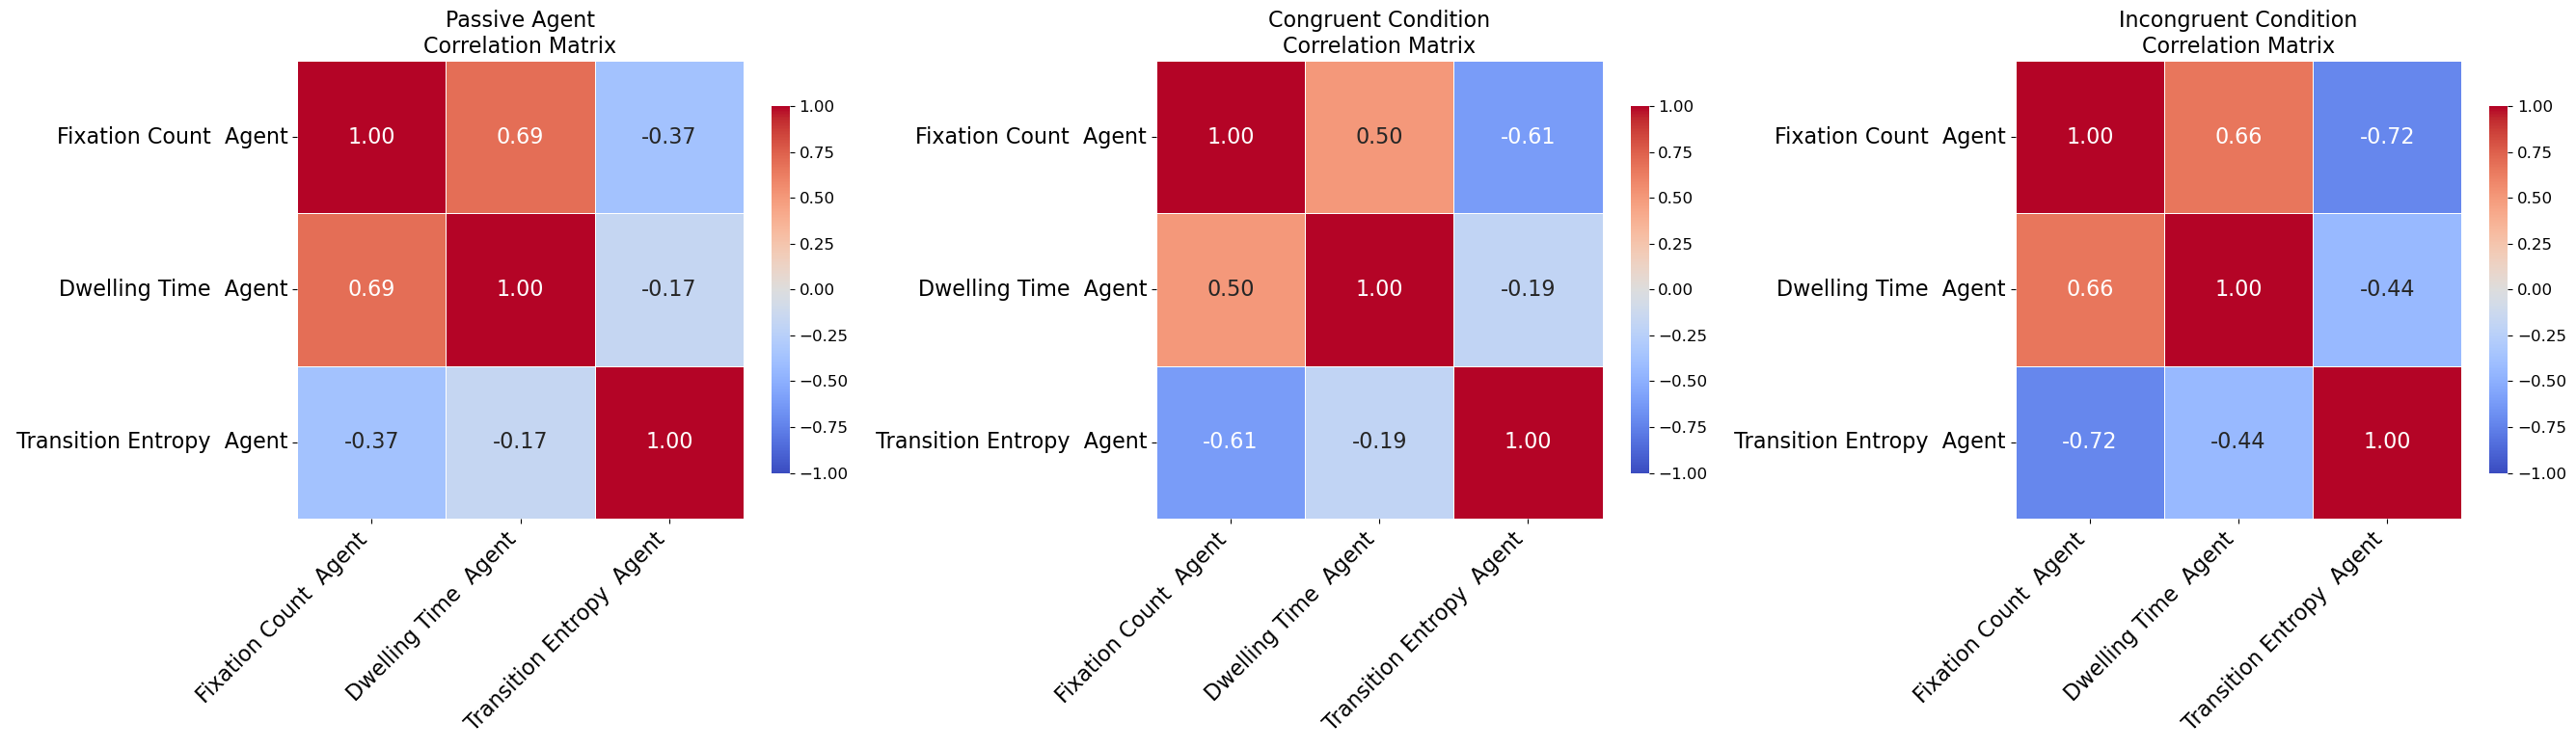

In [39]:


# Define the function to format tick labels
def format_ticks(labels):
    """Modify tick labels to remove unnecessary words and format them."""
    formatted_labels = []
    for label in labels:
        text = label.get_text()
        # Remove everything after 'Dwelling Time'
        if 'Dwelling Time' in text:
            text = text.split('Dwelling Time')[0] + 'Dwelling Time'
        # Replace 'TaskBuilding Public' and 'TaskBuilding Residential'
        text = text.replace('TaskBuilding_Public', 'Building behind Agent').replace('TaskBuilding_Residential', 'Building behind Agent').strip()
        # Remove 'Active', 'Passive', and 'Chao_Shen'
        text = text.replace('Active', '').replace('Passive', '').replace('Chao_Shen', '').strip()
        # Replace underscores with spaces
        text = text.replace('_', ' ')
        formatted_labels.append(text)
    return formatted_labels

# Reorder rows and columns of the correlation matrices
def reorder_matrix(matrix, first_row):
    """Reorder rows and columns in the correlation matrix."""
    rows = list(matrix.index)
    if len(rows) > 1:
        second_row = rows[1]  # Current second row
        rows.remove(second_row)
        rows.insert(0, second_row)
    return matrix.loc[rows, rows]

# Plot the correlation matrices
fig, axes = plt.subplots(1, 3, figsize=(27, 8))  # Increase figure size for better rendering

# Passive Agent correlation matrix
corr_matrix_passive = reorder_matrix(corr_matrix_passive, "Fixation count")
sns.heatmap(
    corr_matrix_passive,
    annot=True,
    annot_kws={"size": 16},  # Increase font size for annotations
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    center=0,
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    mask=corr_matrix_passive.isnull(),
    ax=axes[0]
)
axes[0].set_title('Passive Agent\nCorrelation Matrix', fontsize=16)
axes[0].set_xticklabels(format_ticks(axes[0].get_xticklabels()), rotation=45, ha='right', fontsize=16)
axes[0].set_yticklabels(format_ticks(axes[0].get_yticklabels()), rotation=0, fontsize=16)

# Active Agent - Congruent condition correlation matrix
corr_matrix_congruent = reorder_matrix(corr_matrix_congruent, "Fixation count")
sns.heatmap(
    corr_matrix_congruent,
    annot=True,
    annot_kws={"size": 16},  # Increase font size for annotations
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    center=0,
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    mask=corr_matrix_congruent.isnull(),
    ax=axes[1]
)
axes[1].set_title('Congruent Condition\nCorrelation Matrix', fontsize=16)
axes[1].set_xticklabels(format_ticks(axes[1].get_xticklabels()), rotation=45, ha='right', fontsize=16)
axes[1].set_yticklabels(format_ticks(axes[1].get_yticklabels()), rotation=0, fontsize=16)

# Active Agent - Incongruent condition correlation matrix
corr_matrix_incongruent = reorder_matrix(corr_matrix_incongruent, "Fixation count")
sns.heatmap(
    corr_matrix_incongruent,
    annot=True,
    annot_kws={"size": 16},  # Increase font size for annotations
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    center=0,
    cbar_kws={'shrink': 0.8},
    linewidths=0.5,
    mask=corr_matrix_incongruent.isnull(),
    ax=axes[2]
)
axes[2].set_title('Incongruent Condition\nCorrelation Matrix', fontsize=16)
axes[2].set_xticklabels(format_ticks(axes[2].get_xticklabels()), rotation=45, ha='right', fontsize=16)
axes[2].set_yticklabels(format_ticks(axes[2].get_yticklabels()), rotation=0, fontsize=16)

# Adjust layout
plt.tight_layout()

# Save the figure with higher DPI for better quality
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Updated_Entropy_Correlation_Matrices_HighRes_Improved.png", dpi=600, bbox_inches="tight")

# Display the plot
plt.show()


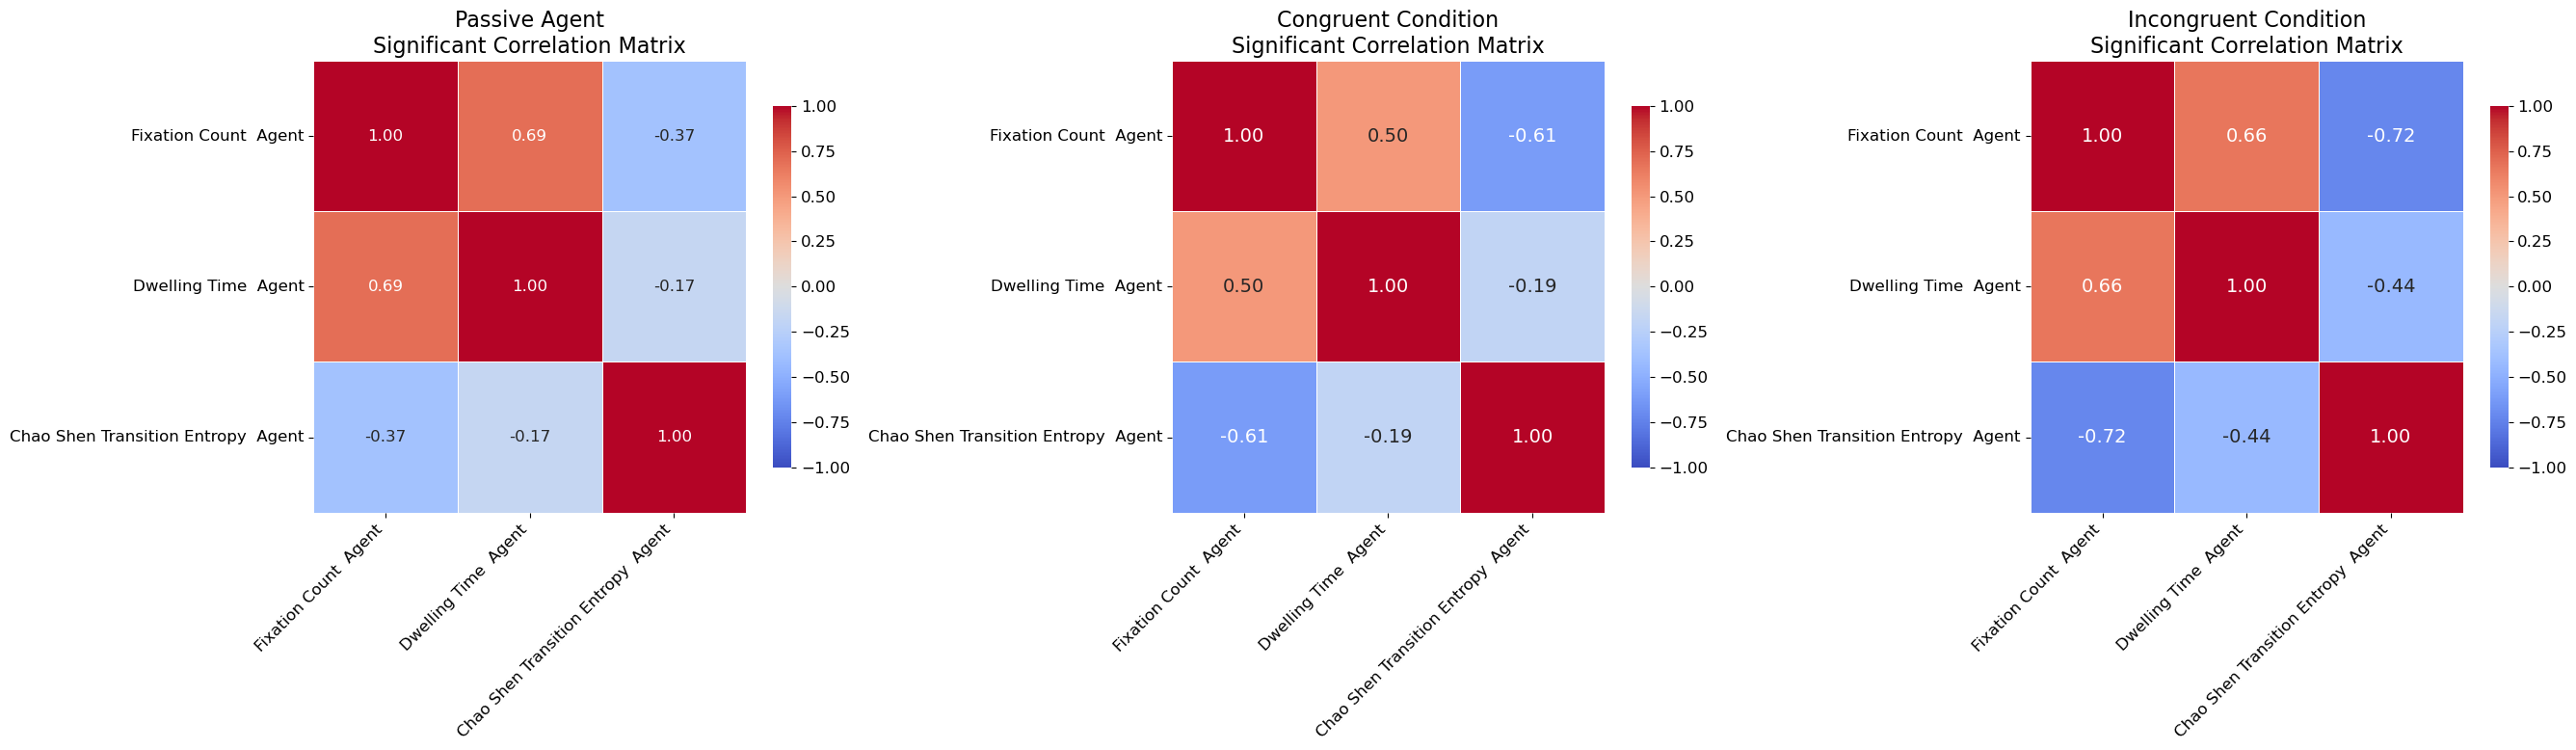

In [40]:

from scipy.stats import pearsonr

# Define the function to format tick labels
def format_ticks(labels):
    """Modify tick labels to remove unnecessary words and format them."""
    formatted_labels = []
    for label in labels:
        text = label.get_text()
        # Remove everything after 'Dwelling Time'
        if 'Dwelling Time' in text:
            text = text.split('Dwelling Time')[0] + 'Dwelling Time'
        # Replace 'TaskBuilding_Public' and 'TaskBuilding_Residential'
        text = text.replace('TaskBuilding_Public', 'Building behind Agent').replace('TaskBuilding_Residential', 'Building behind Agent').strip()
        # Remove 'Active' and 'Passive'
        text = text.replace('Active', '').replace('Passive', '').strip()
        # Replace underscores with spaces
        text = text.replace('_', ' ')
        formatted_labels.append(text)
    return formatted_labels

# Reorder rows and columns of the correlation matrices
def reorder_matrix(matrix):
    """Reorder rows and columns in the correlation matrix to start with the second row."""
    rows = list(matrix.index)
    if len(rows) > 1:
        second_row = rows[1]  # Current second row
        rows.remove(second_row)
        rows.insert(0, second_row)
    return matrix.loc[rows, rows]

# Function to calculate significant correlations
def calculate_significant_correlations(df, alpha=0.05):
    """Calculate correlations and mask non-significant ones."""
    corr_matrix = df.corr()
    p_matrix = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)

    for row in df.columns:
        for col in df.columns:
            if row != col:
                valid_data = df[[row, col]].dropna()
                if len(valid_data) > 1:  # Ensure enough data points for correlation
                    _, p_value = pearsonr(valid_data[row], valid_data[col])
                    p_matrix.at[row, col] = p_value
                else:
                    p_matrix.at[row, col] = np.nan  # Mark as NaN if insufficient data

    # Mask non-significant correlations
    mask = (p_matrix > alpha) | (p_matrix.isna())
    corr_matrix[mask] = np.nan
    return corr_matrix

# Calculate the significant correlation matrices
corr_matrix_congruent = calculate_significant_correlations(filtered_active_congruent_data)
corr_matrix_incongruent = calculate_significant_correlations(filtered_active_incongruent_data)
corr_matrix_passive = calculate_significant_correlations(filtered_passive_data)

# Plot the significant correlation matrices
fig, axes = plt.subplots(1, 3, figsize=(27, 8))  # Large figure for better rendering

# Passive Agent correlation matrix
corr_matrix_passive = reorder_matrix(corr_matrix_passive)
sns.heatmap(
    corr_matrix_passive, 
    annot=True, 
    annot_kws={"size": 12},  # Larger annotations
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_passive.isnull(), 
    ax=axes[0]
)
axes[0].set_title('Passive Agent\nSignificant Correlation Matrix', fontsize=16)
axes[0].set_xticklabels(format_ticks(axes[0].get_xticklabels()), rotation=45, ha='right', fontsize=12)
axes[0].set_yticklabels(format_ticks(axes[0].get_yticklabels()), rotation=0, fontsize=12)

# Congruent condition correlation matrix
corr_matrix_congruent = reorder_matrix(corr_matrix_congruent)
sns.heatmap(
    corr_matrix_congruent, 
    annot=True, 
    annot_kws={"size": 14},  # Larger annotations
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_congruent.isnull(), 
    ax=axes[1]
)
axes[1].set_title('Congruent Condition\nSignificant Correlation Matrix', fontsize=16)
axes[1].set_xticklabels(format_ticks(axes[1].get_xticklabels()), rotation=45, ha='right', fontsize=12)
axes[1].set_yticklabels(format_ticks(axes[1].get_yticklabels()), rotation=0, fontsize=12)

# Incongruent condition correlation matrix
corr_matrix_incongruent = reorder_matrix(corr_matrix_incongruent)
sns.heatmap(
    corr_matrix_incongruent, 
    annot=True, 
    annot_kws={"size": 14},  # Larger annotations
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_incongruent.isnull(), 
    ax=axes[2]
)
axes[2].set_title('Incongruent Condition\nSignificant Correlation Matrix', fontsize=16)
axes[2].set_xticklabels(format_ticks(axes[2].get_xticklabels()), rotation=45, ha='right', fontsize=12)
axes[2].set_yticklabels(format_ticks(axes[2].get_yticklabels()), rotation=0, fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the figure with higher DPI for better quality
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Significant_Entropy_Correlation_Matrices_HighRes.png", dpi=600, bbox_inches="tight")

# Display the plot
plt.show()


In [41]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

def calculate_significant_correlations_apa(df, alpha=0.05):
    """Calculate correlations and format results in APA style."""
    corr_matrix = df.corr()
    p_matrix = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)
    sample_size = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)
    
    results = []

    for row in df.columns:
        for col in df.columns:
            if row != col:
                valid_data = df[[row, col]].dropna()
                n = len(valid_data)
                if n > 1:  # Ensure enough data points for correlation
                    r, p_value = pearsonr(valid_data[row], valid_data[col])
                    p_matrix.at[row, col] = p_value
                    sample_size.at[row, col] = n

                    # Format correlation in APA style
                    significance = ""
                    if p_value < 0.01:
                        significance = "**"
                    elif p_value < 0.05:
                        significance = "*"

                    results.append(f"{row} & {col}: r({n}) = {r:.2f}, p = {p_value:.3f} {significance}")
                else:
                    p_matrix.at[row, col] = np.nan
                    sample_size.at[row, col] = np.nan

    # Print all correlations in APA format
    print("\n".join(results))
    return corr_matrix

# Generate APA-style correlation reports
print("### Congruent Data ###")
calculate_significant_correlations_apa(filtered_active_congruent_data)

print("\n### Incongruent Data ###")
calculate_significant_correlations_apa(filtered_active_incongruent_data)

print("\n### Passive Data ###")
calculate_significant_correlations_apa(filtered_passive_data)

### Congruent Data ###
Dwelling_Time_Active_Agent & Fixation_Count_Active_Agent: r(128) = 0.50, p = 0.000 **
Dwelling_Time_Active_Agent & Chao_Shen_Transition_Entropy_Active_Agent: r(128) = -0.19, p = 0.029 *
Fixation_Count_Active_Agent & Dwelling_Time_Active_Agent: r(128) = 0.50, p = 0.000 **
Fixation_Count_Active_Agent & Chao_Shen_Transition_Entropy_Active_Agent: r(128) = -0.61, p = 0.000 **
Chao_Shen_Transition_Entropy_Active_Agent & Dwelling_Time_Active_Agent: r(128) = -0.19, p = 0.029 *
Chao_Shen_Transition_Entropy_Active_Agent & Fixation_Count_Active_Agent: r(128) = -0.61, p = 0.000 **

### Incongruent Data ###
Dwelling_Time_Active_Agent & Fixation_Count_Active_Agent: r(145) = 0.66, p = 0.000 **
Dwelling_Time_Active_Agent & Chao_Shen_Transition_Entropy_Active_Agent: r(145) = -0.44, p = 0.000 **
Fixation_Count_Active_Agent & Dwelling_Time_Active_Agent: r(145) = 0.66, p = 0.000 **
Fixation_Count_Active_Agent & Chao_Shen_Transition_Entropy_Active_Agent: r(145) = -0.72, p = 0.000 **


Dwelling_Time_Passive_Agent  \
Dwelling_Time_Passive_Agent                                    1.000000   
Fixation_Count_Passive_Agent                                   0.690627   
Chao_Shen_Transition_Entropy_Passive_Agent                    -0.170357   

                                            Fixation_Count_Passive_Agent  \
Dwelling_Time_Passive_Agent                                     0.690627   
Fixation_Count_Passive_Agent                                    1.000000   
Chao_Shen_Transition_Entropy_Passive_Agent                     -0.370698   

                                            Chao_Shen_Transition_Entropy_Passive_Agent  
Dwelling_Time_Passive_Agent                                                  -0.170357  
Fixation_Count_Passive_Agent                                                 -0.370698  
Chao_Shen_Transition_Entropy_Passive_Agent                                    1.000000

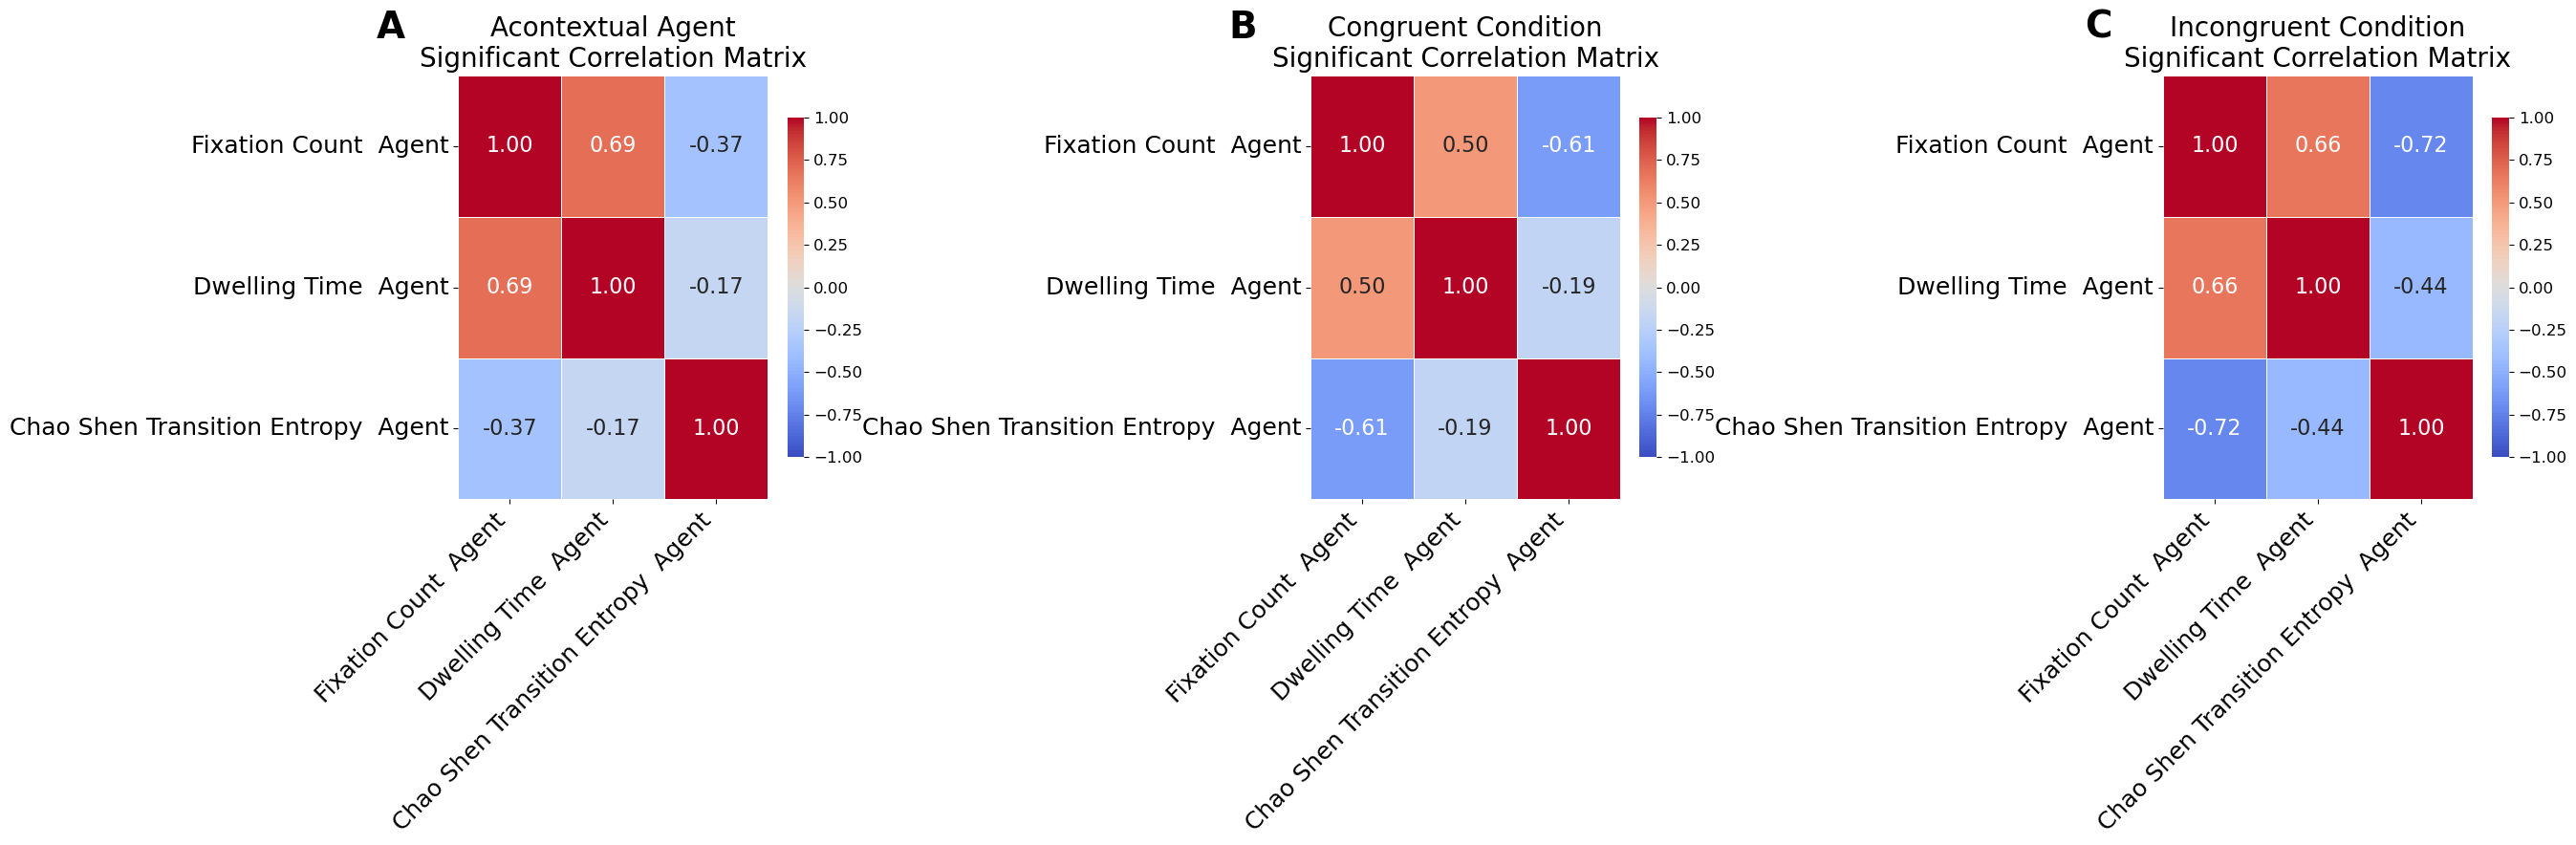

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Function to format tick labels
def format_ticks(labels):
    """Modify tick labels to improve readability."""
    formatted_labels = []
    for label in labels:
        text = label.get_text()
    
        text = text.replace('TaskBuilding_Public', 'Building behind Agent').replace('TaskBuilding_Residential', 'Building behind Agent').strip()
        text = text.replace('Active', '').replace('Passive', '').strip()
        text = text.replace('_', ' ')
        text = text.replace("Chao Chen transition entropy agent", "GTE")  # Replace text
        formatted_labels.append(text)
    return formatted_labels

# Function to reorder matrix
def reorder_matrix(matrix):
    """Reorder rows and columns in the correlation matrix to start with the second row."""
    rows = list(matrix.index)
    if len(rows) > 1:
        second_row = rows[1]  # Current second row
        rows.remove(second_row)
        rows.insert(0, second_row)
    return matrix.loc[rows, rows]

# Function to calculate significant correlations
def calculate_significant_correlations(df, alpha=0.05):
    """Calculate correlations and mask non-significant ones."""
    corr_matrix = df.corr()
    p_matrix = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)

    for row in df.columns:
        for col in df.columns:
            if row != col:
                valid_data = df[[row, col]].dropna()
                if len(valid_data) > 1:  # Ensure enough data points for correlation
                    _, p_value = pearsonr(valid_data[row], valid_data[col])
                    p_matrix.at[row, col] = p_value
                else:
                    p_matrix.at[row, col] = np.nan  # Mark as NaN if insufficient data

    # Mask non-significant correlations
    mask = (p_matrix > alpha) | (p_matrix.isna())
    corr_matrix[mask] = np.nan
    return corr_matrix

# Calculate significant correlation matrices
corr_matrix_congruent = calculate_significant_correlations(filtered_active_congruent_data)
corr_matrix_incongruent = calculate_significant_correlations(filtered_active_incongruent_data)
corr_matrix_passive = calculate_significant_correlations(filtered_passive_data)

# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(27, 9))  # Slightly taller for better spacing

# Passive Agent correlation matrix (A)
corr_matrix_passive = reorder_matrix(corr_matrix_passive)
sns.heatmap(
    corr_matrix_passive, 
    annot=True, 
    annot_kws={"size": 16},  # Larger text
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_passive.isnull(), 
    ax=axes[0]
)
axes[0].set_title('Acontextual Agent\nSignificant Correlation Matrix', fontsize=20)
axes[0].set_xticklabels(format_ticks(axes[0].get_xticklabels()), rotation=45, ha='right', fontsize=18)
axes[0].set_yticklabels(format_ticks(axes[0].get_yticklabels()), rotation=0, fontsize=18)

# Congruent condition correlation matrix (B)
corr_matrix_congruent = reorder_matrix(corr_matrix_congruent)
sns.heatmap(
    corr_matrix_congruent, 
    annot=True, 
    annot_kws={"size": 16},  # Larger text
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_congruent.isnull(), 
    ax=axes[1]
)
axes[1].set_title('Congruent Condition\nSignificant Correlation Matrix', fontsize=20)
axes[1].set_xticklabels(format_ticks(axes[1].get_xticklabels()), rotation=45, ha='right', fontsize=18)
axes[1].set_yticklabels(format_ticks(axes[1].get_yticklabels()), rotation=0, fontsize=18)

# Incongruent condition correlation matrix (C)
corr_matrix_incongruent = reorder_matrix(corr_matrix_incongruent)
sns.heatmap(
    corr_matrix_incongruent, 
    annot=True, 
    annot_kws={"size": 16},  # Larger text
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_incongruent.isnull(), 
    ax=axes[2]
)
axes[2].set_title('Incongruent Condition\nSignificant Correlation Matrix', fontsize=20)
axes[2].set_xticklabels(format_ticks(axes[2].get_xticklabels()), rotation=45, ha='right', fontsize=18)
axes[2].set_yticklabels(format_ticks(axes[2].get_yticklabels()), rotation=0, fontsize=18)

# Add labels "A", "B", and "C" ABOVE each plot
fig.text(0.15, 0.95, "A", fontsize=28, fontweight="bold", color="black")  # Above the Passive matrix
fig.text(0.48, 0.95, "B", fontsize=28, fontweight="bold", color="black")  # Above the Congruent matrix
fig.text(0.812, 0.95, "C", fontsize=28, fontweight="bold", color="black")  # Above the Incongruent matrix

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Significant_Entropy_Correlation_Matrices_HighRes.png", dpi=600, bbox_inches="tight")

# Display the plot
plt.show()


In [43]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 0 to 144
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Overall_Transition_Entropy                             290 non-null    float64
 1   Chao_Shen_Overall_Transition_Entropy                   290 non-null    float64
 2   Transition_Entropy_Background                          290 non-null    float64
 3   Transition_Entropy_Building                            290 non-null    float64
 4   Transition_Entropy_TaskBuilding_Public                 290 non-null    float64
 5   Transition_Entropy_TaskBuilding_Residential            290 non-null    float64
 6   Transition_Entropy_Global_Landmark                     290 non-null    float64
 7   Transition_Entropy_Passive_Agent                       290 non-null    float64
 8   Transition_Entropy_Active_Agent                        

In [44]:
Long_Agent = combined_data[['ParticipantID', 'SessionNr', 'Experiment', 'Condition',  'Chao_Shen_Transition_Entropy_Active_Agent', 'Chao_Shen_Transition_Entropy_Passive_Agent']].copy()
Long_Agent.rename({'Chao_Shen_Transition_Entropy_Active_Agent': 'Active_Agent',  'Chao_Shen_Transition_Entropy_Passive_Agent': 'Passive_Agent'}, axis=1, inplace=True)
id_vars = ['ParticipantID', 'SessionNr', 'Experiment', 'Condition']

# Convert the wide format to long format
long_data = pd.melt(
    Long_Agent, 
    id_vars=id_vars,  # Columns to keep as identifiers
    var_name='Collider_CategoricalN',  # Name of the new column for the variable names
    value_name='Entropy'    # Name of the new column for the values
)

# Display the long-format DataFrame
long_data.head()

ParticipantID SessionNr    Experiment  Condition Collider_CategoricalN  \
0          0479         2  Experiment_1  Congruent          Active_Agent   
1          0479         3  Experiment_1  Congruent          Active_Agent   
2          0479         5  Experiment_1  Congruent          Active_Agent   
3          1754         1  Experiment_1  Congruent          Active_Agent   
4          1754         2  Experiment_1  Congruent          Active_Agent   

    Entropy  
0  0.394916  
1  0.601919  
2  0.738672  
3  0.638640  
4  0.650746

In [45]:
long_data.Collider_CategoricalN.unique()

array(['Active_Agent', 'Passive_Agent'], dtype=object)

In [46]:
Long_Agent_Combined = pd.merge(Fixations_Agent, long_data, on=['ParticipantID', 'SessionNr', 'Collider_CategoricalN'], how='inner')

In [47]:
Long_Agent_Combined.Collider_CategoricalN.unique()

array(['Active_Agent', 'Passive_Agent'], dtype=object)

In [48]:
Long_Agent_Combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7335 entries, 0 to 7334
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Experiment_x           7335 non-null   int64  
 1   ParticipantID          7335 non-null   object 
 2   SessionNr              7335 non-null   object 
 3   recoded                7335 non-null   object 
 4   Collider_CategoricalN  7335 non-null   object 
 5   Dwelling_Time          7335 non-null   float64
 6   Fixation_Count         7335 non-null   int64  
 7   Experiment_y           7335 non-null   object 
 8   Condition              7335 non-null   object 
 9   Entropy                7335 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 573.2+ KB


In [49]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 0 to 144
Data columns (total 27 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Overall_Transition_Entropy                             290 non-null    float64
 1   Chao_Shen_Overall_Transition_Entropy                   290 non-null    float64
 2   Transition_Entropy_Background                          290 non-null    float64
 3   Transition_Entropy_Building                            290 non-null    float64
 4   Transition_Entropy_TaskBuilding_Public                 290 non-null    float64
 5   Transition_Entropy_TaskBuilding_Residential            290 non-null    float64
 6   Transition_Entropy_Global_Landmark                     290 non-null    float64
 7   Transition_Entropy_Passive_Agent                       290 non-null    float64
 8   Transition_Entropy_Active_Agent                        

In [50]:
# Merge the DataFrames on ParticipantID and SessionNr
Complete_Long = pd.merge(
    Long_Agent_Combined,               # Your primary DataFrame
    combined_data[['ParticipantID', 'SessionNr']],  # Select only necessary columns
    on=['ParticipantID', 'SessionNr'],  # Keys for merging
    how='left'             # Use 'left' join to keep all rows in df_main
)

# Display the merged DataFrame
Complete_Long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7335 entries, 0 to 7334
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Experiment_x           7335 non-null   int64  
 1   ParticipantID          7335 non-null   object 
 2   SessionNr              7335 non-null   object 
 3   recoded                7335 non-null   object 
 4   Collider_CategoricalN  7335 non-null   object 
 5   Dwelling_Time          7335 non-null   float64
 6   Fixation_Count         7335 non-null   int64  
 7   Experiment_y           7335 non-null   object 
 8   Condition              7335 non-null   object 
 9   Entropy                7335 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 573.2+ KB


In [51]:
Complete_Long.recoded.unique()

array(['03_Cma', '05_Cma', '07_Cma', '09_Cma', '10_Cma', '12_Cma',
       '14_Cma', '15_Cma', '16_Cma', '17_Cma', '19_Cma', '20_Cma',
       '21_Cma', '22_Cma', '23_Cma', '28_Cma', '29_Sa', '30_Sa', '32_Sa',
       '35_Sa', '36_Sa', '37_Sa', '38_Sa', '39_Sa', '42_Sa', '43_Sa',
       '46_Sa', '52_Sa', '54_Sa', '56_Sa', '02_Cma', '06_Cma', '11_Cma',
       '13_Cma', '18_Cma', '26_Cma', '27_Cma', '34_Sa', '40_Sa', '48_Sa',
       '51_Sa', '53_Sa', '55_Sa', '01_Cma', '25_Cma', '33_Sa', '41_Sa',
       '45_Sa', '49_Sa', '50_Sa', '08_Cma', '44_Sa', '47_Sa', '04_Cma',
       '24_Cma', '31_Sa'], dtype=object)

In [52]:
# Apply the logic to create a new column 'Category'
Complete_Long['Agent_type'] = Complete_Long.apply(
    lambda row: 'Incongruent' if row['Experiment_x'] == 2 and row['Collider_CategoricalN'] == 'Active_Agent'
    else 'Congruent' if row['Experiment_x'] == 1 and row['Collider_CategoricalN'] == 'Active_Agent'
    else 'Passive' if 'Passive' in row['Collider_CategoricalN']
    else 'Unknown', axis=1
)

In [53]:
Fixations_Agent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7900 entries, 0 to 21537
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Experiment             7900 non-null   int64  
 1   ParticipantID          7900 non-null   object 
 2   SessionNr              7900 non-null   object 
 3   recoded                7900 non-null   object 
 4   Collider_CategoricalN  7900 non-null   object 
 5   Dwelling_Time          7900 non-null   float64
 6   Fixation_Count         7900 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 493.8+ KB


In [54]:
Fixations_BuildingTask.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12428 entries, 20 to 21588
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Experiment             12428 non-null  int64  
 1   SubjectID              12428 non-null  int64  
 2   Session                12428 non-null  int64  
 3   recoded                12428 non-null  object 
 4   Collider_CategoricalN  12428 non-null  object 
 5   Dwelling_Time          12428 non-null  float64
 6   Fixation_Count         12428 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 776.8+ KB


In [55]:
Labels_One = pd.read_csv("/Volumes/TwoTeras/Resources/Congruent_Experiment_One.csv")
Labels_Two = pd.read_csv("/Volumes/TwoTeras/Resources/Incongruent_Experiment_Two.csv")
display(Labels_One.head())
Labels_Two.head()


BuildingName  AgentID Agent_type
0        BasketballCourt_58       20  Congruent
1    Church-TaskBuilding_16       28    Passive
2           Construction_57        5  Congruent
3                  Crane_59       27  Congruent
4  HighSilo-TaskBuilding_49       56    Passive

BuildingName  ped_id   Agent_type
0        BasketballCourt_58  10_cma  Incongruent
1    Church-TaskBuilding_16   3_cma  Incongruent
2           Construction_57   36_sa      Passive
3                  Crane_59   7_cma  Incongruent
4  HighSilo-TaskBuilding_49  21_cma  Incongruent

In [56]:
# Create mapping dictionaries from Labels_One and Labels_Two
Labels_One_dict = Labels_One.set_index('BuildingName')['Agent_type'].to_dict()
Labels_Two_dict = Labels_Two.set_index('BuildingName')['Agent_type'].to_dict()

# Function to assign Agent_type
def assign_agent_type(row):
    if row['Experiment'] == 1:
        # Use Labels_One_dict
        return Labels_One_dict.get(row['recoded'], 'Unknown')
    elif row['Experiment'] == 2:
        # Use Labels_Two_dict
        return Labels_Two_dict.get(row['recoded'], 'Unknown')
    else:
        return 'Unknown'
# Apply the function to create the 'Agent_type' column
Fixations_BuildingTask.loc[:, 'Agent_type'] = Fixations_BuildingTask.apply(assign_agent_type, axis=1)


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/3766578781.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fixations_BuildingTask.loc[:, 'Agent_type'] = Fixations_BuildingTask.apply(assign_agent_type, axis=1)


In [57]:
Fixations_BuildingTask.head()


Experiment  SubjectID  Session             recoded  \
20           1        365        1  BasketballCourt_58   
22           1        365        1     Construction_57   
25           1        365        1      TaskBuilding_1   
26           1        365        1     TaskBuilding_11   
27           1        365        1     TaskBuilding_12   

       Collider_CategoricalN  Dwelling_Time  Fixation_Count Agent_type  
20       TaskBuilding_Public       0.688941               3  Congruent  
22       TaskBuilding_Public       0.424187               1  Congruent  
25  TaskBuilding_Residential       1.853551               8    Passive  
26       TaskBuilding_Public       1.726080               9  Congruent  
27  TaskBuilding_Residential       4.862224              25    Passive

In [58]:
Fixations_Agent[Fixations_Agent.recoded == "01_Cma"]

Experiment ParticipantID SessionNr recoded Collider_CategoricalN  \
0               1           365         1  01_Cma          Active_Agent   
72              1           365         2  01_Cma          Active_Agent   
140             1           365         3  01_Cma          Active_Agent   
423             1           479         2  01_Cma          Active_Agent   
500             1           479         3  01_Cma          Active_Agent   
...           ...           ...       ...     ...                   ...   
20289           2          8629         5  01_Cma          Active_Agent   
20536           2          9297         3  01_Cma          Active_Agent   
20787           2          9535         1  01_Cma          Active_Agent   
20959           2          9535         3  01_Cma          Active_Agent   
21039           2          9535         4  01_Cma          Active_Agent   

       Dwelling_Time  Fixation_Count  
0           0.376960               1  
72          0.545599               1  
140         0.999441               3  
423         6.033772              25  
500         7.052555               2  
...              ...             ...  
20289       7.751734              39  
20536       2.957611              14  
20787       0.544116               4  
20959       2.154641              10  
21039       2.420995               1  

[170 rows x 7 columns]

In [59]:
# Creating the new variable 'Agent_type'
Fixations_Agent.loc[: , "Agent_type"] = Fixations_Agent.apply(
    lambda row: "Passive" if "passive" in row["Collider_CategoricalN"].lower()
    else "Congruent" if row["Experiment"] == 1 and "active" in row["Collider_CategoricalN"].lower()
    else "Incongruent" if row["Experiment"] == 2 and "active" in row["Collider_CategoricalN"].lower()
    else None,
    axis=1
)

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/3858898606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fixations_Agent.loc[: , "Agent_type"] = Fixations_Agent.apply(


In [60]:
Fixations_Agent.head()

Experiment ParticipantID SessionNr recoded Collider_CategoricalN  \
0           1           365         1  01_Cma          Active_Agent   
1           1           365         1  02_Cma          Active_Agent   
2           1           365         1  05_Cma          Active_Agent   
3           1           365         1  06_Cma          Active_Agent   
4           1           365         1  07_Cma          Active_Agent   

   Dwelling_Time  Fixation_Count Agent_type  
0       0.376960               1  Congruent  
1       0.394320               2  Congruent  
2       0.203856               1  Congruent  
3       0.355629               3  Congruent  
4       0.365552               1  Congruent

In [61]:
Complete_Long['Agent_type'].unique()


array(['Congruent', 'Passive', 'Incongruent'], dtype=object)

In [62]:
# Update the dataset: Recode 'Passive' to 'Contextual'
Complete_Long['Agent_type'] = Complete_Long['Agent_type'].replace({ 'Passive': 'Acontextual'})

In [63]:
# ------------------- BOTTOM PLOTS (Correlation Matrices) -------------------
def format_ticks(labels):
    """Modify tick labels to improve readability."""
    formatted_labels = []
    for label in labels:
        text = label.get_text()
        text = text.replace('TaskBuilding_Public', 'Building behind Agent').replace('TaskBuilding_Residential', 'Building behind Agent').strip()
        text = text.replace('Active', '').replace('Passive', '').strip()
        text = text.replace('Agent', '')
        text = text.replace('_', ' ')
        text = text.replace("Dwelling", "Dwell")
        text = text.replace("Chao Shen Transition Entropy", "GTE")
        formatted_labels.append(text)
    return formatted_labels

def reorder_matrix(matrix):
    """Reorder rows and columns in the correlation matrix to start with the second row."""
    rows = list(matrix.index)
    if len(rows) > 1:
        second_row = rows[1]
        rows.remove(second_row)
        rows.insert(0, second_row)
    return matrix.loc[rows, rows]

def calculate_significant_correlations(df, alpha=0.05):
    """Calculate correlations and mask non-significant ones."""
    corr_matrix = df.corr()
    p_matrix = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)

    for row in df.columns:
        for col in df.columns:
            if row != col:
                valid_data = df[[row, col]].dropna()
                if len(valid_data) > 1:
                    _, p_value = pearsonr(valid_data[row], valid_data[col])
                    p_matrix.at[row, col] = p_value
                else:
                    p_matrix.at[row, col] = np.nan  # Mark as NaN if insufficient data

    mask = (p_matrix > alpha) | (p_matrix.isna())
    corr_matrix[mask] = np.nan
    return corr_matrix


In [64]:
Complete_Long.head()

Experiment_x ParticipantID SessionNr recoded Collider_CategoricalN  \
0             1          1754         1  03_Cma          Active_Agent   
1             1          1754         1  05_Cma          Active_Agent   
2             1          1754         1  07_Cma          Active_Agent   
3             1          1754         1  09_Cma          Active_Agent   
4             1          1754         1  10_Cma          Active_Agent   

   Dwelling_Time  Fixation_Count  Experiment_y  Condition  Entropy Agent_type  
0       0.113089               1  Experiment_1  Congruent  0.63864  Congruent  
1       0.819393               3  Experiment_1  Congruent  0.63864  Congruent  
2       0.100193               1  Experiment_1  Congruent  0.63864  Congruent  
3       3.028579              21  Experiment_1  Congruent  0.63864  Congruent  
4       0.875936               3  Experiment_1  Congruent  0.63864  Congruent

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/3155295316.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  copper_palette = cm.get_cmap('copper', 20)


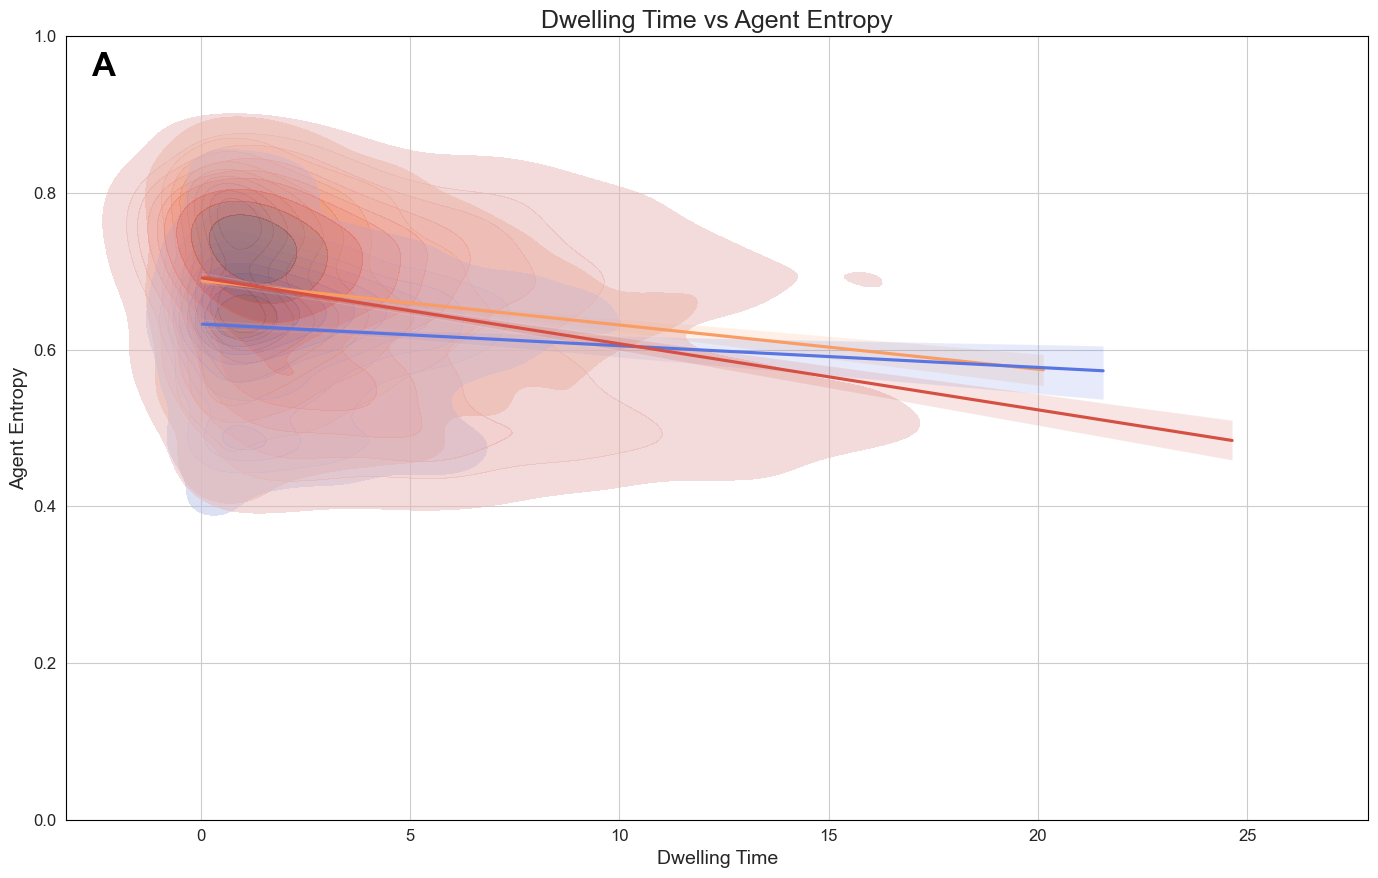

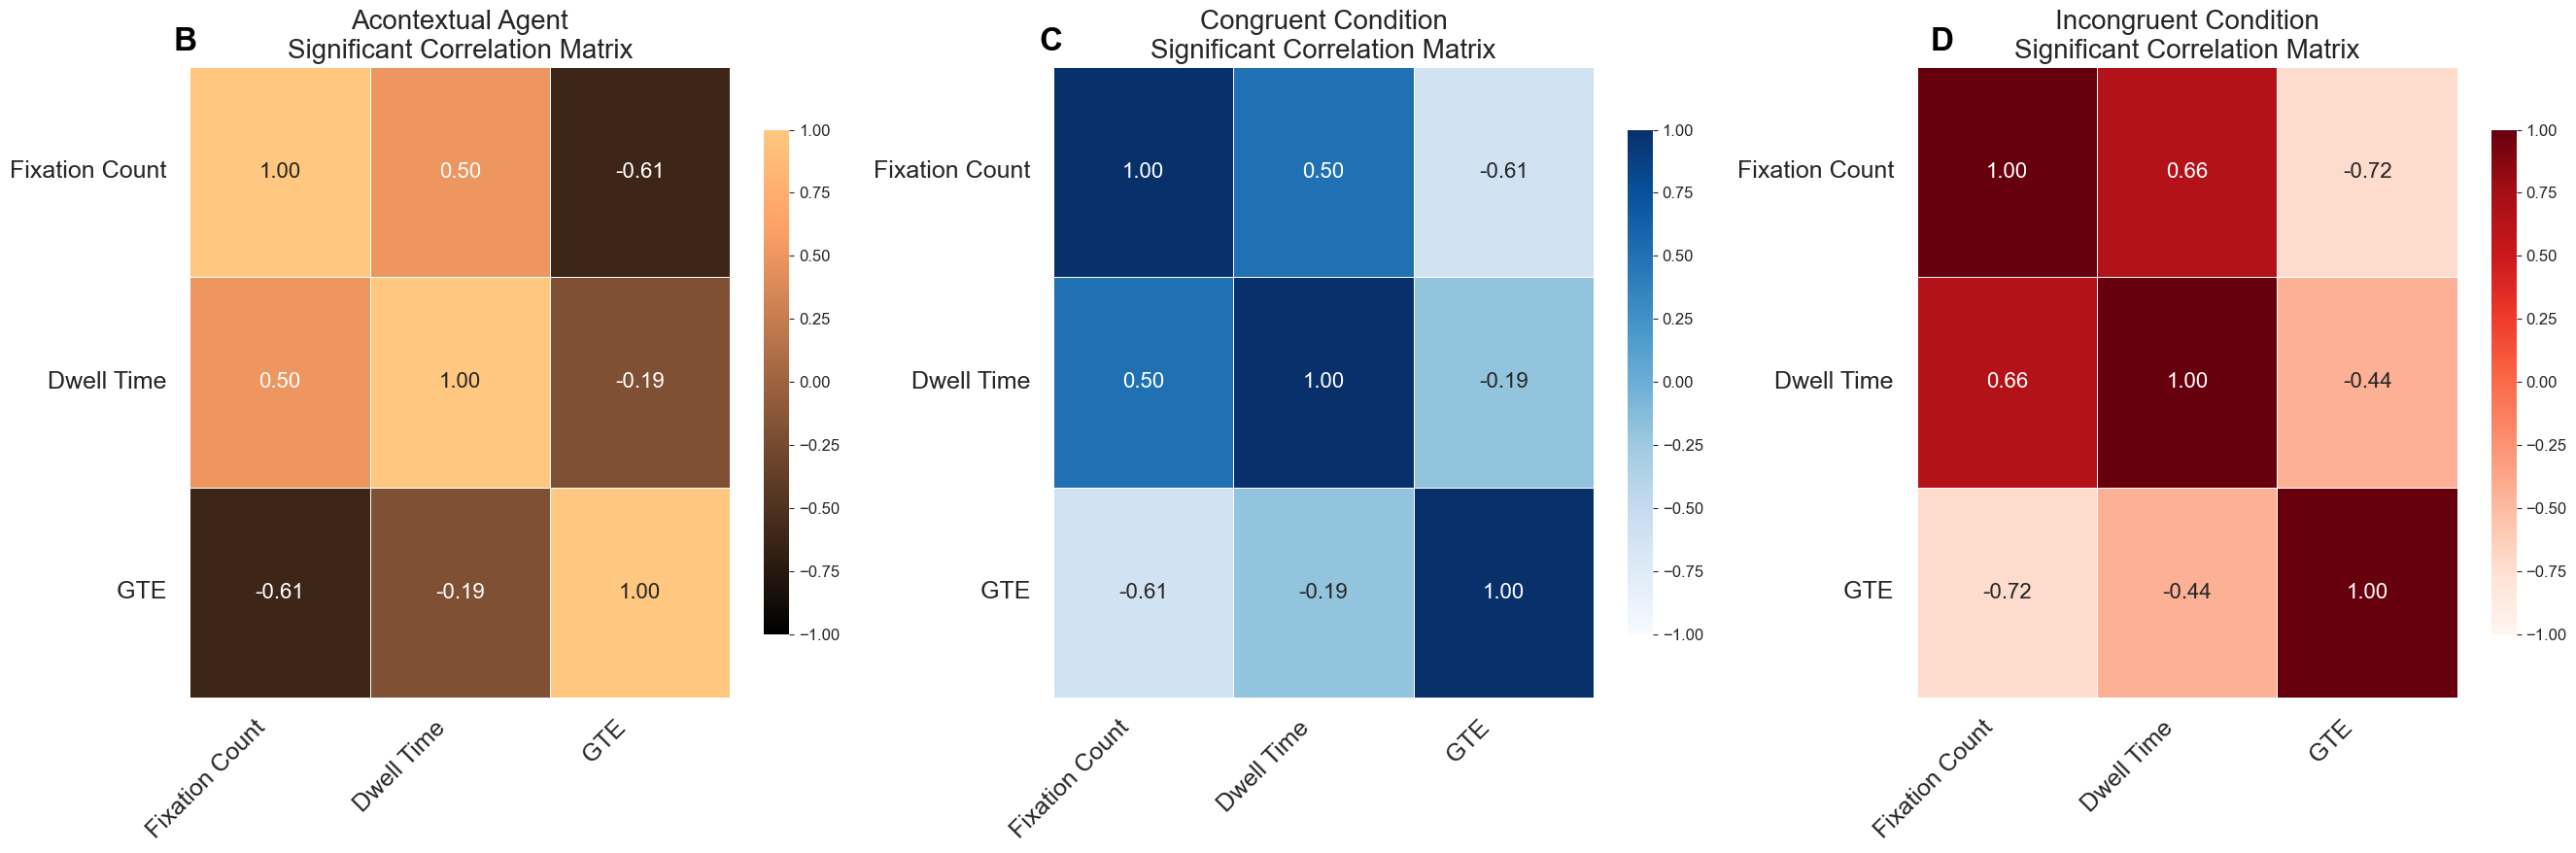

In [65]:
import matplotlib.cm as cm
# Get an orange-like color from the copper colormap
copper_palette = cm.get_cmap('copper', 20)
orange_from_copper = copper_palette(15)  # 12/20 gives a warm coppery orange

# Define color palette
coolwarm_palette = sns.color_palette("coolwarm", 20)
custom_palette = {
    "Acontextual": orange_from_copper,    
    "Congruent": coolwarm_palette[1],
    "Incongruent": coolwarm_palette[18]
}


unique_agents = ["Acontextual", "Congruent", "Incongruent"]
sns.set_style("whitegrid")

# ------------------- CREATE BASE FIGURE -------------------
fig, ax = plt.subplots(figsize=(14, 9))  # Standard size, centered plot

# ------------------- TOP PLOT (KDE + Regression) -------------------
for agent in unique_agents:
    subset = Complete_Long[(Complete_Long['Agent_type'] == agent) & (Complete_Long['Entropy'] <= 1.0)]
    
    # KDE Plot
    sns.kdeplot(
        data=subset,
        x="Dwelling_Time",
        y="Entropy",
        fill=True,
        alpha=0.5,
        color=custom_palette[agent],
        ax=ax
    )
    
    # Regression Line
    sns.regplot(
        data=subset,
        x="Dwelling_Time",
        y="Entropy",
        scatter=False,
        color=custom_palette[agent],
        ax=ax
    )

# Set Y-axis limit
ax.set_ylim(0, 1)

# Titles and Labels
ax.set_title("Dwelling Time vs Agent Entropy", fontsize=18)
ax.set_xlabel("Dwelling Time", fontsize=14)
ax.set_ylabel("Agent Entropy", fontsize=14)
ax.text(0.02, 0.95, "A", transform=ax.transAxes, fontsize=24, fontweight="bold", color="black")

# Custom Spines for cleaner look
for spine in ax.spines.values():
    spine.set_color('black')

# Ensure proper centering
plt.tight_layout()

plt.show()



# Calculate correlation matrices
corr_matrix_contextual = calculate_significant_correlations(filtered_active_congruent_data)
corr_matrix_congruent = calculate_significant_correlations(filtered_active_congruent_data)
corr_matrix_incongruent = calculate_significant_correlations(filtered_active_incongruent_data)

# Create subplots for correlation matrices
fig, axes = plt.subplots(1, 3, figsize=(27, 9))

# Contextual Condition (A)
corr_matrix_contextual = reorder_matrix(corr_matrix_contextual)
sns.heatmap(
    corr_matrix_contextual, 
    annot=True, 
    annot_kws={"size": 16},
    cmap='copper', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_contextual.isnull(), 
    ax=axes[0]
)
axes[0].set_title('Acontextual Agent\nSignificant Correlation Matrix', fontsize=20)
axes[0].set_xticklabels(format_ticks(axes[0].get_xticklabels()), rotation=45, ha='right', fontsize=18)
axes[0].set_yticklabels(format_ticks(axes[0].get_yticklabels()), rotation=0, fontsize=18)

# Congruent Condition (B)
corr_matrix_congruent = reorder_matrix(corr_matrix_congruent)
sns.heatmap(
    corr_matrix_congruent, 
    annot=True, 
    annot_kws={"size": 16},
    cmap='Blues', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_congruent.isnull(), 
    ax=axes[1]
)
axes[1].set_title('Congruent Condition\nSignificant Correlation Matrix', fontsize=20)
axes[1].set_xticklabels(format_ticks(axes[1].get_xticklabels()), rotation=45, ha='right', fontsize=18)
axes[1].set_yticklabels(format_ticks(axes[1].get_yticklabels()), rotation=0, fontsize=18)

# Incongruent Condition (C)
corr_matrix_incongruent = reorder_matrix(corr_matrix_incongruent)
sns.heatmap(
    corr_matrix_incongruent, 
    annot=True, 
    annot_kws={"size": 16},
    cmap='Reds', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    center=0,
    cbar_kws={'shrink': 0.8}, 
    linewidths=0.5, 
    mask=corr_matrix_incongruent.isnull(), 
    ax=axes[2]
)
axes[2].set_title('Incongruent Condition\nSignificant Correlation Matrix', fontsize=20)
axes[2].set_xticklabels(format_ticks(axes[2].get_xticklabels()), rotation=45, ha='right', fontsize=18)
axes[2].set_yticklabels(format_ticks(axes[2].get_yticklabels()), rotation=0, fontsize=18)
fig.text(0.07, 0.93, "B", fontsize=24, fontweight="bold", color="black")  # First correlation matrix
fig.text(0.40, 0.93, "C", fontsize=24, fontweight="bold", color="black")  # Second correlation matrix
fig.text(0.74, 0.93, "D", fontsize=24, fontweight="bold", color="black")  # Third correlation matrix

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("Compiled_Plot_Centered.png", dpi=600, bbox_inches="tight")

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/3850886550.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  copper_palette = cm.get_cmap('copper', 20)


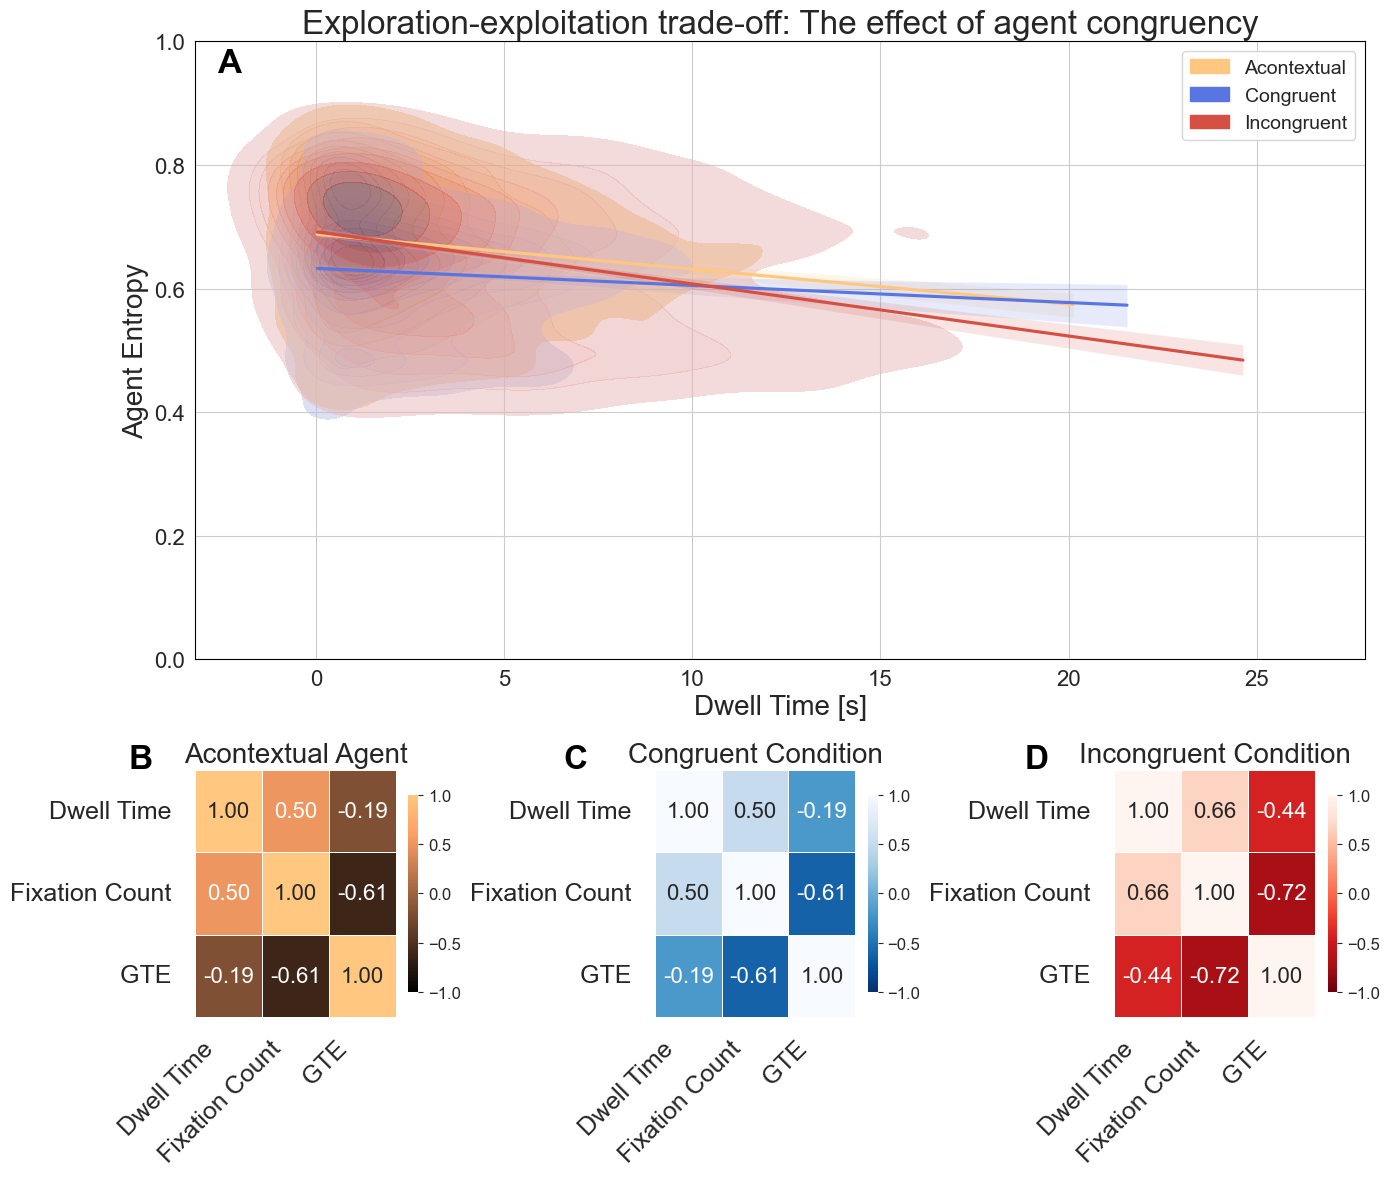

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches  # <-- Import for legend proxy artists
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.gridspec as gridspec

#Get an orange-like color from the copper colormap
copper_palette = cm.get_cmap('copper', 20)
orange_from_copper = copper_palette(20)  # 12/20 gives a warm coppery orange

# ------------------- DEFINE COLOR PALETTE -------------------
coolwarm_palette = sns.color_palette("coolwarm", 20)
bone_palette = sns.color_palette("bone", 20)
custom_palette = {
    "Acontextual":orange_from_copper,  # Previously "Passive"
    "Congruent": coolwarm_palette[1],
    "Incongruent": coolwarm_palette[18]
}

unique_agents = ["Acontextual", "Congruent", "Incongruent"]
sns.set_style("whitegrid")

# ------------------- CREATE SINGLE FIGURE WITH GRID SPEC -------------------
fig = plt.figure(figsize=(14, 12))  # Reduced width to remove extra space
gs = gridspec.GridSpec(2, 3, height_ratios=[1.5, 0.6])  # Removed unnecessary width adjustments

# ------------------- TOP PLOT (KDE + Regression) -------------------
ax1 = plt.subplot(gs[0, :])  # Now spans all 3 columns (NO extra blank subplot)

for agent in unique_agents:
    subset = Complete_Long[(Complete_Long['Agent_type'] == agent) & (Complete_Long['Entropy'] <= 1.0)]
    
    # KDE Plot
    sns.kdeplot(
        data=subset,
        x="Dwelling_Time",
        y="Entropy",
        fill=True,
        alpha=0.5,
        color=custom_palette[agent],
        ax=ax1
    )
    
    # Regression Line
    sns.regplot(
        data=subset,
        x="Dwelling_Time",
        y="Entropy",
        scatter=False,
        color=custom_palette[agent],
        ax=ax1
    )

# Set Y-axis limit
ax1.set_ylim(0, 1)

# Titles and Labels
ax1.set_title("Exploration-exploitation trade-off: The effect of agent congruency", fontsize=24)
ax1.set_xlabel("Dwell Time [s]", fontsize=20)
ax1.set_ylabel("Agent Entropy", fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=16)  # Increases tick labels


# Custom Spines for cleaner look
for spine in ax1.spines.values():
    spine.set_color('black')

# Add annotation for the top plot
ax1.text(0.02, 0.95, "A", transform=ax1.transAxes, fontsize=24, fontweight="bold", color="black")

# ------------------- FIX: MANUALLY CREATE LEGEND -------------------
legend_patches = [
    mpatches.Patch(color=custom_palette["Acontextual"], label="Acontextual"),
    mpatches.Patch(color=custom_palette["Congruent"], label="Congruent"),
    mpatches.Patch(color=custom_palette["Incongruent"], label="Incongruent")
]

ax1.legend(handles=legend_patches, loc="upper right", fontsize=14, frameon=True)

# ------------------- BOTTOM PLOTS (Correlation Matrices) -------------------
axes = [plt.subplot(gs[1, i]) for i in range(3)]  # Create three subplots

# Updated colormaps: Using `bone_r` instead of `copper_r`
colormaps = ["copper", "Blues_r", "Reds_r"]  # Gray-beige, Blue, Red

for i, (corr_matrix, title, cmap) in enumerate(zip(
    [corr_matrix_contextual, corr_matrix_congruent, corr_matrix_incongruent],
    ['Acontextual Agent', 
     'Congruent Condition', 
     'Incongruent Condition'],
    colormaps)):

    sns.heatmap(
        reorder_matrix(corr_matrix), 
        annot=True, 
        annot_kws={"size": 16},
        cmap=cmap,  
        fmt='.2f', 
        vmin=-1, 
        vmax=1, 
        center=0,
        cbar_kws={'shrink': 0.8}, 
        linewidths=0.5, 
        mask=corr_matrix.isnull(), 
        ax=axes[i]
    )
    
    axes[i].set_title(title, fontsize=20)
    axes[i].set_xticklabels(format_ticks(axes[i].get_xticklabels()), rotation=45, ha='right', fontsize=18)
    axes[i].set_yticklabels(format_ticks(axes[i].get_yticklabels()), rotation=0, fontsize=18)

# Add annotations to each correlation matrix
fig.text(0.1, 0.35, "B", fontsize=24, fontweight="bold", color="black")  # First correlation matrix
fig.text(0.41, 0.35, "C", fontsize=24, fontweight="bold", color="black")  # Second correlation matrix
fig.text(0.74, 0.35, "D", fontsize=24, fontweight="bold", color="black")  # Third correlation matrix

# ------------------- ADJUST SPACING FOR BETTER VISUAL BALANCE -------------------
plt.subplots_adjust(hspace=0.6)  # Increase vertical spacing
plt.tight_layout()

# ------------------- SAVE THE ENTIRE FIGURE WITHOUT EXTRA SPACE -------------------
plt.savefig("Compiled_Plot_Centered.png", dpi=600, bbox_inches="tight", pad_inches=0.1)

plt.show()


In [67]:
corr_matrix_contextual

Fixation_Count_Active_Agent  \
Fixation_Count_Active_Agent                                   1.000000   
Dwelling_Time_Active_Agent                                    0.503679   
Chao_Shen_Transition_Entropy_Active_Agent                    -0.609706   

                                           Dwelling_Time_Active_Agent  \
Fixation_Count_Active_Agent                                  0.503679   
Dwelling_Time_Active_Agent                                   1.000000   
Chao_Shen_Transition_Entropy_Active_Agent                   -0.193520   

                                           Chao_Shen_Transition_Entropy_Active_Agent  
Fixation_Count_Active_Agent                                                -0.609706  
Dwelling_Time_Active_Agent                                                 -0.193520  
Chao_Shen_Transition_Entropy_Active_Agent                                   1.000000

In [68]:
corr_matrix_congruent

Fixation_Count_Active_Agent  \
Fixation_Count_Active_Agent                                   1.000000   
Dwelling_Time_Active_Agent                                    0.503679   
Chao_Shen_Transition_Entropy_Active_Agent                    -0.609706   

                                           Dwelling_Time_Active_Agent  \
Fixation_Count_Active_Agent                                  0.503679   
Dwelling_Time_Active_Agent                                   1.000000   
Chao_Shen_Transition_Entropy_Active_Agent                   -0.193520   

                                           Chao_Shen_Transition_Entropy_Active_Agent  
Fixation_Count_Active_Agent                                                -0.609706  
Dwelling_Time_Active_Agent                                                 -0.193520  
Chao_Shen_Transition_Entropy_Active_Agent                                   1.000000

In [69]:
corr_matrix_incongruent

Fixation_Count_Active_Agent  \
Fixation_Count_Active_Agent                                   1.000000   
Dwelling_Time_Active_Agent                                    0.659875   
Chao_Shen_Transition_Entropy_Active_Agent                    -0.723890   

                                           Dwelling_Time_Active_Agent  \
Fixation_Count_Active_Agent                                  0.659875   
Dwelling_Time_Active_Agent                                   1.000000   
Chao_Shen_Transition_Entropy_Active_Agent                   -0.436509   

                                           Chao_Shen_Transition_Entropy_Active_Agent  
Fixation_Count_Active_Agent                                                -0.723890  
Dwelling_Time_Active_Agent                                                 -0.436509  
Chao_Shen_Transition_Entropy_Active_Agent                                   1.000000

In [70]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import gaussian_kde

# Function to compute KDE and extract key statistics
def compute_kde_statistics(data, label):
    # Ensure there are enough unique values to compute KDE
    if len(np.unique(data)) < 2:
        return {
            "Condition": label,
            "Mode (Peak Density)": np.nan,
            "Centroid (Weighted Mean)": np.nan,
            "FWHM (Spread)": np.nan,
            "Skewness": np.nan,
            "Kurtosis": np.nan,
        }

    # Compute KDE
    kde = gaussian_kde(data)
    x_vals = np.linspace(min(data), max(data), 1000)  # Generate values for evaluation
    kde_vals = kde(x_vals)  # KDE estimated values

    # Find mode (peak density point)
    peak_idx = np.argmax(kde_vals)
    mode_value = x_vals[peak_idx]

    # Compute centroid (weighted mean of KDE function)
    centroid = np.sum(x_vals * kde_vals) / np.sum(kde_vals)

    # Compute Full Width at Half Maximum (FWHM)
    half_max = max(kde_vals) / 2
    peak_indices = np.where(kde_vals >= half_max)[0]
    fwhm = x_vals[peak_indices[-1]] - x_vals[peak_indices[0]]

    # Compute skewness and kurtosis
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)

    return {
        "Condition": label,
        "Mode (Peak Density)": mode_value,
        "Centroid (Weighted Mean)": centroid,
        "FWHM (Spread)": fwhm,
        "Skewness": skewness,
        "Kurtosis": kurtosis,
    }


In [71]:


# Function to compute KDE statistics per Agent Type for both Dwelling Time and Entropy
def compute_kde_stats_per_group(df, variable):
    kde_results = []
    
    for agent_type, data in df.groupby("Agent_type"):
        if len(data[variable]) > 1:  # Ensure KDE can be computed
            stats_result = compute_kde_statistics(data[variable], agent_type)
            kde_results.append(stats_result)

    return pd.DataFrame(kde_results)

# Compute KDE statistics for both Dwelling Time and Entropy
kde_dwelling_results = compute_kde_stats_per_group(Complete_Long, "Dwelling_Time")
kde_entropy_results = compute_kde_stats_per_group(Complete_Long, "Entropy")

# Display both KDE statistical summaries
display(name="KDE-Based Statistics: Dwelling Time", dataframe=kde_dwelling_results)
display(name="KDE-Based Statistics: Entropy", dataframe=kde_entropy_results)

# Output results
kde_dwelling_results, kde_entropy_results


(     Condition  Mode (Peak Density)  Centroid (Weighted Mean)  FWHM (Spread)  \
 0  Acontextual             0.757309                  2.552434       2.313026   
 1    Congruent             0.797307                  2.515217       2.691642   
 2  Incongruent             1.171265                  4.185082       3.816292   
 
    Skewness  Kurtosis  
 0  2.340738  7.195937  
 1  2.235202  9.451644  
 2  1.826767  3.881879  ,
      Condition  Mode (Peak Density)  Centroid (Weighted Mean)  FWHM (Spread)  \
 0  Acontextual             0.642928                  0.674024       0.227612   
 1    Congruent             0.637295                  0.626431       0.093667   
 2  Incongruent             0.735295                  0.660731       0.156231   
 
    Skewness  Kurtosis  
 0 -0.392797 -0.057851  
 1 -0.346431  0.939525  
 2 -0.380817 -0.040627  )

In [72]:
# Stack the two datasets on top of each other (concatenate rows)
# Rename columns
Fixations_BuildingTask.rename(columns={"SubjectID": "ParticipantID", "Session": "SessionNr"}, inplace=True)
stacked_dwell_Time = pd.concat([Fixations_Agent, Fixations_BuildingTask], ignore_index=True)

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/1963563656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fixations_BuildingTask.rename(columns={"SubjectID": "ParticipantID", "Session": "SessionNr"}, inplace=True)


In [73]:
stacked_dwell_Time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20328 entries, 0 to 20327
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Experiment             20328 non-null  int64  
 1   ParticipantID          20328 non-null  object 
 2   SessionNr              20328 non-null  object 
 3   recoded                20328 non-null  object 
 4   Collider_CategoricalN  20328 non-null  object 
 5   Dwelling_Time          20328 non-null  float64
 6   Fixation_Count         20328 non-null  int64  
 7   Agent_type             20328 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [74]:
# Save the stacked dataset
stacked_dwell_Time.to_csv("/Volumes/TwoTeras/Resources/Bayes_stacked_dwell_Time.csv", index=False)

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/2904574349.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34974/2904574349.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


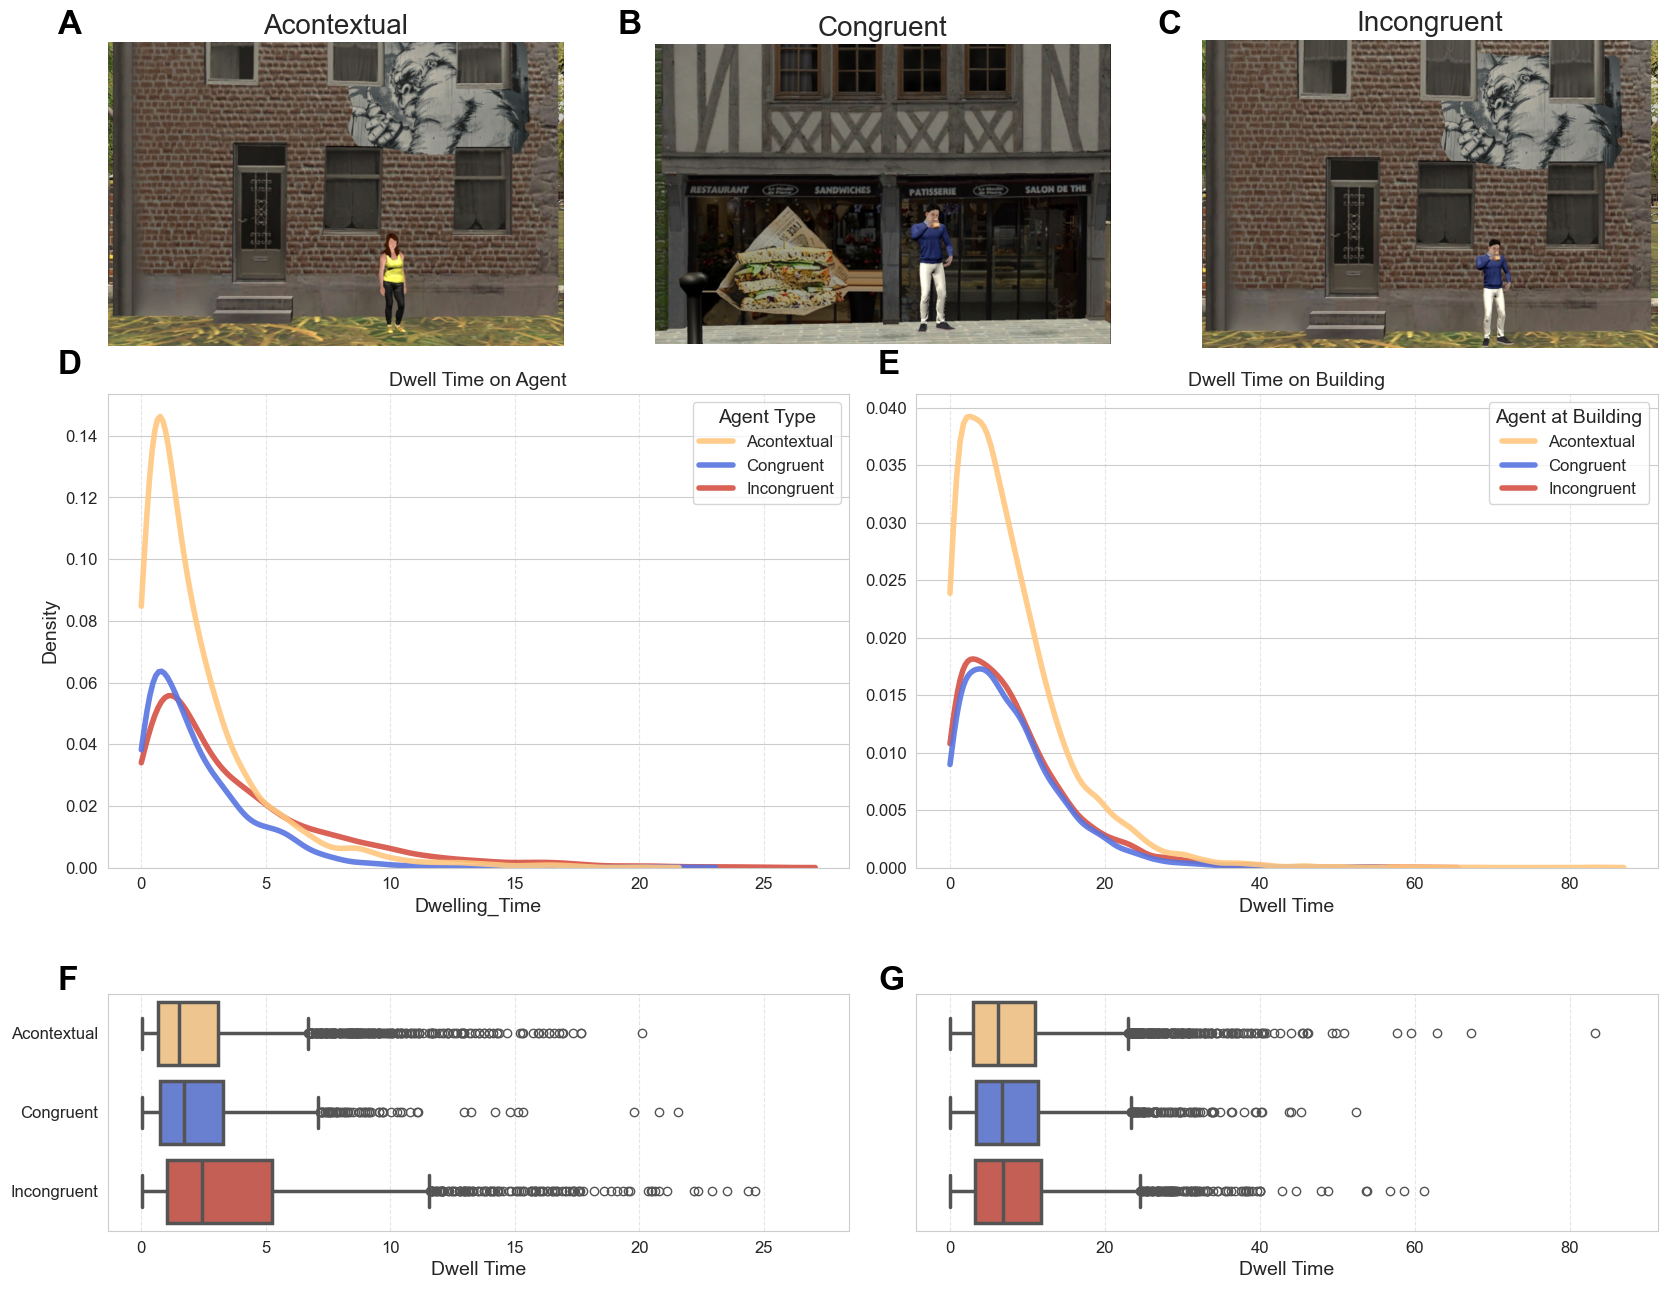

In [75]:

sns.set_style("whitegrid")
# Load images
image1 = Image.open("/Volumes/TwoTeras/Resources/29_Passive.jpg")
image2 = Image.open("/Volumes/TwoTeras/Resources/06_Congruent.jpg")
image3 = Image.open("/Volumes/TwoTeras/Resources/06_Incongruent.jpg")

# Resize images (optional)
scale_factor = 1  
image1 = image1.resize((image1.width * scale_factor, image1.height * scale_factor))
image2 = image2.resize((image2.width * scale_factor, image2.height * scale_factor))
image3 = image3.resize((image3.width * scale_factor, image3.height * scale_factor))

# Align all images to the same height
image2 = image2.resize((int(image2.width * image1.height / image2.height), image1.height))
image3 = image3.resize((int(image3.width * image1.height / image3.height), image1.height))


# Recode "Passive" to "Acontextual" in the datasets
Fixations_Agent.loc[:, "Agent_type"] = Fixations_Agent["Agent_type"].replace("Passive", "Acontextual")
Fixations_BuildingTask.loc[:,"Agent_type"] = Fixations_BuildingTask["Agent_type"].replace("Passive", "Acontextual")

# Update categorical order
order = ["Acontextual", "Congruent", "Incongruent"]
# Extract colors from 'coolwarm' palette
coolwarm_palette = sns.color_palette("coolwarm", 20)
custom_palette = {
    "Acontextual": orange_from_copper,    
    "Congruent": coolwarm_palette[1],  
    "Incongruent": coolwarm_palette[18] 
}


# Create figure layout
fig = plt.figure(figsize=(20, 20))

# First grid: Images
gs_top = fig.add_gridspec(1, 3, height_ratios=[3], top=0.8, bottom=0.6)

ax_img1 = fig.add_subplot(gs_top[0, 0])
ax_img1.imshow(image1)  
ax_img1.axis("off")
ax_img1.set_title("Acontextual", fontsize=20)

ax_img2 = fig.add_subplot(gs_top[0, 1])
ax_img2.imshow(image2)  
ax_img2.axis("off")
ax_img2.set_title("Congruent", fontsize=20)

ax_img3 = fig.add_subplot(gs_top[0, 2])
ax_img3.imshow(image3)  
ax_img3.axis("off")
ax_img3.set_title("Incongruent", fontsize=20)

plt.subplots_adjust(hspace=0.4)

# Second grid: KDE and Box Plots
gs_bottom = fig.add_gridspec(3, 4, height_ratios=[1.5, 0.75, 0.75], top=0.6, bottom=0)

# KDE plots
ax_kde_agents = fig.add_subplot(gs_bottom[0, 0:2])
sns.kdeplot(
    data=Fixations_Agent,
    x="Dwelling_Time",
    hue="Agent_type",
    ax=ax_kde_agents,
    clip=(0, None),
    alpha=0.9,
    palette=custom_palette,
    linewidth=4,
    hue_order=order  
)
ax_kde_agents.set_title("Dwell Time on Agent", fontsize=14)
ax_kde_agents.set_ylabel("Density")
ax_kde_agents.grid(axis='x', linestyle='--', alpha=0.5)


ax_kde_buildings = fig.add_subplot(gs_bottom[0, 2:4])
sns.kdeplot(
    data=Fixations_BuildingTask,
    x="Dwelling_Time",
    hue="Agent_type",
    ax=ax_kde_buildings,
    clip=(0, None),
    alpha=0.9,
    palette=custom_palette,
    linewidth=4,
    hue_order=order  
)
ax_kde_buildings.set_title("Dwell Time on Building", fontsize=14)
ax_kde_buildings.set_ylabel("")
ax_kde_buildings.set_xlabel("Dwell Time")
ax_kde_buildings.grid(axis='x', linestyle='--', alpha=0.5)



# Box plots
ax_box_agents = fig.add_subplot(gs_bottom[1, 0:2], sharex=ax_kde_agents)
sns.boxplot(
    data=Fixations_Agent,
    x="Dwelling_Time",
    y="Agent_type",
    ax=ax_box_agents,
    orient="h",
    linewidth=2.5,
    palette=custom_palette,
    order=order  
)
ax_box_agents.set_xlabel("Dwell Time")
ax_box_agents.grid(axis='x', linestyle='--', alpha=0.5)
ax_box_agents.set_ylabel(None)



ax_box_buildings = fig.add_subplot(gs_bottom[1, 2:4], sharex=ax_kde_buildings)
sns.boxplot(
    data=Fixations_BuildingTask,
    x="Dwelling_Time",
    y="Agent_type",
    ax=ax_box_buildings,
    linewidth=2.5,
    orient="h",
    palette=custom_palette,
    order=order  
)
ax_box_buildings.set_xlabel("Dwell Time")
ax_box_buildings.tick_params(labelleft=False, left=False)
ax_box_buildings.set_ylabel(None)
ax_box_buildings.grid(axis='x', linestyle='--', alpha=0.5)

# Change legend title using `legend_`
if ax_kde_agents.legend_:
    ax_kde_agents.legend_.set_title("Agent Type")

# Change legend title using `legend_`
if ax_kde_buildings.legend_:
    ax_kde_buildings.legend_.set_title("Agent at Building")


# Add annotations (A-G)
fig.text(0.10, 0.78, "A", fontsize=24, fontweight="bold", color="black")
fig.text(0.38, 0.78, "B", fontsize=24, fontweight="bold", color="black")
fig.text(0.65, 0.78, "C", fontsize=24, fontweight="bold", color="black")
fig.text(0.10, 0.61, "D", fontsize=24, fontweight="bold", color="black")
fig.text(0.5102, 0.61, "E", fontsize=24, fontweight="bold", color="black")
fig.text(0.10, 0.302, "F", fontsize=24, fontweight="bold", color="black")
fig.text(0.5102, 0.302, "G", fontsize=24, fontweight="bold", color="black")

# Adjust layout and save
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Methods_Entropy.png", dpi=900, bbox_inches="tight")
plt.show()


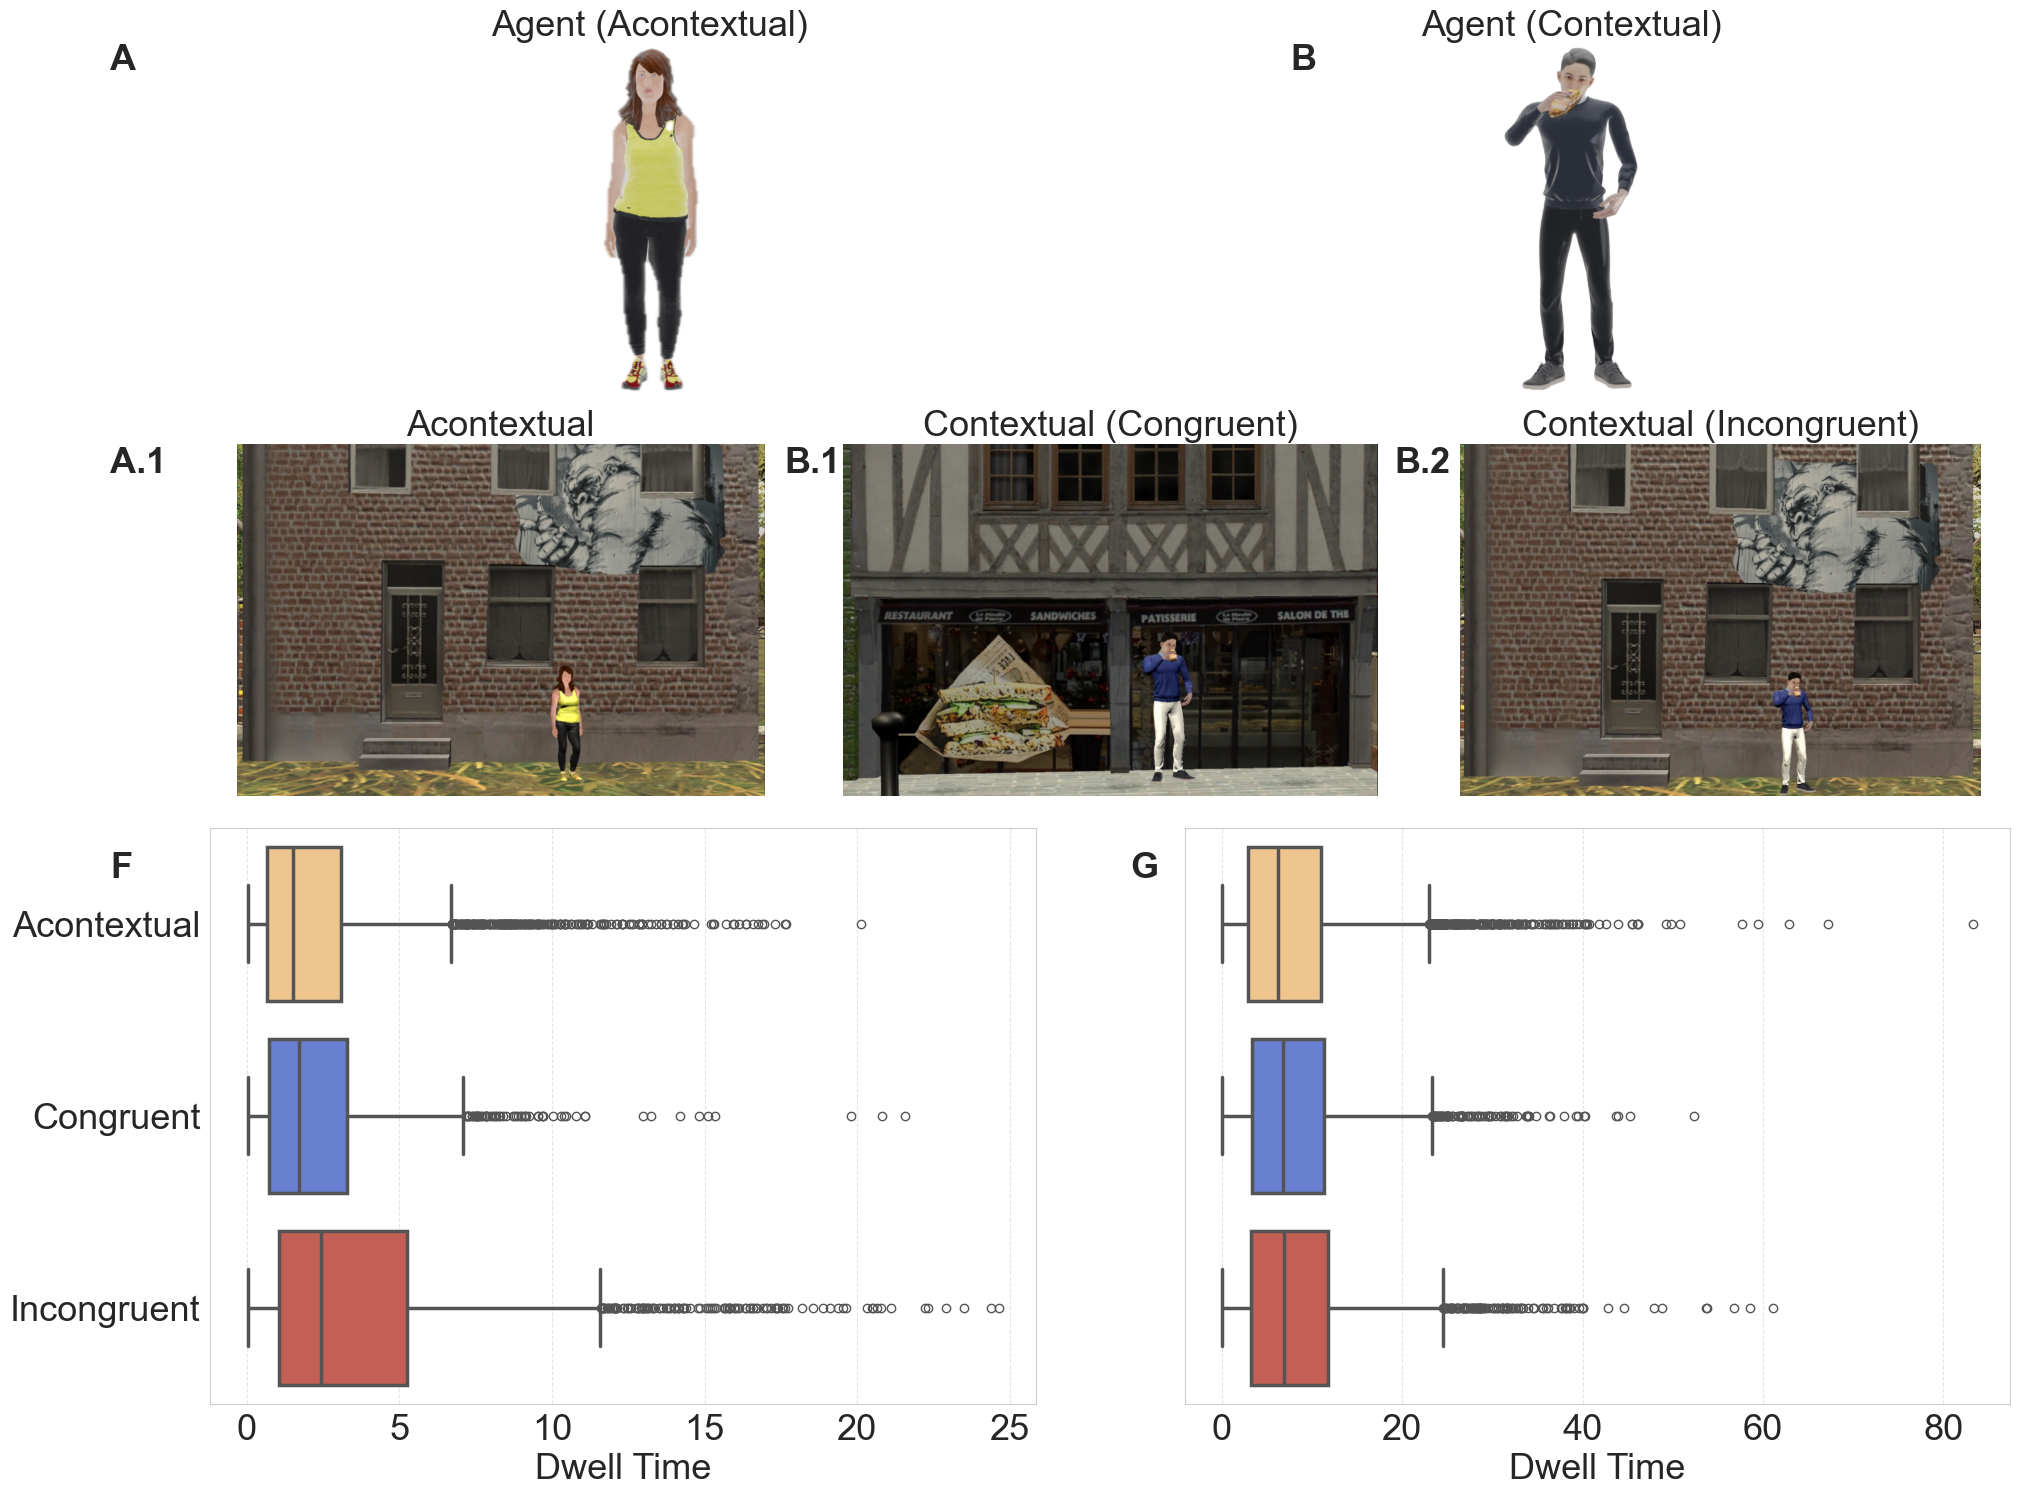

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid")

# ---------- Load images ----------
img_standing    = Image.open("/Volumes/TwoTeras/Resources/Agent_Standing.png")
img_sandwich    = Image.open("/Volumes/TwoTeras/Resources/Agent_Sandwich.png")
img_congruent   = Image.open("/Volumes/TwoTeras/Resources/06_Congruent.jpg")
img_acontextual = Image.open("/Volumes/TwoTeras/Resources/29_Passive.jpg")
img_incongruent = Image.open("/Volumes/TwoTeras/Resources/06_Incongruent.jpg")

# ---------- Data prep (no SettingWithCopyWarning) ----------
Fixations_Agent = Fixations_Agent.copy()
Fixations_BuildingTask = Fixations_BuildingTask.copy()
Fixations_Agent.loc[:, "Agent_type"] = Fixations_Agent["Agent_type"].replace({"Passive": "Acontextual"})
Fixations_BuildingTask.loc[:, "Agent_type"] = Fixations_BuildingTask["Agent_type"].replace({"Passive": "Acontextual"})
order = ["Acontextual", "Congruent", "Incongruent"]

coolwarm_palette = sns.color_palette("coolwarm", 20)
custom_palette = {
    "Acontextual": orange_from_copper,
    "Congruent": coolwarm_palette[1],
    "Incongruent": coolwarm_palette[18]
}

# ---------- Figure (manual bands you can tweak) ----------
fig = plt.figure(figsize=(20, 16))

# Adjustable vertical bands (fractions of figure height)
AV_TOP, AV_BOTTOM = 0.95, 0.73   # avatars row
SC_TOP, SC_BOTTOM = 0.70, 0.48   # scenes row
BP_TOP, BP_BOTTOM = 0.46, 0.10   # boxplots row
LEFT, RIGHT = 0.06, 0.96

# ----- Row 1: Avatars (2 columns) -----
gs_av = fig.add_gridspec(1, 2, left=LEFT, right=RIGHT, top=AV_TOP, bottom=AV_BOTTOM, wspace=0.05)
ax_A = fig.add_subplot(gs_av[0, 0])  # A = Standing
ax_B = fig.add_subplot(gs_av[0, 1])  # B = Sandwich
ax_A.imshow(img_standing); ax_A.axis("off"); ax_A.set_title("Agent (Acontextual)", fontsize=26, pad=6)
ax_B.imshow(img_sandwich); ax_B.axis("off"); ax_B.set_title("Agent (Contextual)", fontsize=26, pad=6)

# ----- Row 2: Scenes (3 columns) -----
# NEW ORDER: A.1 (Acontextual), B.1 (Congruent), B.2 (Incongruent)
gs_sc = fig.add_gridspec(1, 3, left=LEFT, right=RIGHT, top=SC_TOP, bottom=SC_BOTTOM, wspace=0.05)

ax_A1 = fig.add_subplot(gs_sc[0, 0])  # A.1 = Acontextual
ax_B1 = fig.add_subplot(gs_sc[0, 1])  # B.1 = Congruent
ax_B2 = fig.add_subplot(gs_sc[0, 2])  # B.2 = Incongruent

ax_A1.imshow(img_acontextual); ax_A1.axis("off"); ax_A1.set_title("Acontextual", fontsize=26, pad=6)
ax_B1.imshow(img_congruent);   ax_B1.axis("off"); ax_B1.set_title("Contextual (Congruent)", fontsize=26, pad=6)
ax_B2.imshow(img_incongruent); ax_B2.axis("off"); ax_B2.set_title("Contextual (Incongruent)", fontsize=26, pad=6)

# ----- Row 3: Boxplots (2 columns) -----
gs_bp = fig.add_gridspec(1, 2, left=LEFT, right=RIGHT, top=BP_TOP, bottom=BP_BOTTOM, wspace=0.18)
ax_F = fig.add_subplot(gs_bp[0, 0])
ax_G = fig.add_subplot(gs_bp[0, 1])

# seaborn >=0.14 future-proofing: pass hue=y and legend=False
sns.boxplot(
    data=Fixations_Agent,
    x="Dwelling_Time", y="Agent_type",
    hue="Agent_type", legend=False, dodge=False,
    ax=ax_F, orient="h", linewidth=2.5,
    palette=custom_palette, order=order
)
ax_F.set_xlabel("Dwell Time"); ax_F.set_ylabel(None)
ax_F.grid(axis='x', linestyle='--', alpha=0.5)

sns.boxplot(
    data=Fixations_BuildingTask,
    x="Dwelling_Time", y="Agent_type",
    hue="Agent_type", legend=False, dodge=False,
    ax=ax_G, orient="h", linewidth=2.5,
    palette=custom_palette, order=order
)
ax_G.set_xlabel("Dwell Time"); ax_G.set_ylabel(None)
ax_G.tick_params(labelleft=False, left=False)
ax_G.grid(axis='x', linestyle='--', alpha=0.5)

# ---------- Adjust tick label font sizes ----------
ax_F.tick_params(axis='both', labelsize=26)
ax_G.tick_params(axis='both', labelsize=26)
ax_F.set_xlabel("Dwell Time", fontsize=26)
ax_G.set_xlabel("Dwell Time", fontsize=26)


# ---------- MANUAL panel labels (edit these numbers freely) ----------
# (x, y) are figure fractions; start points for easy nudging
labels = {
    "A":   (0.01, AV_TOP),     # Standing
    "B":   (0.6, AV_TOP),     # Sandwich
    "A.1": (0.01, SC_TOP - 0.0018),    # Acontextual (left)
    "B.1": (0.347, SC_TOP - 0.0018),    # Congruent  (middle)
    "B.2": (0.652, SC_TOP - 0.0018),    # Incongruent (right)
    "F":   (0.01, BP_TOP - 0.015),
    "G":   (0.520, BP_TOP - 0.015),
}
for txt, (x, y) in labels.items():
    fig.text(x, y, txt, fontsize=26, fontweight="bold", ha="left", va="top")

# Save
plt.savefig("/Volumes/TwoTeras/Entropy_Paper/Raw_Entropy_Figures/Fig_4.png",
            dpi=300, bbox_inches="tight", pad_inches=0.02)
plt.show()


In [77]:
# Compute descriptive statistics for each agent type
grouped_stats = Fixations_BuildingTask.groupby("Agent_type").agg(
    Mean_Dwelling_Time=("Dwelling_Time", "mean"),
    Std_Dwelling_Time=("Dwelling_Time", "std"),
    Mean_Fixation_Count=("Fixation_Count", "mean"),
    Std_Fixation_Count=("Fixation_Count", "std"),
    Count=("Agent_type", "count")
).reset_index()
grouped_stats

Agent_type  Mean_Dwelling_Time  Std_Dwelling_Time  Mean_Fixation_Count  \
0  Acontextual            7.976904           7.075343            14.723424   
1    Congruent            8.197979           6.543144            14.898247   
2  Incongruent            8.486690           7.316073            15.162798   

   Std_Fixation_Count  Count  
0           14.731835   6331  
1           14.176330   2909  
2           15.347236   3188

In [78]:
# Compute descriptive statistics for each agent type
grouped_stats = Fixations_Agent.groupby("Agent_type").agg(
    Mean_Dwelling_Time=("Dwelling_Time", "mean"),
    Std_Dwelling_Time=("Dwelling_Time", "std"),
    Mean_Fixation_Count=("Fixation_Count", "mean"),
    Std_Fixation_Count=("Fixation_Count", "std"),
    Count=("Agent_type", "count")).reset_index()
grouped_stats

Agent_type  Mean_Dwelling_Time  Std_Dwelling_Time  Mean_Fixation_Count  \
0  Acontextual            2.360960           2.541978             5.185741   
1    Congruent            2.360201           2.258242             5.086740   
2  Incongruent            3.793548           3.830470             7.801187   

   Std_Fixation_Count  Count  
0            6.653353   3731  
1            7.532916   1810  
2           10.254269   2359

In [79]:
Fixations_BuildingTask.head()

Experiment  ParticipantID  SessionNr             recoded  \
20           1            365          1  BasketballCourt_58   
22           1            365          1     Construction_57   
25           1            365          1      TaskBuilding_1   
26           1            365          1     TaskBuilding_11   
27           1            365          1     TaskBuilding_12   

       Collider_CategoricalN  Dwelling_Time  Fixation_Count   Agent_type  
20       TaskBuilding_Public       0.688941               3    Congruent  
22       TaskBuilding_Public       0.424187               1    Congruent  
25  TaskBuilding_Residential       1.853551               8  Acontextual  
26       TaskBuilding_Public       1.726080               9    Congruent  
27  TaskBuilding_Residential       4.862224              25  Acontextual

In [80]:
Complete_Long.head()

Experiment_x ParticipantID SessionNr recoded Collider_CategoricalN  \
0             1          1754         1  03_Cma          Active_Agent   
1             1          1754         1  05_Cma          Active_Agent   
2             1          1754         1  07_Cma          Active_Agent   
3             1          1754         1  09_Cma          Active_Agent   
4             1          1754         1  10_Cma          Active_Agent   

   Dwelling_Time  Fixation_Count  Experiment_y  Condition  Entropy Agent_type  
0       0.113089               1  Experiment_1  Congruent  0.63864  Congruent  
1       0.819393               3  Experiment_1  Congruent  0.63864  Congruent  
2       0.100193               1  Experiment_1  Congruent  0.63864  Congruent  
3       3.028579              21  Experiment_1  Congruent  0.63864  Congruent  
4       0.875936               3  Experiment_1  Congruent  0.63864  Congruent

In [81]:
Complete_Long.head()

Experiment_x ParticipantID SessionNr recoded Collider_CategoricalN  \
0             1          1754         1  03_Cma          Active_Agent   
1             1          1754         1  05_Cma          Active_Agent   
2             1          1754         1  07_Cma          Active_Agent   
3             1          1754         1  09_Cma          Active_Agent   
4             1          1754         1  10_Cma          Active_Agent   

   Dwelling_Time  Fixation_Count  Experiment_y  Condition  Entropy Agent_type  
0       0.113089               1  Experiment_1  Congruent  0.63864  Congruent  
1       0.819393               3  Experiment_1  Congruent  0.63864  Congruent  
2       0.100193               1  Experiment_1  Congruent  0.63864  Congruent  
3       3.028579              21  Experiment_1  Congruent  0.63864  Congruent  
4       0.875936               3  Experiment_1  Congruent  0.63864  Congruent

In [82]:
Navigation = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv", sep =",")
Navigation_Explor = Navigation[Navigation.Strategy == "Explorative"]
Navigation_Explor_Agent = Navigation[(Navigation.Strategy == "Explorative") & (Navigation.Decision == "AgentAtChosen")]
Exploration = pd.DataFrame(Navigation_Explor.groupby(["ParticipantId", "Session"])["StrategyPerc"].mean())
Exploration.reset_index(inplace=True)
Exploration_Agent = pd.DataFrame(Navigation_Explor_Agent.groupby(["ParticipantId", "Session"])["StrategyPerc"].mean())
Exploration_Agent.reset_index(inplace=True)
Exploration_Complete = pd.merge(Exploration, Exploration_Agent, on=['ParticipantId', 'Session'])
Exploration_Complete.rename({"ParticipantId": 'ParticipantID', "Session": "SessionNr", "StrategyPerc_x": "Exploration_General", "StrategyPerc_y": "Exploration_Agent", }, axis=1, inplace=True)
Exploration_Complete['ParticipantID'] = Exploration_Complete['ParticipantID'].apply(lambda x: f"{int(x):04d}")
Exploration_Complete.head()

ParticipantID  SessionNr  Exploration_General  Exploration_Agent
0          0365          1                0.600               0.58
1          0365          2                0.575               0.48
2          0365          3                0.410               0.27
3          0365          4                0.440               0.34
4          0365          5                0.460               0.37

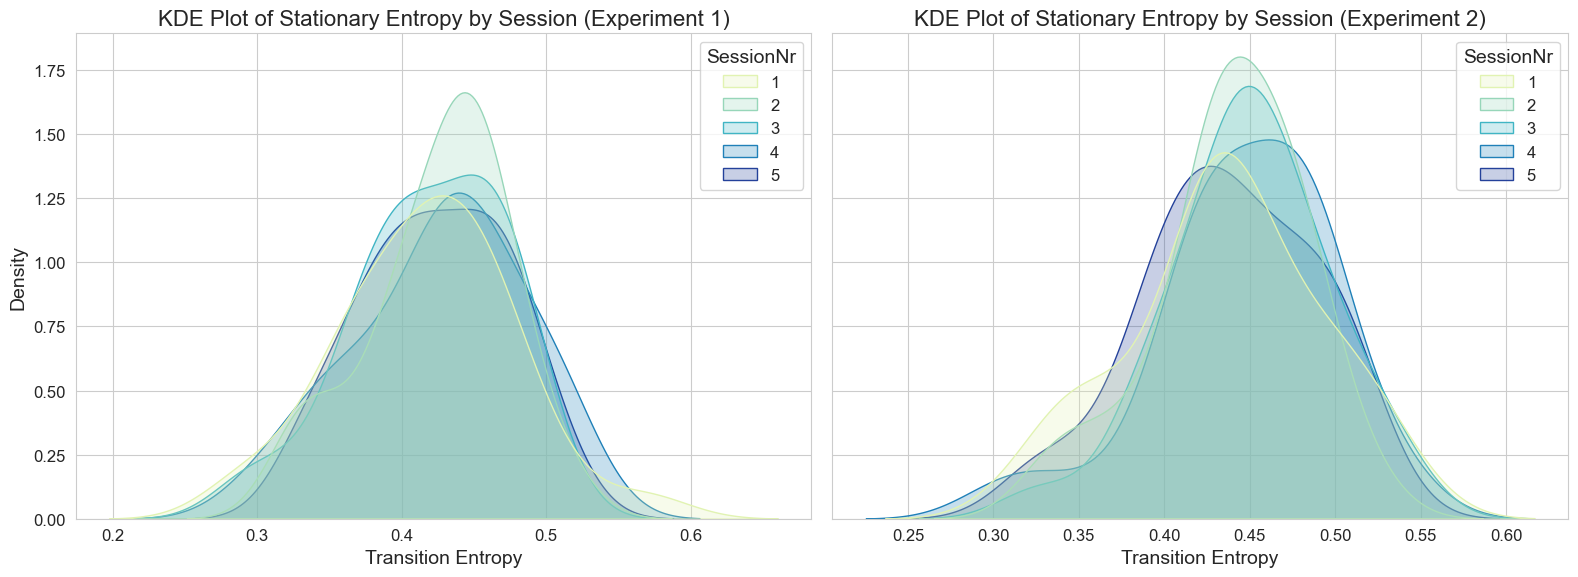

In [83]:
# Generate color lists from YlGnBu palette based on the number of unique sessions
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()
palette = sns.color_palette("YlGnBu", max(num_sessions_1, num_sessions_2))

# Create subplots for side-by-side KDE plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# KDE for Experiment 1
sns.kdeplot(data=data_1, x='Overall_Transition_Entropy', hue='SessionNr', fill=True, ax=axes[0],
            palette=palette[:num_sessions_1])
axes[0].set_title("KDE Plot of Stationary Entropy by Session (Experiment 1)")
axes[0].set_xlabel("Transition Entropy")
axes[0].set_ylabel("Density")

# KDE for Experiment 2
sns.kdeplot(data=data_2, x='Overall_Transition_Entropy', hue='SessionNr', fill=True, ax=axes[1],
            palette=palette[:num_sessions_2])
axes[1].set_title("KDE Plot of Stationary Entropy by Session (Experiment 2)")
axes[1].set_xlabel("Transition Entropy")

plt.tight_layout()
plt.show()


In [84]:
# Merging the dataframes on 'SubjectID' and 'SessionNr'
merged_df = pd.merge(stacked_df, Coverage, on=['ParticipantID', 'SessionNr'])
Exploration_Entropy = pd.merge(merged_df, Exploration_Complete, on=['ParticipantID', 'SessionNr']) 
Exploration_Entropy.head()

Overall_Transition_Entropy  Chao_Shen_Overall_Transition_Entropy  \
0                    0.418186                              0.418806   
1                    0.437667                              0.438649   
2                    0.476741                              0.477635   
3                    0.457486                              0.458469   
4                    0.418219                              0.418662   

   Transition_Entropy_Background  Transition_Entropy_Building  \
0                       0.409746                     0.421414   
1                       0.444608                     0.450309   
2                       0.456125                     0.462481   
3                       0.409551                     0.491682   
4                       0.354675                     0.488330   

   Transition_Entropy_TaskBuilding_Public  \
0                                0.408450   
1                                0.407788   
2                                0.597910   
3                                0.548347   
4                                0.625878   

   Transition_Entropy_TaskBuilding_Residential  \
0                                     0.450897   
1                                     0.429398   
2                                     0.537614   
3                                     0.584020   
4                                     0.584097   

   Transition_Entropy_Global_Landmark  Transition_Entropy_Passive_Agent  \
0                            0.375698                          0.394601   
1                            0.325598                          0.459708   
2                            0.518205                          0.513632   
3                            0.609962                          0.653258   
4                            0.725812                          0.636384   

   Transition_Entropy_Active_Agent  Chao_Shen_Transition_Entropy_Background  \
0                         0.638567                                 0.409753   
1                         0.643438                                 0.444626   
2                         0.585467                                 0.456369   
3                         0.619141                                 0.409558   
4                         0.641415                                 0.354705   

   ...  Stationary_Entropy_Active_Agent  ParticipantID  SessionNr  \
0  ...                         0.027955           1754          1   
1  ...                         0.013087           1754          2   
2  ...                         0.011026           1754          3   
3  ...                         0.012002           1754          4   
4  ...                         0.013794           1754          5   

   IndividualNodeCount  Experiment  CummulativeNodeCount  IndividualRatio  \
0                   85        Exp1                    85         0.537975   
1                   95        Exp1                   119         0.601266   
2                   90        Exp1                   130         0.569620   
3                  108        Exp1                   138         0.683544   
4                  109        Exp1                   138         0.689873   

   CummulativeRatio  Exploration_General  Exploration_Agent  
0          0.537975               0.7800               0.78  
1          0.753165               0.6025               0.55  
2          0.822785               0.5500               0.41  
3          0.873418               0.5425               0.47  
4          0.873418               0.4375               0.32  

[5 rows x 32 columns]

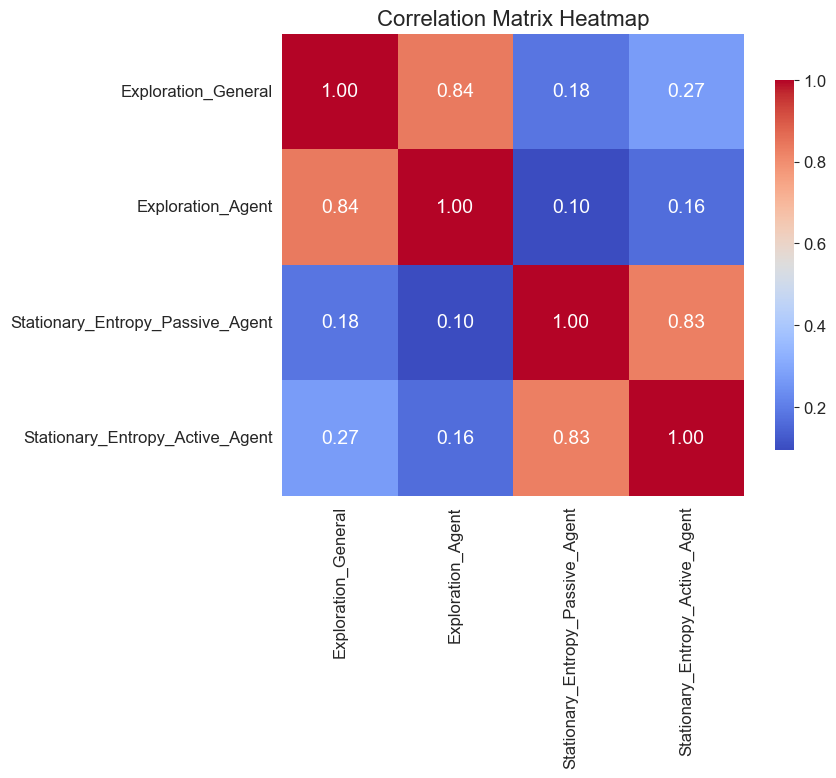

In [85]:
Corr = Exploration_Entropy[["Exploration_General", "Exploration_Agent", "Stationary_Entropy_Passive_Agent",  "Stationary_Entropy_Active_Agent"]].corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Corr, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .8}, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

<Axes: xlabel='Transition_Entropy_Active_Agent', ylabel='Exploration_Agent'>

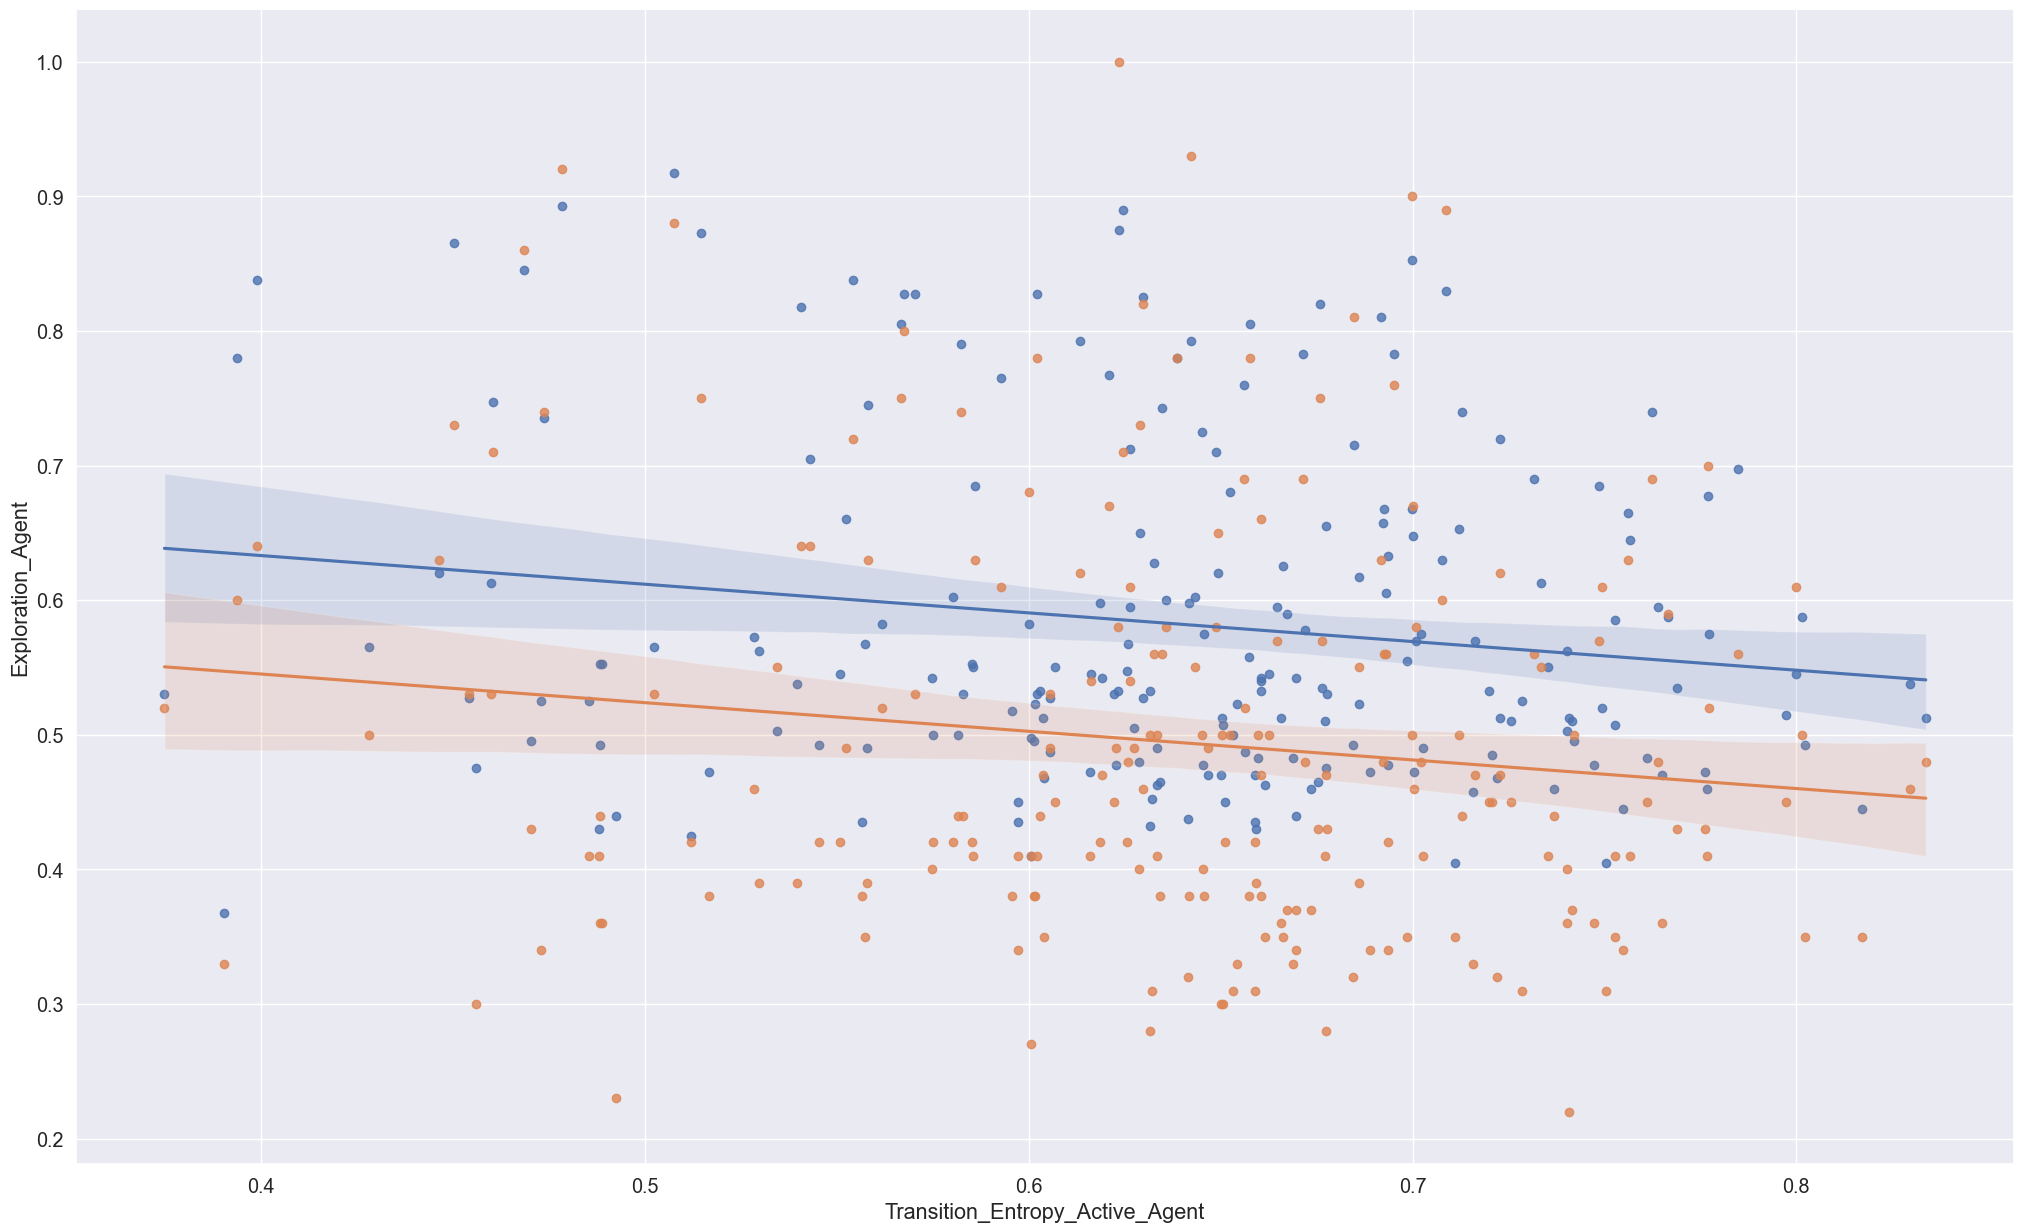

In [86]:
plt.figure(figsize=(25,15))
sns.set(font_scale = 1.3)
sns.regplot(x='Transition_Entropy_Active_Agent', y='Exploration_General',
                data=Exploration_Entropy)
sns.regplot(x='Transition_Entropy_Active_Agent', y='Exploration_Agent',
                data=Exploration_Entropy)

In [87]:
combined_data_fixations.head()

ParticipantID SessionNr  Experiment_x  Dwelling_Time_Active_Agent  \
0          1031         1             2                   17.497893   
1          1031         2             2                   29.773129   
2          1031         3             2                  100.392456   
3          1031         4             2                  135.231728   
4          1031         5             2                  183.140683   

   Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
0                     8.828815                          100   
1                    12.559337                           67   
2                    44.616875                          427   
3                    97.903888                          409   
4                    90.319340                          241   

   Fixation_Count_Passive_Agent  Overall_Transition_Entropy  \
0                            49                    0.435381   
1                            45                    0.423716   
2                           174                    0.473820   
3                           323                    0.493701   
4                           177                    0.425804   

   Chao_Shen_Overall_Transition_Entropy  Transition_Entropy_Background  ...  \
0                              0.436534                       0.376847  ...   
1                              0.424952                       0.357604  ...   
2                              0.474437                       0.419146  ...   
3                              0.494628                       0.420797  ...   
4                              0.426984                       0.350460  ...   

   Chao_Shen_Transition_Entropy_Active_Agent  Stationary_Entropy_Background  \
0                                   0.631360                       0.157609   
1                                   0.614289                       0.140636   
2                                   0.454146                       0.174113   
3                                   0.490335                       0.168952   
4                                   0.480003                       0.137788   

   Stationary_Entropy_Building  Stationary_Entropy_TaskBuilding_Public  \
0                     0.171964                                0.102136   
1                     0.165106                                0.079361   
2                     0.173092                                0.090841   
3                     0.158010                                0.090322   
4                     0.148921                                0.064772   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.078791   
1                                     0.081223   
2                                     0.099078   
3                                     0.085912   
4                                     0.080334   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.042008                          0.020865   
1                            0.028060                          0.020877   
2                            0.020765                          0.053666   
3                            0.023548                          0.089081   
4                            0.021573                          0.055375   

   Stationary_Entropy_Active_Agent  Experiment_y    Condition  
0                         0.037226  Experiment_2  Incongruent  
1                         0.028060  Experiment_2  Incongruent  
2                         0.097593  Experiment_2  Incongruent  
3                         0.100703  Experiment_2  Incongruent  
4                         0.068080  Experiment_2  Incongruent  

[5 rows x 32 columns]

In [88]:
combined_data_fixations.head()

ParticipantID SessionNr  Experiment_x  Dwelling_Time_Active_Agent  \
0          1031         1             2                   17.497893   
1          1031         2             2                   29.773129   
2          1031         3             2                  100.392456   
3          1031         4             2                  135.231728   
4          1031         5             2                  183.140683   

   Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
0                     8.828815                          100   
1                    12.559337                           67   
2                    44.616875                          427   
3                    97.903888                          409   
4                    90.319340                          241   

   Fixation_Count_Passive_Agent  Overall_Transition_Entropy  \
0                            49                    0.435381   
1                            45                    0.423716   
2                           174                    0.473820   
3                           323                    0.493701   
4                           177                    0.425804   

   Chao_Shen_Overall_Transition_Entropy  Transition_Entropy_Background  ...  \
0                              0.436534                       0.376847  ...   
1                              0.424952                       0.357604  ...   
2                              0.474437                       0.419146  ...   
3                              0.494628                       0.420797  ...   
4                              0.426984                       0.350460  ...   

   Chao_Shen_Transition_Entropy_Active_Agent  Stationary_Entropy_Background  \
0                                   0.631360                       0.157609   
1                                   0.614289                       0.140636   
2                                   0.454146                       0.174113   
3                                   0.490335                       0.168952   
4                                   0.480003                       0.137788   

   Stationary_Entropy_Building  Stationary_Entropy_TaskBuilding_Public  \
0                     0.171964                                0.102136   
1                     0.165106                                0.079361   
2                     0.173092                                0.090841   
3                     0.158010                                0.090322   
4                     0.148921                                0.064772   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.078791   
1                                     0.081223   
2                                     0.099078   
3                                     0.085912   
4                                     0.080334   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.042008                          0.020865   
1                            0.028060                          0.020877   
2                            0.020765                          0.053666   
3                            0.023548                          0.089081   
4                            0.021573                          0.055375   

   Stationary_Entropy_Active_Agent  Experiment_y    Condition  
0                         0.037226  Experiment_2  Incongruent  
1                         0.028060  Experiment_2  Incongruent  
2                         0.097593  Experiment_2  Incongruent  
3                         0.100703  Experiment_2  Incongruent  
4                         0.068080  Experiment_2  Incongruent  

[5 rows x 32 columns]

In [89]:
combined_data_fixations.head()

ParticipantID SessionNr  Experiment_x  Dwelling_Time_Active_Agent  \
0          1031         1             2                   17.497893   
1          1031         2             2                   29.773129   
2          1031         3             2                  100.392456   
3          1031         4             2                  135.231728   
4          1031         5             2                  183.140683   

   Dwelling_Time_Passive_Agent  Fixation_Count_Active_Agent  \
0                     8.828815                          100   
1                    12.559337                           67   
2                    44.616875                          427   
3                    97.903888                          409   
4                    90.319340                          241   

   Fixation_Count_Passive_Agent  Overall_Transition_Entropy  \
0                            49                    0.435381   
1                            45                    0.423716   
2                           174                    0.473820   
3                           323                    0.493701   
4                           177                    0.425804   

   Chao_Shen_Overall_Transition_Entropy  Transition_Entropy_Background  ...  \
0                              0.436534                       0.376847  ...   
1                              0.424952                       0.357604  ...   
2                              0.474437                       0.419146  ...   
3                              0.494628                       0.420797  ...   
4                              0.426984                       0.350460  ...   

   Chao_Shen_Transition_Entropy_Active_Agent  Stationary_Entropy_Background  \
0                                   0.631360                       0.157609   
1                                   0.614289                       0.140636   
2                                   0.454146                       0.174113   
3                                   0.490335                       0.168952   
4                                   0.480003                       0.137788   

   Stationary_Entropy_Building  Stationary_Entropy_TaskBuilding_Public  \
0                     0.171964                                0.102136   
1                     0.165106                                0.079361   
2                     0.173092                                0.090841   
3                     0.158010                                0.090322   
4                     0.148921                                0.064772   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.078791   
1                                     0.081223   
2                                     0.099078   
3                                     0.085912   
4                                     0.080334   

   Stationary_Entropy_Global_Landmark  Stationary_Entropy_Passive_Agent  \
0                            0.042008                          0.020865   
1                            0.028060                          0.020877   
2                            0.020765                          0.053666   
3                            0.023548                          0.089081   
4                            0.021573                          0.055375   

   Stationary_Entropy_Active_Agent  Experiment_y    Condition  
0                         0.037226  Experiment_2  Incongruent  
1                         0.028060  Experiment_2  Incongruent  
2                         0.097593  Experiment_2  Incongruent  
3                         0.100703  Experiment_2  Incongruent  
4                         0.068080  Experiment_2  Incongruent  

[5 rows x 32 columns]

In [90]:
combined_data_fixations_Agent = combined_data_fixations[['ParticipantID', 'SessionNr','Transition_Entropy_Passive_Agent', 'Transition_Entropy_Active_Agent']].copy()

In [91]:
combined_data_fixations_Agent.head()

ParticipantID SessionNr  Transition_Entropy_Passive_Agent  \
0          1031         1                          0.775604   
1          1031         2                          0.694067   
2          1031         3                          0.559687   
3          1031         4                          0.582637   
4          1031         5                          0.657741   

   Transition_Entropy_Active_Agent  
0                         0.613399  
1                         0.597323  
2                         0.454144  
3                         0.488316  
4                         0.470364

In [92]:

# Update the Group column to handle Passive Agent correctly
combined_data_fixations_Agent['Group'] = combined_data_fixations_Agent.apply(
    lambda row: row['Agent_Type'] if row['Agent_Type'] == 'Passive Agent' else f"{row['Agent_Type']} - {row['Condition']}", axis=1
)

# Plot the distribution of Agent Entropy with Congruent/Incongruent distinction
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=combined_data_fixations_Agent,
    x="Agent_Entropy",
    hue="Condition",
    fill=True,
    common_norm=False,
    palette={
        "Passive Agent": "#1f77b4",
        "Active Agent - Congruent": "#d62728",
        "Active Agent - Incongruent": "#ff7f7f"
    }
)

# Set plot titles and labels
plt.title("Distribution of Agent Entropy by Agent Type and Condition")
plt.xlabel("Agent Entropy")
plt.ylabel("Density")

# Save the plot
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Agent_Entropy_Distribution_by_Condition.png", dpi=300, bbox_inches="tight")
plt.show()


KeyError: 'Agent_Type'

In [ ]:
combined_data_fixations_Agent.head()

In [ ]:

from scipy.stats import pearsonr

# Function to calculate the correlation matrix with significance masking
def calculate_significant_correlations(df, alpha=0.05):
    corr_matrix = df.corr()
    p_matrix = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)
    
    # Calculate p-values
    for row in df.columns:
        for col in df.columns:
            if row != col:
                _, p_value = pearsonr(df[row].dropna(), df[col].dropna())
                p_matrix.at[row, col] = p_value

    # Mask non-significant correlations
    mask = p_matrix > alpha
    corr_matrix[mask] = np.nan
    return corr_matrix

# Columns that should be included in the correlation matrix for both Active and Passive agents
extra_columns = ['Dwelling_Time', 'Fixation_Count', 'Overall_Transition_Entropy']

# Create a list of columns for Active_Agent and Passive_Agent, excluding 'Stationary' columns
active_columns = [col for col in combined_data_fixations.columns if ('Active' in col or 'Public' in col) and 'Stationary' not in col]
passive_columns = [col for col in combined_data_fixations.columns if ('Passive' in col or 'Residential' in col) and 'Stationary' not in col]
active_columns.extend(extra_columns)
passive_columns.extend(extra_columns)

# Filter the data for Active_Agent and Passive_Agent
mask_active = combined_data_fixations['Collider_CategoricalN'] == 'Active_Agent'
mask_passive = combined_data_fixations['Collider_CategoricalN'] == 'Passive_Agent'

filtered_active = combined_data_fixations[mask_active]
filtered_passive = combined_data_fixations[mask_passive]

# Further separate Active_Agent by `Condition`
filtered_active_congruent = filtered_active[filtered_active['Condition'] == 'Congruent']
filtered_active_incongruent = filtered_active[filtered_active['Condition'] == 'Incongruent']

# Create a figure for plotting dwelling time distributions
fig, axes = plt.subplots(1, 3, figsize=(28, 8))  # One row, three columns for Passive, Congruent, Incongruent

# Plot the Passive_Agent dwelling time distribution
sns.histplot(filtered_passive['Dwelling_Time'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Passive Agent - Dwelling Time Distribution')
axes[0].set_xlabel('Dwelling Time')
axes[0].set_ylabel('Frequency')

# Plot the Congruent condition dwelling time distribution
sns.histplot(filtered_active_congruent['Dwelling_Time'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Active Agent - Congruent Condition - Dwelling Time Distribution')
axes[1].set_xlabel('Dwelling Time')
axes[1].set_ylabel('Frequency')

# Plot the Incongruent condition dwelling time distribution
sns.histplot(filtered_active_incongruent['Dwelling_Time'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Active Agent - Incongruent Condition - Dwelling Time Distribution')
axes[2].set_xlabel('Dwelling Time')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
# Save the figure before displaying
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Dwelling_Time_Distributions.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
def create_palette(colormap_name, indices):
    try:
        colormap = plt.get_cmap(colormap_name)
        palette = colormap(indices)
        return palette
    except ValueError:
        print(f"Colormap '{colormap_name}' is not found.")
        return None

def display_palette(palette, title):
    if palette is not None:
        sns.palplot(palette)
        plt.title(title)
    else:
        print(f"Palette for '{title}' could not be displayed.")

num_colors = 200
color_indices = np.linspace(0, 1, num_colors)
selected_indices = list(range(0, 200, 10))

# Dictionary to store palettes
palettes = {}

# Create palettes for each colormap
for colormap_name in ['cmc.bukavu','cmc.vik','cmc.managua','cmc.lipari', 'cmc.berlin','cmc.roma', 'cividis', 'viridis']:
    palettes[colormap_name] = create_palette(colormap_name, color_indices[selected_indices])

In [ ]:
palettes['cmc.roma']

In [ ]:
Corr = combined_data_fixations[["Exploration_General", "Exploration_Agent", "Stationary_Entropy_Passive_Agent",  "Stationary_Entropy_Active_Agent"]].corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Corr, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .8}, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()